# Functional Comparison of ASN with WS and C. Elegans

This notebook generates 24 different ASN networks with 300 nodes, each of which has differing parameters (Average Path length, Wire Dispersion and Centroid Dispersion). 

We then find the average degree for each ASN network, and use that as 2k to generate corresponding grid-like, small-world and random Watts-Strogatz networks.

We also load a sample C. Elegans network for comparison.

In [43]:
cd "C:\Users\aloe8475\Dropbox (Sydney Uni)\Data\ASN_simulation\Python\edamame"

C:\Users\aloe8475\Dropbox (Sydney Uni)\Data\ASN_simulation\Python\edamame


In [44]:
from scipy.io import loadmat, savemat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import datetime
import networkx as nx
from edamame import *
from tqdm import tqdm_notebook
import os
import edamame.core.wires as wires
from random import choice
import warnings
from IPython.core.debugger import set_trace
import nct
import bct

warnings.filterwarnings('ignore')

## Generate 300nw ASN + C. Elegans:

In [45]:
cElegans=loadmat(r"C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Data\Organic Networks Connectomes\celegans277neurons.mat")

In [46]:
#set up dictionary for celegans:
Elegans={'adj_matrix':[],'G':[],'Accuracy':{'Linear Transformation':[],'Mackey Glass':{'Cheat Steps':[],'Accuracy Value':[]},'MNIST':[]},'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}}

In [47]:
elegansMat=cElegans['celegans277matrix']
elegansGraph = nx.from_numpy_array(elegansMat)
Elegans['adj_matrix']=elegansMat
Elegans['G']=elegansGraph

In [48]:
#Set Paramaters for network generation: Centroid Dispersion, Wire Dispersion + Length of Wires
this_seed=1779#np.random.randint(10000)#5772
params={'Centroid':np.arange(100,400,50),'Wire Dispersion':[1.0, 2.5, 5.0, 7.5, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0],'Length':np.arange(100,300,25)}
numNetworks=len(params['Centroid'])+len(params['Wire Dispersion'])+len(params['Length']) #all parameters)
ASN300=[None]*numNetworks
cluster1=[None]*len(np.arange(100,400,50)) #change in Centroid Dispersion
cluster2=[None]*len([1.0, 2.5, 5.0, 7.5, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0]) #change in Wire Dispersion
cluster3=[None]*len(np.arange(100,300,25)) #change in average wire length
#Generate networks based on params 
count1 = 0
count2=0
count3=0
for i in range(numNetworks):
    #loop through different parameter sets:
    if i < len(params['Centroid']):
        ASN300[i]=wires.generate_wires_distribution(300,this_seed=this_seed,wire_dispersion=10,centroid_dispersion=params['Centroid'][i],wire_av_length=125)
        cluster1[count1]=wires.generate_wires_distribution(300,this_seed=this_seed,wire_dispersion=10,centroid_dispersion=params['Centroid'][i],wire_av_length=125)
        count = 0
        while ASN300[i]==None: #make sure the networks aren't empty
            count=count+1
            randSeed2=np.random.randint(count,100000) #size = number of networks of each size
            ASN300[i]=wires.generate_wires_distribution(300,wire_dispersion=10,centroid_dispersion=params['Centroid'][i],this_seed=randSeed2,wire_av_length=125)#, max_iters=2)
            cluster1[count1]=wires.generate_wires_distribution(300,wire_dispersion=10,centroid_dispersion=params['Centroid'][i],this_seed=randSeed2,wire_av_length=125)#, max_iters=2)
        count1=count1+1
        
    elif i >= len(params['Centroid']) and i < len(params['Centroid'])+len(params['Wire Dispersion']):
        ASN300[i]=wires.generate_wires_distribution(300,this_seed=this_seed,centroid_dispersion=350,wire_dispersion=params['Wire Dispersion'][i-len(params['Centroid'])],wire_av_length=125)
        count = 0;
        cluster2[count2]=wires.generate_wires_distribution(300,this_seed=this_seed,centroid_dispersion=350,wire_dispersion=params['Wire Dispersion'][i-len(params['Centroid'])],wire_av_length=125)
        while ASN300[i]==None: #make sure the networks aren't empty
            count=count+1
            randSeed2=np.random.randint(count,100000) #size = number of networks of each size
            ASN300[i]=wires.generate_wires_distribution(300,centroid_dispersion=350,wire_dispersion=params['Wire Dispersion'][i-6],this_seed=randSeed2,wire_av_length=125)#, max_iters=2)
            cluster2[count2]=wires.generate_wires_distribution(300,this_seed=this_seed,centroid_dispersion=350,wire_dispersion=params['Wire Dispersion'][i-len(params['Centroid'])],wire_av_length=125)
        count2=count2+1          
    else:
        ASN300[i]=wires.generate_wires_distribution(300,this_seed=this_seed,centroid_dispersion=350,wire_dispersion=10,wire_av_length=params['Length'][i-(len(params['Centroid'])+len(params['Wire Dispersion']))],)
        count = 0;
        cluster3[count3]=wires.generate_wires_distribution(300,this_seed=this_seed,centroid_dispersion=350,wire_dispersion=10,wire_av_length=params['Length'][i-(len(params['Centroid'])+len(params['Wire Dispersion']))],)

        while ASN300[i]==None: #make sure the networks aren't empty
            count=count+1
            randSeed2=np.random.randint(count,100000) #size = number of networks of each size
            ASN300[i]=wires.generate_wires_distribution(300,centroid_dispersion=350,wire_dispersion=10,wire_av_length=params['Length'][i-16],this_seed=randSeed2)#, max_iters=2) 
            cluster3[count3]=wires.generate_wires_distribution(300,this_seed=this_seed,centroid_dispersion=350,wire_dispersion=10,wire_av_length=params['Length'][i-(len(params['Centroid'])+len(params['Wire Dispersion']))],)

        count3=count3+1

In [49]:
#set up accuracy dictionary for ASN
count1=0
count2=0
count3=0
for i in range(len(ASN300)):
    ASN300[i].update({'Accuracy':{'Linear Transformation':[],'Mackey Glass':{'Cheat Steps':[],'Accuracy Value':[]},'MNIST':[]},'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})
#set up accuracy dictionary for ASN Clusters
    if i < len(cluster1):
        cluster1[count1].update({'Accuracy':{'Linear Transformation':[],'Mackey Glass':{'Cheat Steps':[],'Accuracy Value':[]},'MNIST':[]},'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})
        count1=count1+1
    elif i >= len(cluster1) and i < len(cluster1)+len(cluster2):
        cluster2[count2].update({'Accuracy':{'Linear Transformation':[],'Mackey Glass':{'Cheat Steps':[],'Accuracy Value':[]},'MNIST':[]},'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})
        count2=count2+1
    else:
        cluster3[count3].update({'Accuracy':{'Linear Transformation':[],'Mackey Glass':{'Cheat Steps':[],'Accuracy Value':[]},'MNIST':[]},'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})
        count3=count3+1

In [50]:
cluster2[1]

{'xa': array([1231.03331273, 1359.25530284, 1540.39221411, 1652.47851825,
        1261.68685143, 1191.72243828, 1563.57611882, 1497.42845404,
        1742.02403098, 1413.75760785, 1344.03219422, 1650.88156204,
        1645.76672333, 1147.86190637, 1636.92134869, 1518.81140983,
        1338.35131732, 1569.49086282, 1262.61529512, 1167.3714412 ,
        1659.10143983, 1606.78057398, 1305.93626668, 1743.27076452,
        1736.95548646, 1189.49273973, 1229.21668053, 1347.69247524,
        1627.31242685, 1807.75837845, 1781.83372974, 1384.37359355,
        1478.28878498, 1242.81629629, 1465.27487339, 1451.06717113,
        1570.93803507, 1688.39687865, 1369.74614674, 1802.52870392,
        1627.98742108, 1399.55158309, 1420.33138967, 1675.26442211,
        1784.84248943, 1287.54735466, 1425.80717535, 1578.85873657,
        1234.17407168, 1381.50264688, 1489.85797962, 1223.12910736,
        1531.84502287, 1271.88741968, 1744.96925348, 1454.08465593,
        1438.13722105, 1927.27543408, 1681

In [51]:
this_seed

1779

In [52]:
# this_seed2=700
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [53]:
#Select Largest Components
def select_largest_component_new(wires_dict):
    """
    Find and select largest connected component of the original graph G.
    Throws away unconnected components and updates all the keys in wires_dict 
    """
#     def connected_component_subgraphs(G):
#         for c in nx.connected_components(G):
#             yield G.subgraph(c)
    
    wires_dict['G'] = max(connected_component_subgraphs(wires_dict['G']), key=len)
#     set_trace()
    nw = len(wires_dict['G'].nodes())
    nj = len(wires_dict['G'].edges())   
    
    logging.info("The largest component has %5d nodes and %6d edges", nw, nj)

    # Replace values in the dictionary
    wires_dict['number_of_wires']     = nw
    wires_dict['number_of_junctions'] = nj
    wires_dict['xa'] = wires_dict['xa'][wires_dict['G'].nodes()] 
    wires_dict['ya'] = wires_dict['ya'][wires_dict['G'].nodes()] 
    wires_dict['xb'] = wires_dict['xb'][wires_dict['G'].nodes()] 
    wires_dict['yb'] = wires_dict['yb'][wires_dict['G'].nodes()]
    wires_dict['xc'] = wires_dict['xc'][wires_dict['G'].nodes()] 
    wires_dict['yc'] = wires_dict['yc'][wires_dict['G'].nodes()]
 
    # Keep old edge_list
    old_edge_list = [(ii, kk) for ii, kk in  zip(wires_dict['edge_list'][:, 0], wires_dict['edge_list'][:, 1])]
    # Remove old edge list
    wires_dict = wires.remove_key(wires_dict, 'edge_list') 
    # Save indices of intersections in the old graph
    ind_dict = {key:value for value,key in enumerate(old_edge_list)}
    new_edge_list = sorted([kk if kk[0] < kk[1] else (kk[1], kk[0]) for kk in wires_dict['G'].edges()], key=lambda x: x[0])
    # Find intersection between the two sets
    inter = set(ind_dict).intersection(new_edge_list)
    # Retrieve edge indices/positions from the old list
    edges_idx = [ind_dict[idx] for idx in inter]
       
    # These have length equal to number of junctions -- only get the ones we need
    wires_dict['xi'] = wires_dict['xi'][edges_idx] 
    wires_dict['yi'] = wires_dict['yi'][edges_idx] 
    
    # Get contiguous numbering of nodes
    # Build node mapping 
    node_mapping    = {key:value for value, key in enumerate(sorted(wires_dict['G'].nodes()))}
    # This  step also renames edges list
    wires_dict['G'] =  nx.relabel_nodes(wires_dict['G'] , node_mapping)

    # Swap node vertices if vertex 0 is larger than vertex 1, then sort by first element
    wires_dict['edge_list'] = np.asarray(sorted([kk if kk[0] < kk[1] else (kk[1], kk[0]) for kk in wires_dict['G'].edges()], key=lambda x: x[0]))
    
    # Save adjacency matrix of new graph
    wires_dict = wires.remove_key(wires_dict, 'adj_matrix') 
    wires_dict = wires.generate_adj_matrix(wires_dict)

    wire_distances = wires.cdist(np.array([wires_dict['xc'], wires_dict['yc']]).T, np.array([wires_dict['xc'], wires_dict['yc']]).T, metric='euclidean')    
    wires_dict['wire_distances'] = wire_distances

    return wires_dict 

In [54]:
# nwEdges100=np.array(np.sum(ASN100['adj_matrix'])/2)

#Detect junctions, create adj matrix and graph, and store number of junctions
nwEdges300=[None]*len(ASN300)
count1=0
count2=0
count3=0
for i in range(len(ASN300)):
    print('Network ' + str(i))
    ASN300[i]=wires.detect_junctions(ASN300[i])
    ASN300[i]=wires.generate_adj_matrix(ASN300[i])
    ASN300[i]=wires.generate_graph(ASN300[i])
    ASN300[i]=select_largest_component_new(ASN300[i])
    nwEdges300[i]=np.array(np.sum(ASN300[i]['adj_matrix'])/2)
    if i < len(cluster1):
        print('Cluster 1')
        cluster1[count1]=wires.detect_junctions(cluster1[count1])
        cluster1[count1]=wires.generate_adj_matrix(cluster1[count1])
        cluster1[count1]=wires.generate_graph(cluster1[count1])
        cluster1[count1]=select_largest_component_new(cluster1[count1])
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster2) + len(cluster1)):
        print('Cluster 2')
        cluster2[count2]=wires.detect_junctions(cluster2[count2])
        cluster2[count2]=wires.generate_adj_matrix(cluster2[count2])
        cluster2[count2]=wires.generate_graph(cluster2[count2])
        cluster2[count2]=select_largest_component_new(cluster2[count2])
        count2=count2+1
    elif i >= (len(cluster2) + len(cluster1)) and i < (len(cluster1)+len(cluster2)+len(cluster3)):
        print('Cluster 3')
        cluster3[count3]=wires.detect_junctions(cluster3[count3])
        cluster3[count3]=wires.generate_adj_matrix(cluster3[count3])
        cluster3[count3]=wires.generate_graph(cluster3[count3])
        cluster3[count3]=select_largest_component_new(cluster3[count3])
        count3=count3+1

2020-04-02 14:14:32,496:INFO:Detecting junctions


Network 0


2020-04-02 14:14:33,338:INFO:Finished detecting junctions
2020-04-02 14:14:33,392:INFO:The largest component has   300 nodes and   8407 edges
2020-04-02 14:14:33,473:INFO:Detecting junctions


Cluster 1


2020-04-02 14:14:34,303:INFO:Finished detecting junctions
2020-04-02 14:14:34,356:INFO:The largest component has   300 nodes and   8407 edges
2020-04-02 14:14:34,431:INFO:Detecting junctions


Network 1


2020-04-02 14:14:35,185:INFO:Finished detecting junctions
2020-04-02 14:14:35,214:INFO:The largest component has   300 nodes and   4123 edges
2020-04-02 14:14:35,258:INFO:Detecting junctions


Cluster 1


2020-04-02 14:14:36,027:INFO:Finished detecting junctions
2020-04-02 14:14:36,054:INFO:The largest component has   300 nodes and   4123 edges
2020-04-02 14:14:36,093:INFO:Detecting junctions


Network 2


2020-04-02 14:14:36,806:INFO:Finished detecting junctions
2020-04-02 14:14:36,824:INFO:The largest component has   299 nodes and   2395 edges
2020-04-02 14:14:36,852:INFO:Detecting junctions


Cluster 1


2020-04-02 14:14:37,577:INFO:Finished detecting junctions
2020-04-02 14:14:37,595:INFO:The largest component has   299 nodes and   2395 edges
2020-04-02 14:14:37,624:INFO:Detecting junctions


Network 3


2020-04-02 14:14:38,305:INFO:Finished detecting junctions
2020-04-02 14:14:38,318:INFO:The largest component has   294 nodes and   1555 edges
2020-04-02 14:14:38,339:INFO:Detecting junctions


Cluster 1


2020-04-02 14:14:39,030:INFO:Finished detecting junctions
2020-04-02 14:14:39,041:INFO:The largest component has   294 nodes and   1555 edges
2020-04-02 14:14:39,062:INFO:Detecting junctions


Network 4


2020-04-02 14:14:39,732:INFO:Finished detecting junctions
2020-04-02 14:14:39,742:INFO:The largest component has   291 nodes and   1101 edges
2020-04-02 14:14:39,759:INFO:Detecting junctions


Cluster 1


2020-04-02 14:14:40,415:INFO:Finished detecting junctions
2020-04-02 14:14:40,425:INFO:The largest component has   291 nodes and   1101 edges
2020-04-02 14:14:40,441:INFO:Detecting junctions


Network 5


2020-04-02 14:14:41,087:INFO:Finished detecting junctions
2020-04-02 14:14:41,096:INFO:The largest component has   266 nodes and    785 edges
2020-04-02 14:14:41,110:INFO:Detecting junctions


Cluster 1


2020-04-02 14:14:41,762:INFO:Finished detecting junctions
2020-04-02 14:14:41,771:INFO:The largest component has   266 nodes and    785 edges
2020-04-02 14:14:41,785:INFO:Detecting junctions


Network 6


2020-04-02 14:14:42,436:INFO:Finished detecting junctions
2020-04-02 14:14:42,444:INFO:The largest component has   266 nodes and    769 edges
2020-04-02 14:14:42,459:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:43,106:INFO:Finished detecting junctions
2020-04-02 14:14:43,114:INFO:The largest component has   266 nodes and    769 edges
2020-04-02 14:14:43,128:INFO:Detecting junctions


Network 7


2020-04-02 14:14:43,770:INFO:Finished detecting junctions
2020-04-02 14:14:43,779:INFO:The largest component has   266 nodes and    775 edges
2020-04-02 14:14:43,794:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:44,436:INFO:Finished detecting junctions
2020-04-02 14:14:44,445:INFO:The largest component has   266 nodes and    775 edges
2020-04-02 14:14:44,459:INFO:Detecting junctions


Network 8


2020-04-02 14:14:45,101:INFO:Finished detecting junctions
2020-04-02 14:14:45,109:INFO:The largest component has   266 nodes and    773 edges
2020-04-02 14:14:45,122:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:45,767:INFO:Finished detecting junctions
2020-04-02 14:14:45,775:INFO:The largest component has   266 nodes and    773 edges
2020-04-02 14:14:45,789:INFO:Detecting junctions


Network 9


2020-04-02 14:14:46,429:INFO:Finished detecting junctions
2020-04-02 14:14:46,438:INFO:The largest component has   266 nodes and    781 edges
2020-04-02 14:14:46,451:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:47,089:INFO:Finished detecting junctions
2020-04-02 14:14:47,097:INFO:The largest component has   266 nodes and    781 edges
2020-04-02 14:14:47,111:INFO:Detecting junctions


Network 10


2020-04-02 14:14:47,752:INFO:Finished detecting junctions
2020-04-02 14:14:47,760:INFO:The largest component has   266 nodes and    785 edges
2020-04-02 14:14:47,774:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:48,422:INFO:Finished detecting junctions
2020-04-02 14:14:48,430:INFO:The largest component has   266 nodes and    785 edges
2020-04-02 14:14:48,444:INFO:Detecting junctions


Network 11


2020-04-02 14:14:49,090:INFO:Finished detecting junctions
2020-04-02 14:14:49,098:INFO:The largest component has   273 nodes and    773 edges
2020-04-02 14:14:49,111:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:49,763:INFO:Finished detecting junctions
2020-04-02 14:14:49,771:INFO:The largest component has   273 nodes and    773 edges
2020-04-02 14:14:49,784:INFO:Detecting junctions


Network 12


2020-04-02 14:14:50,432:INFO:Finished detecting junctions
2020-04-02 14:14:50,440:INFO:The largest component has   267 nodes and    739 edges
2020-04-02 14:14:50,454:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:51,095:INFO:Finished detecting junctions
2020-04-02 14:14:51,103:INFO:The largest component has   267 nodes and    739 edges
2020-04-02 14:14:51,117:INFO:Detecting junctions


Network 13


2020-04-02 14:14:51,758:INFO:Finished detecting junctions
2020-04-02 14:14:51,766:INFO:The largest component has   265 nodes and    714 edges
2020-04-02 14:14:51,778:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:52,423:INFO:Finished detecting junctions
2020-04-02 14:14:52,431:INFO:The largest component has   265 nodes and    714 edges
2020-04-02 14:14:52,444:INFO:Detecting junctions


Network 14


2020-04-02 14:14:53,077:INFO:Finished detecting junctions
2020-04-02 14:14:53,085:INFO:The largest component has   252 nodes and    684 edges
2020-04-02 14:14:53,098:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:53,729:INFO:Finished detecting junctions
2020-04-02 14:14:53,736:INFO:The largest component has   252 nodes and    684 edges
2020-04-02 14:14:53,749:INFO:Detecting junctions


Network 15


2020-04-02 14:14:54,384:INFO:Finished detecting junctions
2020-04-02 14:14:54,393:INFO:The largest component has   157 nodes and    704 edges
2020-04-02 14:14:54,405:INFO:Detecting junctions


Cluster 2


2020-04-02 14:14:55,044:INFO:Finished detecting junctions
2020-04-02 14:14:55,052:INFO:The largest component has   157 nodes and    704 edges
2020-04-02 14:14:55,064:INFO:Detecting junctions


Network 16


2020-04-02 14:14:55,695:INFO:Finished detecting junctions
2020-04-02 14:14:55,701:INFO:The largest component has   224 nodes and    452 edges
2020-04-02 14:14:55,712:INFO:Detecting junctions


Cluster 3


2020-04-02 14:14:56,340:INFO:Finished detecting junctions
2020-04-02 14:14:56,347:INFO:The largest component has   224 nodes and    452 edges
2020-04-02 14:14:56,357:INFO:Detecting junctions


Network 17


2020-04-02 14:14:56,998:INFO:Finished detecting junctions
2020-04-02 14:14:57,006:INFO:The largest component has   266 nodes and    785 edges
2020-04-02 14:14:57,020:INFO:Detecting junctions


Cluster 3


2020-04-02 14:14:57,664:INFO:Finished detecting junctions
2020-04-02 14:14:57,673:INFO:The largest component has   266 nodes and    785 edges
2020-04-02 14:14:57,686:INFO:Detecting junctions


Network 18


2020-04-02 14:14:58,346:INFO:Finished detecting junctions
2020-04-02 14:14:58,357:INFO:The largest component has   291 nodes and   1160 edges
2020-04-02 14:14:58,374:INFO:Detecting junctions


Cluster 3


2020-04-02 14:14:59,030:INFO:Finished detecting junctions
2020-04-02 14:14:59,041:INFO:The largest component has   291 nodes and   1160 edges
2020-04-02 14:14:59,058:INFO:Detecting junctions


Network 19


2020-04-02 14:14:59,780:INFO:Finished detecting junctions
2020-04-02 14:14:59,792:INFO:The largest component has   295 nodes and   1542 edges
2020-04-02 14:14:59,813:INFO:Detecting junctions


Cluster 3


2020-04-02 14:15:00,491:INFO:Finished detecting junctions
2020-04-02 14:15:00,504:INFO:The largest component has   295 nodes and   1542 edges
2020-04-02 14:15:00,524:INFO:Detecting junctions


Network 20


2020-04-02 14:15:01,216:INFO:Finished detecting junctions
2020-04-02 14:15:01,231:INFO:The largest component has   295 nodes and   2013 edges
2020-04-02 14:15:01,255:INFO:Detecting junctions


Cluster 3


2020-04-02 14:15:01,946:INFO:Finished detecting junctions
2020-04-02 14:15:01,962:INFO:The largest component has   295 nodes and   2013 edges
2020-04-02 14:15:01,986:INFO:Detecting junctions


Network 21


2020-04-02 14:15:02,697:INFO:Finished detecting junctions
2020-04-02 14:15:02,715:INFO:The largest component has   299 nodes and   2533 edges
2020-04-02 14:15:02,746:INFO:Detecting junctions


Cluster 3


2020-04-02 14:15:03,453:INFO:Finished detecting junctions
2020-04-02 14:15:03,472:INFO:The largest component has   299 nodes and   2533 edges
2020-04-02 14:15:03,500:INFO:Detecting junctions


Network 22


2020-04-02 14:15:04,211:INFO:Finished detecting junctions
2020-04-02 14:15:04,233:INFO:The largest component has   300 nodes and   3106 edges
2020-04-02 14:15:04,268:INFO:Detecting junctions


Cluster 3


2020-04-02 14:15:04,981:INFO:Finished detecting junctions
2020-04-02 14:15:05,004:INFO:The largest component has   300 nodes and   3106 edges
2020-04-02 14:15:05,037:INFO:Detecting junctions


Network 23


2020-04-02 14:15:05,766:INFO:Finished detecting junctions
2020-04-02 14:15:05,794:INFO:The largest component has   300 nodes and   3725 edges
2020-04-02 14:15:05,834:INFO:Detecting junctions


Cluster 3


2020-04-02 14:15:06,568:INFO:Finished detecting junctions
2020-04-02 14:15:06,594:INFO:The largest component has   300 nodes and   3725 edges


In [55]:
avgDegree300=[None]*len(nwEdges300)
for i in range(len(nwEdges300)):
    avgDegree300[i]=nwEdges300[i]/300
# avgDegree100=nwEdges100/100

In [56]:
# fwASN100=nx.floyd_warshall_numpy(ASN100['G']) #Find all-pairs shortest path lengths using Floyd’s algorithm
fwASN300=[None]*len(ASN300)
for i in range(len(ASN300)):
    fwASN300[i]=nx.floyd_warshall_numpy(ASN300[i]['G'])

In [57]:
#export adj matrices to calculate small worldness in matlab:
adj_mats={"AdjMat":[]}
for i in range(len(ASN300)):
    adj_mats['AdjMat'].append(ASN300[i]['adj_matrix'])
savemat(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Analysis\Functional Connectivity\Functional Tasks\300nwASN.mat',adj_mats)

## Generate WS: 

In [58]:
# ws100=[]
ws300=[[None]*2 for i in range(len(ASN300))]
this_seed=np.random.randint(1000) #595
for i in range(len(ASN300)):
    for beta in range(2):
#           print(str(i)+' '+str(beta))
#         ws100.append(nx.watts_strogatz_graph(100,int(np.round(avgDegree100)),beta,seed=this_seed))
        if np.round(avgDegree300[i]) < 1.5:
            k=2
        else:
            k=int(np.round(avgDegree300[i]))
        temp=nx.watts_strogatz_graph(300,k,beta,seed=this_seed)
#         set_trace()        
        ws300[i][beta]=max(connected_component_subgraphs(temp), key=len)


In [59]:
WS_Grid=[None]*len(ws300)
WS_Random=[None]*len(ws300)
for i in range(len(ws300)):
    WS_Grid[i]={'adj_matrix':[],'G':[],'Accuracy':{'Linear Transformation':[],'Mackey Glass':[],'MNIST':[]},'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}}
    WS_Random[i]={'adj_matrix':[],'G':[],'Accuracy':{'Linear Transformation':[],'Mackey Glass':[],'MNIST':[]},'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}}

In [60]:
for i in range(len(ws300)):
    WS_Grid[i]['adj_matrix']=nx.adj_matrix(ws300[i][0])
    WS_Random[i]['adj_matrix']=nx.adj_matrix(ws300[i][1])
    WS_Grid[i]['G']=ws300[i][0]
    WS_Random[i]['G']=ws300[i][1]

In [61]:
#export adj matrices to calculate small worldness in matlab:
adj_mats={"AdjMat_Grid":[],"AdjMat_Random":[]}
for i in range(len(WS_Grid)):
    adj_mats['AdjMat_Grid'].append(WS_Grid[i]['adj_matrix'])
    adj_mats['AdjMat_Random'].append(WS_Random[i]['adj_matrix'])
savemat(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Analysis\Functional Connectivity\Functional Tasks\300_WS.mat',adj_mats)

## Graph Theory Measures:

### ASN

In [62]:
for i in range(len(ASN300)):
    ASN300[i].update({'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})
for i in range(len(cluster1)):
    cluster1[i].update({'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})
for i in range(len(cluster2)):
    cluster2[i].update({'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})
for i in range(len(cluster3)):
    cluster3[i].update({'Graph Theory':{'Small World':[],'Modularity':[],'CCoeff':[],'MZ':[],'PCoeff':[],'PL':[]}})

In [63]:
# Small Worldness: 
# ------------------------------------
# CALCULATED IN MATLAB: smallworldness.m 
# found in C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Analysis\Functional Connectivity\Functional Tasks
# ------------------------------------
temp=loadmat(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Analysis\Functional Connectivity\Functional Tasks\300nwASN_smallworld.mat')
smallworld=temp['smallworld'][0]
del temp

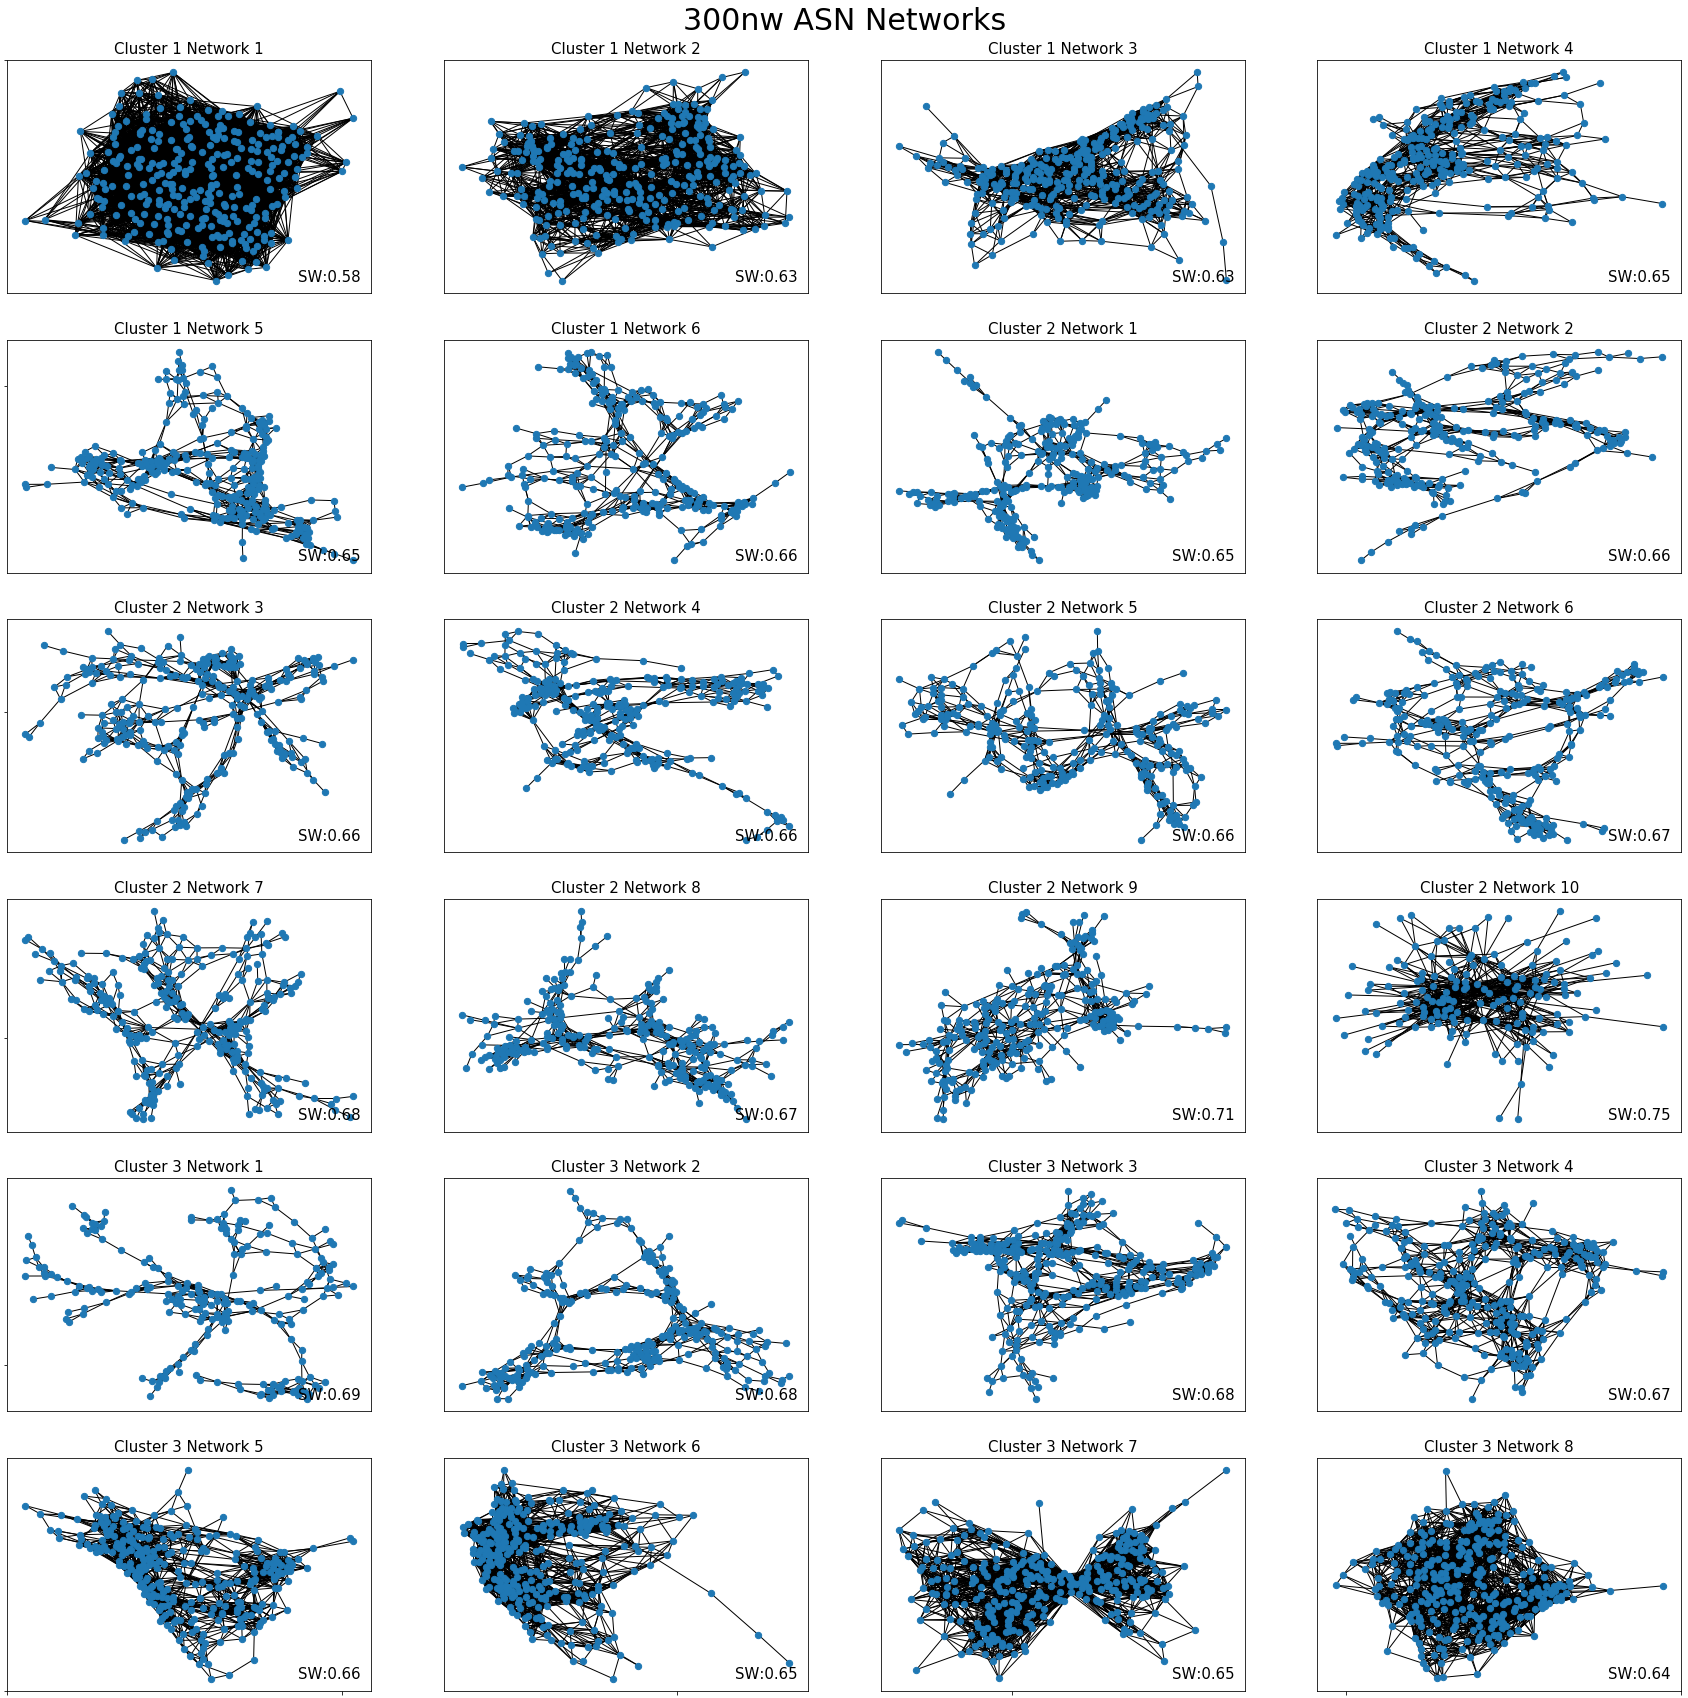

In [64]:
#Plot Networks
fig1=plt.figure(figsize=(30,30))

ax=[None]*len(ASN300)
axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('300nw ASN Networks',fontsize=30,pad=30)
# plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# plt.ylabel('MZ',fontsize=30,labelpad=15)
count1=0
count2=0
count3=0
for i in range(len(ax)):
    ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1) #change rows and columns to be factors of ASN300 length
    nx.draw_networkx(ASN300[i]['G'],node_size=40,with_labels=False)
    if i < len(cluster1):
        ax[i].set_title('Cluster 1 Network ' + str(count1+1),fontsize=15)
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster1) + len(cluster2)):
        ax[i].set_title('Cluster 2 Network ' + str(count2+1),fontsize=15)
        count2=count2+1
    else:
        ax[i].set_title('Cluster 3 Network ' + str(count3+1),fontsize=15)
        count3=count3+1
    plt.text(0.8,0.05,'SW:'+"{0:.2f}".format(smallworld[i]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot
#     ax[i].set_ylim(-1.5,1.5)
#     ax[i].set_xlim(-1.5,1.5)

In [65]:
# Modularity, PCoeff, Small Worldness & MZ:
ci = [None]*len(ASN300)
pcoeff= [None]*len(ASN300)
mz= [None]*len(ASN300)
clustering = [None]*len(ASN300)
count1=0
count2=0
count3=0
for i in range(len(ASN300)):
    ci[i],q=nct.community_louvain(ASN300[i]['adj_matrix'])
    pcoeff[i]=bct.participation_coef(ASN300[i]['adj_matrix'],ci[i])
    mz[i]=bct.module_degree_zscore(ASN300[i]['adj_matrix'],ci[i])
    clustering[i]=nx.clustering(ASN300[i]['G'])
    ASN300[i]['Graph Theory']['PL']=dict(nx.all_pairs_shortest_path_length(ASN300[i]['G']))
    ASN300[i]['Graph Theory']['Modularity']=ci[i]
    ASN300[i]['Graph Theory']['PCoeff']=pcoeff[i]
    ASN300[i]['Graph Theory']['MZ']=mz[i]
    ASN300[i]['Graph Theory']['Small World']=smallworld[i]
    ASN300[i]['Graph Theory']['CCoeff']=clustering[i]
    ASN300[i]['Graph Theory']['Degree']=nx.degree(ASN300[i]['G'])
    
    if i < len(cluster1):
        cluster1[count1]['Graph Theory']['PL']=ASN300[i]['Graph Theory']['PL']
        cluster1[count1]['Graph Theory']['Modularity']= ASN300[i]['Graph Theory']['Modularity']
        cluster1[count1]['Graph Theory']['PCoeff']=ASN300[i]['Graph Theory']['PCoeff']
        cluster1[count1]['Graph Theory']['MZ']=ASN300[i]['Graph Theory']['MZ']
        cluster1[count1]['Graph Theory']['Small World']=ASN300[i]['Graph Theory']['Small World']
        cluster1[count1]['Graph Theory']['CCoeff']= ASN300[i]['Graph Theory']['CCoeff']
        cluster1[count1]['Graph Theory']['Degree']= ASN300[i]['Graph Theory']['Degree']
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster1) + len(cluster2)):
        cluster2[count2]['Graph Theory']['PL']=ASN300[i]['Graph Theory']['PL']
        cluster2[count2]['Graph Theory']['Modularity']= ASN300[i]['Graph Theory']['Modularity']
        cluster2[count2]['Graph Theory']['PCoeff']=ASN300[i]['Graph Theory']['PCoeff']
        cluster2[count2]['Graph Theory']['MZ']=ASN300[i]['Graph Theory']['MZ']
        cluster2[count2]['Graph Theory']['Small World']=ASN300[i]['Graph Theory']['Small World']
        cluster2[count2]['Graph Theory']['CCoeff']= ASN300[i]['Graph Theory']['CCoeff']
        cluster2[count2]['Graph Theory']['Degree']= ASN300[i]['Graph Theory']['Degree']
        count2=count2+1
    else:
        cluster3[count3]['Graph Theory']['PL']=ASN300[i]['Graph Theory']['PL']
        cluster3[count3]['Graph Theory']['Modularity']= ASN300[i]['Graph Theory']['Modularity']
        cluster3[count3]['Graph Theory']['PCoeff']=ASN300[i]['Graph Theory']['PCoeff']
        cluster3[count3]['Graph Theory']['MZ']=ASN300[i]['Graph Theory']['MZ']
        cluster3[count3]['Graph Theory']['Small World']=ASN300[i]['Graph Theory']['Small World']
        cluster3[count3]['Graph Theory']['CCoeff']= ASN300[i]['Graph Theory']['CCoeff']
        cluster3[count3]['Graph Theory']['Degree']= ASN300[i]['Graph Theory']['Degree']
        count3=count3+1

In [66]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

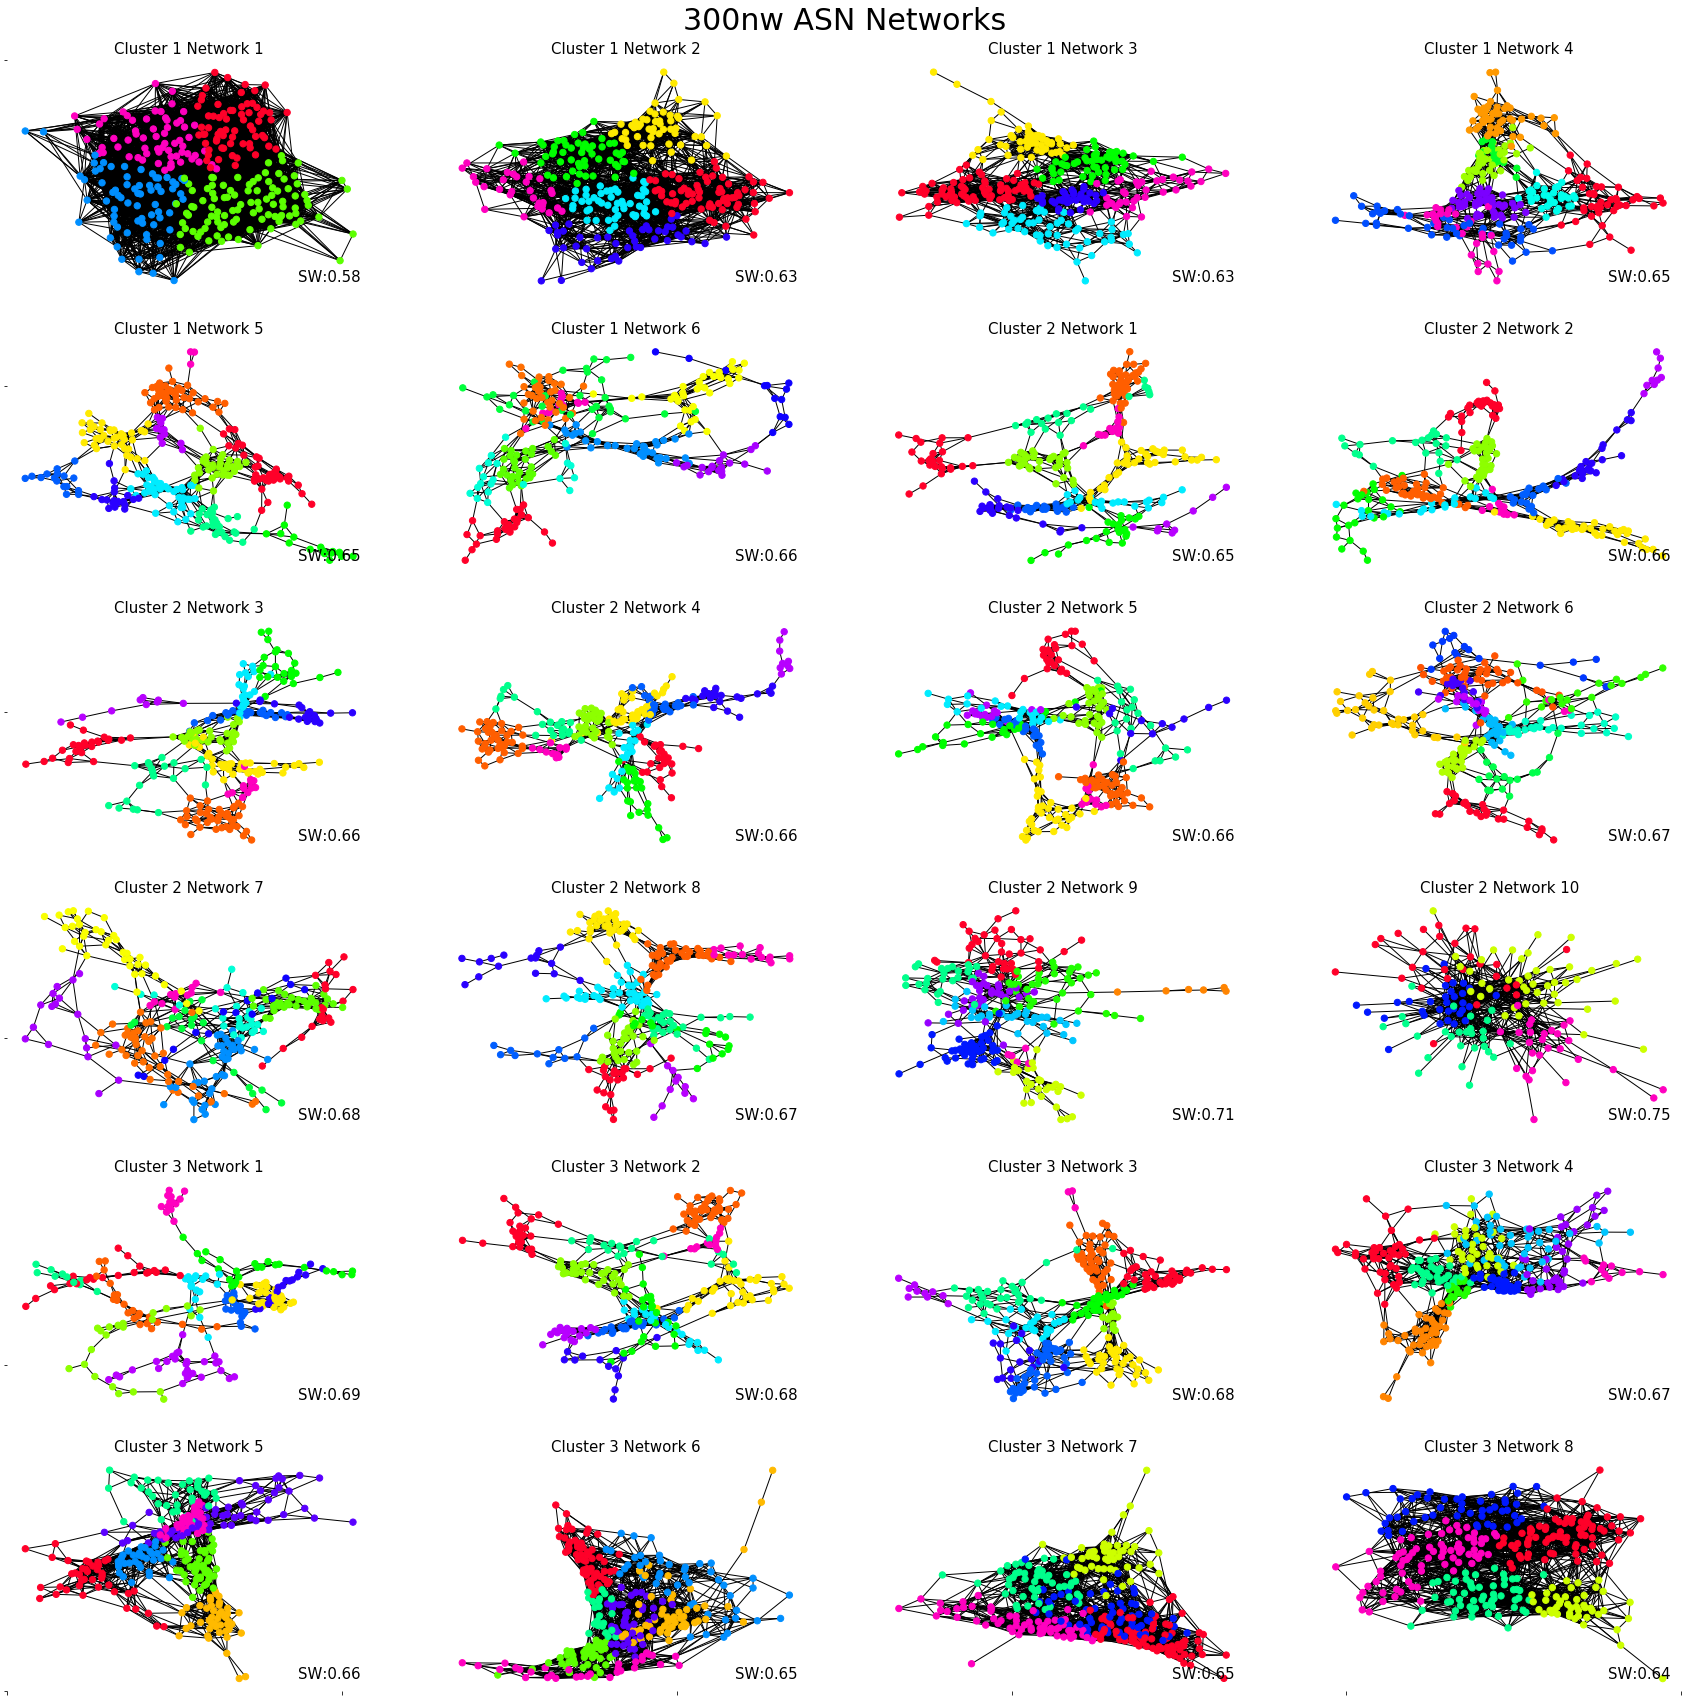

In [67]:
### MODULARITY
from community import community_louvain

fig1=plt.figure(figsize=(30,30))

ax=[None]*len(ASN300)
axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('300nw ASN Networks',fontsize=30,pad=30)
# plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# plt.ylabel('MZ',fontsize=30,labelpad=15)
count1=0
count2=0
count3=0
for i in range(len(ax)):
    ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
    g=ASN300[i]['G']
    if i < len(cluster1):
        ax[i].set_title('Cluster 1 Network ' + str(count1+1),fontsize=15)
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster1) + len(cluster2)):
        ax[i].set_title('Cluster 2 Network ' + str(count2+1),fontsize=15)
        count2=count2+1
    else:
        ax[i].set_title('Cluster 3 Network ' + str(count3+1),fontsize=15)
        count3=count3+1   
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)
    nx.draw(g, node_color=list(partition.values()),cmap=plt.cm.gist_rainbow,node_size=40);
    plt.text(0.8,0.05,'SW:'+"{0:.2f}".format(smallworld[i]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot

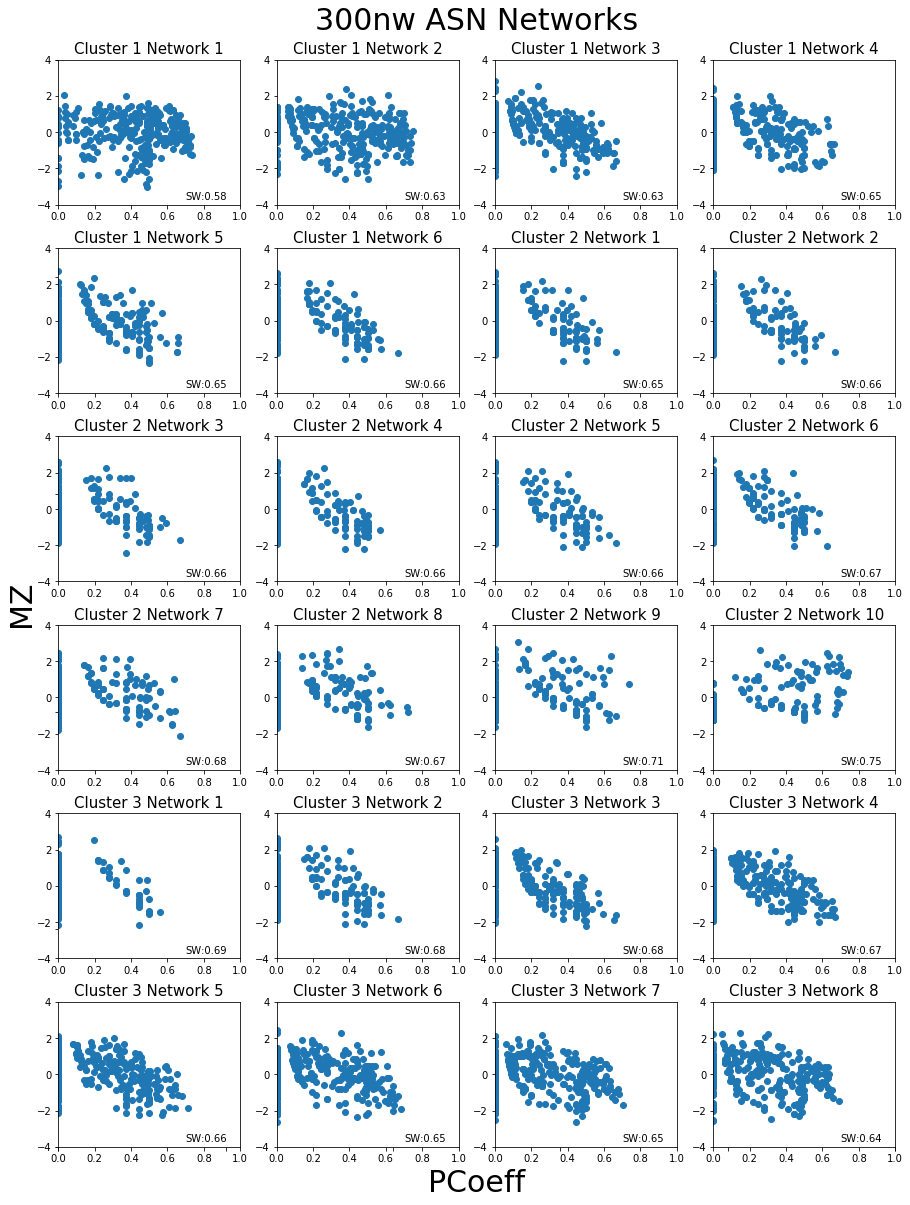

In [68]:
#Plot Participation Coefficient vs MZ
fig1=plt.figure(figsize=(15,20))

ax=[None]*numNetworks
axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('300nw ASN Networks',fontsize=30,pad=30)
plt.xlabel('PCoeff',fontsize=30,labelpad=15)
plt.ylabel('MZ',fontsize=30,labelpad=15)
count1=0
count2=0
count3=0
for i in range(len(ax)):
    ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
    fig1.subplots_adjust(hspace=.3)
    if i < len(cluster1):
        ax[i].set_title('Cluster 1 Network ' + str(count1+1),fontsize=15)
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster1) + len(cluster2)):
        ax[i].set_title('Cluster 2 Network ' + str(count2+1),fontsize=15)
        count2=count2+1
    else:
        ax[i].set_title('Cluster 3 Network ' + str(count3+1),fontsize=15)
        count3=count3+1
    plt.scatter(pcoeff[i],mz[i])
    plt.text(0.7,-3.7,'SW:'+"{0:.2f}".format(smallworld[i]))
    ax[i].set_ylim(-4,4)
    ax[i].set_xlim(0,1)

### C. Elegans

In [69]:
#Small world calculated on C Elegans Matrix in smallworld.m in MATLAB
temp=loadmat(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Analysis\Functional Connectivity\Functional Tasks\cElegans_smallworld.mat')
smallworld_elegans=temp['cElegansSW'][0]
del temp

Text(0.7, 0.1, 'SW:0.55')

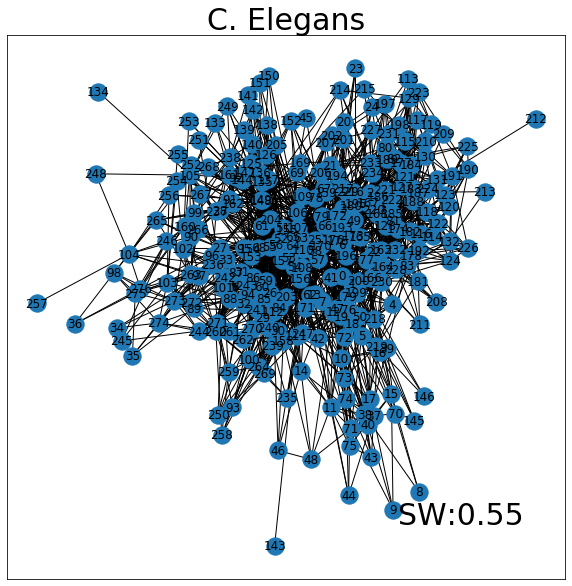

In [70]:
#Plot Networks
fig1=plt.figure(figsize=(10,10))

ax=fig1.gca()
plt.title('C. Elegans',fontsize=30)
nx.draw_networkx(elegansGraph)
plt.text(0.7,0.1,'SW:'+"{0:.2f}".format(smallworld_elegans[0]),transform=ax.transAxes,fontsize=30) #this plots Smallworldness as text in a relative position on each subplot
#     ax[i].set_ylim(-1.5,1.5)
#     ax[i].set_xlim(-1.5,1.5)

In [71]:
# Modularity, PCoeff, Small Worldness & MZ:
ci = []
pcoeff= []
mz= []

ci,q=nct.community_louvain(elegansMat)
pcoeff=bct.participation_coef(elegansMat,ci)
mz=bct.module_degree_zscore(elegansMat,ci)
Elegans['Graph Theory']['MZ']=mz
Elegans['Graph Theory']['PCoeff']=pcoeff
Elegans['Graph Theory']['Modularity']=ci
Elegans['Graph Theory']['Small World']=smallworld_elegans
Elegans['Graph Theory']['PL']=dict(nx.all_pairs_shortest_path_length(elegansGraph))
Elegans['Graph Theory']['CCoeff']=nx.clustering(elegansGraph)
Elegans['Graph Theory']['Degree']=nx.degree(elegansGraph)

(0, 1)

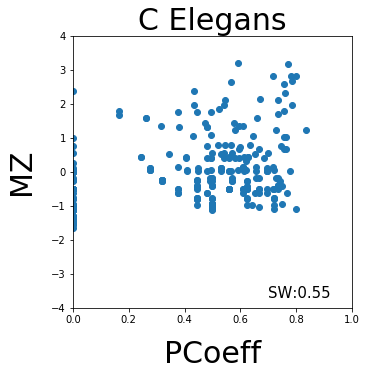

In [72]:
fig1=plt.figure(figsize=(5,5))

plt.title('C Elegans',fontsize=30)
plt.xlabel('PCoeff',fontsize=30,labelpad=15)
plt.ylabel('MZ',fontsize=30,labelpad=15)
plt.scatter(pcoeff,mz)
plt.text(0.7,-3.7,'SW:'+"{0:.2f}".format(smallworld_elegans[0]),fontsize=15)
plt.ylim(-4,4)
plt.xlim(0,1)

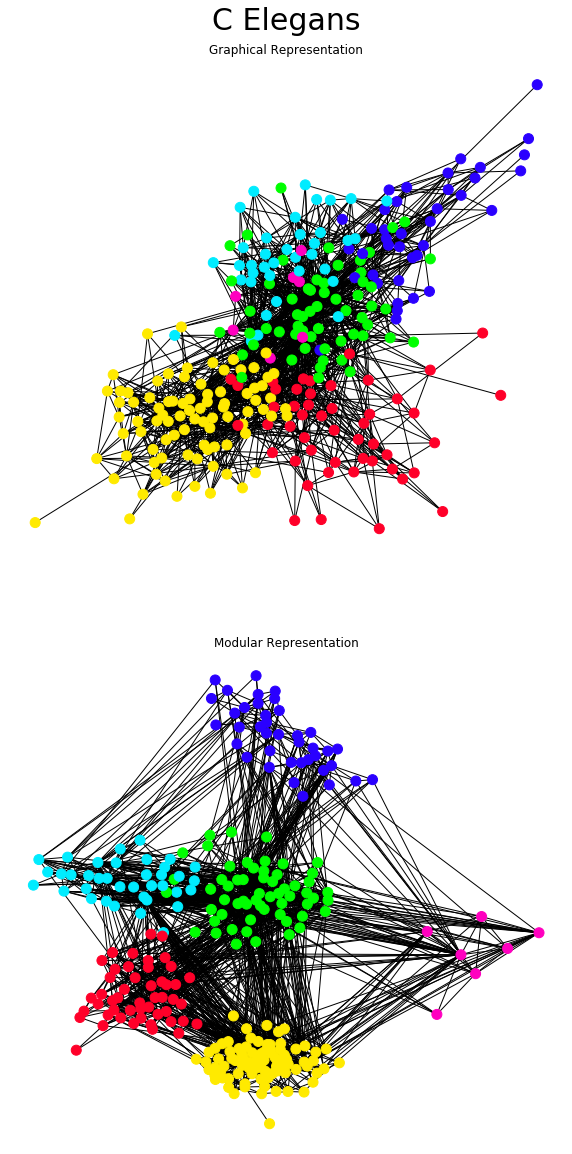

In [73]:
### MODULARITY
from community import community_louvain
fig2=plt.figure(figsize=(10,20))
plt.title('C Elegans',fontsize=30,pad=30)

ax=[None]*2
axBig = fig2.add_subplot(111)
axBig.set_yticklabels([])
plt.xticks([], [])
plt.yticks([], [])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
g=Elegans['G']
partition = community_louvain.best_partition(g)
pos = community_layout(g, partition)

ax[0]=fig2.add_subplot(2, 1, 1)
ax[0].set_title('Graphical Representation')
nx.draw(g,node_color=list(partition.values()),cmap=plt.cm.gist_rainbow,node_size=100);
ax[1]=fig2.add_subplot(2, 1, 2)
ax[1].set_title('Modular Representation')
nx.draw(g, pos,node_color=list(partition.values()),cmap=plt.cm.gist_rainbow,node_size=100);

### Watts-Strogatz Random

In [74]:
temp=loadmat(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Analysis\Functional Connectivity\Functional Tasks\300_WS_smallworld.mat')
smallworld_random=temp['smallworld_random'][0]
del temp

In [75]:
# #Plot Networks
# fig1=plt.figure(figsize=(30,30))

# ax=[None]*len(WS_Random)
# axBig = fig1.add_subplot(111)
# axBig.set_yticklabels([])
# axBig.set_xticklabels([])
# axBig.set_frame_on(False)
# plt.title('WS Random',fontsize=30)
# # plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# # plt.ylabel('MZ',fontsize=30,labelpad=15)
# for i in range(len(ax)):
#     ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
#     ax[i].set_title('Network ' + str(i+1),fontsize=15)
#     nx.draw_networkx(WS_Random[i]['G'],node_size=40,with_labels=False)
#     plt.text(0.1,0.05,'SW:'+"{0:.2f}".format(smallworld_random[i]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot
# #     ax[i].set_ylim(-1.5,1.5)
# #     ax[i].set_xlim(-1.5,1.5)

In [76]:
# # Modularity, PCoeff, Small Worldness & MZ:
# ci = [None]*len(WS_Random)
# pcoeff= [None]*len(WS_Random)
# mz= [None]*len(WS_Random)

# for i in range(len(WS_Random)):
#     adjmat=np.asarray(WS_Random[i]['adj_matrix'].todense().astype(float))
#     ci[i],q=nct.community_louvain(adjmat)
#     pcoeff[i]=bct.participation_coef(adjmat,ci[i])
#     mz[i]=bct.module_degree_zscore(adjmat,ci[i])
#     WS_Random[i]['Graph Theory']['Modularity']=ci[i]
#     WS_Random[i]['Graph Theory']['PCoeff']=pcoeff[i]
#     WS_Random[i]['Graph Theory']['MZ']=mz[i]
#     WS_Random[i]['Graph Theory']['Small World']=smallworld_random[i]

In [77]:
# ### MODULARITY
# from community import community_louvain

# fig1=plt.figure(figsize=(30,30))

# ax=[None]*len(WS_Random)
# axBig = fig1.add_subplot(111)
# axBig.set_yticklabels([])
# axBig.set_xticklabels([])
# axBig.set_frame_on(False)
# plt.title('WS Random',fontsize=30)
# # plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# # plt.ylabel('MZ',fontsize=30,labelpad=15)
# for i in range(len(ax)):
#     ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
#     g=WS_Random[i]['G']
#     ax[i].set_title('Network ' + str(i+1),fontsize=15)
#     partition = community_louvain.best_partition(g)
#     pos = community_layout(g, partition)
#     nx.draw(g, node_color=list(partition.values()),cmap=plt.cm.gist_rainbow,node_size=40);
#     plt.text(0.1,0.05,'SW:'+"{0:.2f}".format(smallworld_random[i]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot

### Watts-Strogatz Grid

In [78]:
temp=loadmat(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Analysis\Functional Connectivity\Functional Tasks\300_WS_smallworld.mat')
smallworld_grid=temp['smallworld_grid'][0]
del temp

In [79]:
# #Plot Networks
# fig1=plt.figure(figsize=(30,30))

# ax=[None]*len(WS_Random)
# axBig = fig1.add_subplot(111)
# axBig.set_yticklabels([])
# axBig.set_xticklabels([])
# axBig.set_frame_on(False)
# plt.title('WS Grid',fontsize=30)
# # plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# # plt.ylabel('MZ',fontsize=30,labelpad=15)
# for i in range(len(ax)):
#     ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
#     nx.draw_networkx(WS_Grid[i]['G'],node_size=40,with_labels=False)
#     plt.text(0.1,0.05,'SW:'+"{0:.2f}".format(smallworld_grid[i]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot
# #     ax[i].set_ylim(-1.5,1.5)
# #     ax[i].set_xlim(-1.5,1.5)

In [80]:
# # Modularity, PCoeff, Small Worldness & MZ:
# ci = [None]*len(WS_Grid)
# pcoeff= [None]*len(WS_Grid)
# mz= [None]*len(WS_Grid)

# for i in range(len(WS_Grid)):
#     adjmat=np.asarray(WS_Grid[i]['adj_matrix'].todense().astype(float))
#     ci[i],q=nct.community_louvain(adjmat)
#     pcoeff[i]=bct.participation_coef(adjmat,ci[i])
#     mz[i]=bct.module_degree_zscore(adjmat,ci[i])
#     WS_Grid[i]['Graph Theory']['Modularity']=ci[i]
#     WS_Grid[i]['Graph Theory']['PCoeff']=pcoeff[i]
#     WS_Grid[i]['Graph Theory']['MZ']=mz[i]
#     WS_Grid[i]['Graph Theory']['Small World']=smallworld_grid[i]

In [81]:
# ### MODULARITY
# from community import community_louvain

# fig1=plt.figure(figsize=(30,30))

# ax=[None]*len(WS_Grid)
# axBig = fig1.add_subplot(111)
# axBig.set_yticklabels([])
# axBig.set_xticklabels([])
# axBig.set_frame_on(False)
# plt.title('WS Grid',fontsize=30)
# # plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# # plt.ylabel('MZ',fontsize=30,labelpad=15)
# for i in range(len(ax)):
#     ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
#     g=WS_Grid[i]['G']

#     partition = community_louvain.best_partition(g)
#     pos = community_layout(g, partition)
#     nx.draw(g, node_color=list(partition.values()),cmap=plt.cm.gist_rainbow,node_size=40);
#     plt.text(0.1,0.05,'SW:'+"{0:.2f}".format(smallworld_grid[i]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot

# Task 1: Linear  Transformation

In [82]:
#Regression
def NOKEVregression(target,absV): 
    inputx=np.vstack((np.ones(len(target)),absV)).T
    a1=np.linalg.lstsq(inputx,target)
    return a1

In [83]:
#Subgraph AdjMat
def getOnGraph(network, this_TimeStamp = 0):
    edgeList = network.connectivity.edge_list
    adjMat = np.zeros((network.numOfWires, network.numOfWires))
    adjMat[edgeList[:,0], edgeList[:,1]] = network.junctionSwitch[this_TimeStamp,:]
    adjMat[edgeList[:,1], edgeList[:,0]] = network.junctionSwitch[this_TimeStamp,:]
    onGraph = nx.from_numpy_array(adjMat)
    
    return onGraph

In [84]:
#Communicability + Current Matrices
def commCurr(sim):
    currMat=[None]*len(range(0,len(sim.junctionResistance),500))
    commu_Mat=[None]*len(range(0,len(sim.junctionResistance),500))
    count = 0
    for i in tqdm(range(0,len(sim.junctionResistance),500)): #for each time 
        currMat[count] = np.zeros((sim.numOfWires,sim.numOfWires))
        edgeList = sim.connectivity.edge_list
        currMat[count][edgeList[:,0], edgeList[:,1]] = sim.junctionVoltage[i,:]/sim.junctionResistance[i,:] #-1,:
        currMat[count] = currMat[count] + currMat[count].T
        currGraph = nx.from_numpy_array(currMat[count])
        subGraph = getOnGraph(sim, sim.TimeVector.size-1)

        components = [j for j in nx.connected_components(subGraph)]

        max_ind = np.argmax([len(j) for j in nx.connected_components(subGraph)])
        currGraph = nx.subgraph(currGraph, components[max_ind])
        currGraph = nx.from_numpy_array(nx.adjacency_matrix(currGraph).todense())
        currMat[count] = np.array(nx.adjacency_matrix(currGraph).todense())

        commu = nx.communicability(currGraph)
        subSize = len(currGraph)
        commu_Mat[count] = np.array([commu[k][j] for k in range(subSize) for j in range(subSize)]).reshape(subSize,subSize)
        count = count+1

    return commu_Mat, currMat

## ASN Networks:

In [89]:
onAmp=[]
shortestPath=[None]*len(ASN300)
for i in range(len(ASN300)):
    temp=getFarthestPairing(ASN300[i]['adj_matrix'])
    shortestPath[i]=nx.shortest_path_length(ASN300[i]['G'],temp[0],temp[1])
    onAmp.append(shortestPath[i]/5)

In [ ]:
shortestPath

In [93]:
onAmp

[0.8,
 1.4,
 2.4,
 2.4,
 3.4,
 3.8,
 4.4,
 4.4,
 4.4,
 4.4,
 3.8,
 4.0,
 3.0,
 3.2,
 2.4,
 1.2,
 5.8,
 3.8,
 3.2,
 2.6,
 2.0,
 2.2,
 1.6,
 1.6]

In [73]:
#Instantiate Variables       
stimulus=[[],[]]
accSqu=[]
#    accTri=[]
#    accSaw=[]
#    accDbl=[]
maxSqu=[]
#    maxTri=[]
#    maxSaw=[]
#    maxDbl=[]
dt = 1e-2
f=0.5
Time=5
#figure out voltage for each network:


#Choose Electrode Pattern
for i in range(len(onAmp)):
    stimulus[0].append((stimulus__(biasType='AC',onAmp=onAmp[i],TimeVector=np.arange(0,Time,dt),f=f)))
    stimulus[1].append((stimulus__(biasType='Drain',TimeVector=np.arange(0,Time,dt)))) #we don't want this drain to be active during training
    
#Initialise Output Variables
period=[]
TimeVector=[]
voltage=[]
conductance=[]
switches=[]
results_ASN=[None]*len(ASN300)
ResultSqu=[None]*len(ASN300)

# Voltage=[None]*len(ASN300)
# Switches=[None]*len(ASN300)



nodesList=[None]*len(ASN300)
#Run Simulations
count1=0
count2=0
count3=0
for i in range(len(ASN300)): #for each network
    nwSqu = []
    print('Network ' + str(i+1))
    #Run Simulations
#     results=[]
    # Connectivity=connectivity__('700nw_14533junctions.mat')
    stimulus2 = [item for item in stimulus] #go through each list in the list and find the ith item
#     set_trace()
    results_ASN[i]=runSim(connectivity__(wires_dict=ASN300[i]),stimulus=stimulus2, contactMode='farthest', T = Time, dt = 0.001, onAmp = onAmp[i], biasType='AC',f=f,junctionMode='tunneling')
    #wires_dict=newNetworkTest[chosenNetwork])
    results_ASN[i].frequency=f
    results_ASN[i].dt=0.001
    period=1/f

    TimeVector=results_ASN[i].TimeVector
    voltage=results_ASN[i].wireVoltage
    conductance=results_ASN[i].conductance
    switches=results_ASN[i].junctionSwitch

    stepNodes=len(ASN300[i])-1 #first use all nodes
    sizes2=len(ASN300[i])
    nwOutputs = [None]* int(sizes2/stepNodes)
            
    outputNodes2=[]

    for k in range(stepNodes,sizes2+1,stepNodes): #stepping up nodes
        np.random.seed(69)

        outputNodes2.append(voltage[:,np.random.choice(len(voltage[0,:]),size=k,replace=False)]) #take all the times (:) for a random j nodes

        nwOutputs=outputNodes2 #Length of nwOutputs is k (list)

    target1=[None]*len(nwOutputs)
    target2=[None]*len(nwOutputs)
    target3=[None]*len(nwOutputs)
    target4=[None]*len(nwOutputs)
    target5=[None]*len(nwOutputs)

    for j in range(len(nwOutputs)):
        target1[j] = (onAmp[i] * (-np.sign(TimeVector % period - period/2)))
        target2[j] = (4*onAmp[i]/period * abs((TimeVector-period/4) % period - period/2) - onAmp[i])
        target3[j] = (onAmp[i]/period * (TimeVector % period))
        target4[j] = (onAmp[i]*np.sin(4*np.pi*(1/period)*TimeVector))


#        nwTri     = np.zeros(len(nwOutputs))
#        nwSaw     = np.zeros(len(nwOutputs))
#        nwDbl     = np.zeros(len(nwOutputs))
#     nwMG      = [[None]*networksLoad,[None]*len(nwOutputs[0])]

#        ResultTri=[]
#        ResultSaw=[]
    accuracy=[]
#        accuracyTri=[]
#        accuracySaw=[]
#        accuracyDbl=[]
    output=[]
    mSqu=[]
#        mTri=[]
#        mSaw=[]
#        mDbl=[]
    
    if len(ASN300[i]['G']) >= 250:
        nodesList[i]=[50,100,150,200,250,len(ASN300[i]['G'])]#range(50, len(ws300[i][0])+1,50)
    elif len(ASN300[i]['G']) >= 200 and len(ASN300[i]['G']) < 250:
        nodesList[i]=[50,100,150,200,len(ASN300[i]['G'])]#range(50, len(ws300[i][0])+1,50)  
    elif len(ASN300[i]['G']) >= 150 and len(ASN300[i]['G']) < 200:
        nodesList[i]=[50,100,150,len(ASN300[i]['G'])]#range(50, len(ws300[i][0])+1,50)  
    elif len(ASN300[i]['G']) >= 100 and len(ASN300[i]['G']) < 150:
        nodesList[i]=[50,100,len(ASN300[i]['G'])]#range(50, len(ws300[i][0])+1,50)  
                     
#     set_trace()

    for j in nodesList[i]: #range(50, len(ws300[i][0])+1,50): #loop through sets of nodes 
        print('Running Regression: ' + str(j) + ' nodes')
        ResultSqu=[]
        ResultSqu = nonLinearTrans(results_ASN[i],'Square',j, repeats=50) #simulation, type of signal, number of nodes to sample from, number of linear regression repetitions (take avg)
    # OLD WAY: NOKEVregression(target1[j],nwOutputs[j].T)[0]
    # OLD WAY: outputx=np.vstack((np.ones(len(target1[j])),nwOutputs[j].T)).T
    # temp=np.dot(outputx,ResultSqu)
    # MSE=np.mean((target1[j]-temp)**2)
    # rnMSE=np.sqrt(np.sum((target1[j]-temp)**2)/np.sum((target1[j])**2))
        nwSqu.append(ResultSqu['accuracy'])       
    ASN300[i]['Accuracy']['Linear Transformation']=nwSqu
    if i < len(cluster1):
        cluster1[count1]['Accuracy']['Linear Transformation']=nwSqu
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster1) + len(cluster2)):
        cluster2[count2]['Accuracy']['Linear Transformation']=nwSqu
        count2=count2+1
    else:
        cluster3[count3]['Accuracy']['Linear Transformation']=nwSqu
        count3=count3+1

Network 1


2020-04-01 19:03:59,172:INFO:First current path [0, 258, 125, 235, 144] formed at time = 0.465 s.


Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 300 nodes
Network 2


2020-04-01 19:04:20,993:INFO:First current path [132, 81, 51, 254, 129, 40, 57, 183] formed at time = 0.58 s.


Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 300 nodes
Network 3


2020-04-01 19:04:41,130:INFO:First current path [182, 202, 292, 187, 277, 222, 204, 248, 279, 81, 209, 271, 132] formed at time = 0.544 s.


Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 299 nodes
Network 4


2020-04-01 19:04:57,868:INFO:First current path [57, 30, 88, 14, 20, 270, 7, 232, 204, 95, 252, 280, 257] formed at time = 0.509 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 294 nodes
Network 5


2020-04-01 19:05:14,984:INFO:First current path [56, 111, 206, 220, 284, 67, 121, 155, 51, 175, 159, 199, 191, 173, 12, 89, 145, 196] formed at time = 0.506 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 291 nodes
Network 6


2020-04-01 19:05:33,084:INFO:First current path [129, 138, 167, 141, 207, 221, 85, 127, 108, 52, 115, 180, 224, 185, 197, 25, 253, 3, 101, 98] formed at time = 0.53 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 266 nodes
Network 7


2020-04-01 19:05:50,340:INFO:First current path [129, 138, 167, 141, 27, 136, 157, 55, 161, 130, 106, 214, 175, 177, 104, 180, 115, 52, 82, 249, 42, 216, 75] formed at time = 0.494 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 266 nodes
Network 8


2020-04-01 19:06:08,175:INFO:First current path [129, 138, 167, 141, 27, 136, 157, 55, 238, 130, 106, 214, 175, 177, 104, 180, 115, 52, 82, 249, 42, 216, 75] formed at time = 0.607 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 266 nodes
Network 9


2020-04-01 19:06:24,449:INFO:First current path [129, 138, 167, 141, 27, 136, 157, 55, 239, 130, 220, 15, 19, 86, 169, 58, 5, 233, 82, 250, 137, 216, 76] formed at time = 0.618 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 266 nodes
Network 10


2020-04-01 19:06:38,460:INFO:First current path [129, 138, 167, 141, 27, 136, 157, 55, 239, 130, 106, 214, 19, 86, 169, 58, 5, 233, 82, 250, 137, 216, 76] formed at time = 0.598 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 266 nodes
Network 11


2020-04-01 19:06:52,402:INFO:First current path [129, 138, 167, 141, 207, 221, 85, 127, 108, 52, 115, 180, 224, 185, 197, 25, 253, 3, 101, 98] formed at time = 0.53 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 266 nodes
Network 12


2020-04-01 19:07:07,631:INFO:First current path [11, 84, 23, 142, 208, 57, 239, 197, 217, 268, 191, 238, 5, 2, 130, 226, 212, 144, 170, 141, 132] formed at time = 0.553 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 273 nodes
Network 13


2020-04-01 19:07:21,806:INFO:First current path [42, 235, 230, 231, 164, 35, 132, 194, 23, 180, 20, 166, 140, 165, 137, 129] formed at time = 0.617 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 267 nodes
Network 14


2020-04-01 19:07:35,773:INFO:First current path [151, 92, 187, 161, 138, 162, 20, 175, 168, 87, 261, 209, 198, 28, 229, 234, 42] formed at time = 0.644 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 265 nodes
Network 15


2020-04-01 19:07:49,327:INFO:First current path [9, 75, 126, 1, 142, 218, 85, 12, 202, 108, 235, 65, 145] formed at time = 0.526 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 252 nodes
Network 16


2020-04-01 19:08:00,380:INFO:First current path [22, 2, 84, 8, 91, 142, 54] formed at time = 0.334 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 157 nodes
Network 17


2020-04-01 19:08:07,095:INFO:First current path [204, 191, 199, 40, 178, 78, 58, 84, 74, 121, 150, 185, 5, 88, 112, 147, 207, 177, 104, 86, 81, 102, 218, 8, 94, 108, 10, 33, 152, 27] formed at time = 0.75 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 224 nodes
Network 18


2020-04-01 19:08:17,799:INFO:First current path [129, 138, 167, 141, 207, 221, 85, 127, 108, 52, 115, 180, 224, 185, 197, 25, 253, 3, 101, 98] formed at time = 0.735 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 266 nodes
Network 19


2020-04-01 19:08:32,619:INFO:First current path [149, 179, 152, 225, 195, 35, 236, 15, 165, 287, 32, 191, 173, 12, 89, 145, 196] formed at time = 0.638 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 291 nodes
Network 20


2020-04-01 19:08:48,637:INFO:First current path [97, 281, 253, 132, 62, 98, 196, 117, 142, 273, 186, 288, 201, 181] formed at time = 0.568 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 295 nodes
Network 21


2020-04-01 19:09:04,679:INFO:First current path [57, 84, 39, 175, 150, 166, 250, 116, 231, 281, 97] formed at time = 0.463 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 295 nodes
Network 22


2020-04-01 19:09:21,425:INFO:First current path [132, 271, 209, 81, 152, 116, 253, 134, 76, 84, 57, 182] formed at time = 0.64 s.


Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 299 nodes
Network 23


2020-04-01 19:09:38,082:INFO:First current path [58, 65, 179, 21, 161, 116, 126, 272, 132] formed at time = 0.655 s.


Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 300 nodes
Network 24


2020-04-01 19:09:57,250:INFO:Unfortunately, no current path is formed in simulation time.


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 300 nodes


In [76]:
#Current and Communicability Matrices:
commuMatASN_LT=[None]*len(results_ASN)
currMatASN_LT=[None]*len(results_ASN)
count1=0
count2=0
count3=0
for i in tqdm(range(len(results_ASN))):
    commuMatASN_LT[i],currMatASN_LT[i]=commCurr(results_ASN[i]) #calculate communicability every 500 time steps for each network
    if i < len(cluster1):
        cluster1[count1]['Graph Theory']['COMM']=commuMatASN_LT[i]
        cluster1[count1]['Graph Theory']['Current Matrix']=currMatASN_LT[i]
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster1) + len(cluster2)):
        cluster2[count2]['Graph Theory']['COMM']=commuMatASN_LT[i]
        cluster2[count2]['Graph Theory']['Current Matrix']=currMatASN_LT[i]        
        count2=count2+1
    else:
        cluster3[count3]['Graph Theory']['COMM']=commuMatASN_LT[i]
        cluster3[count3]['Graph Theory']['Current Matrix']=currMatASN_LT[i]        
        count3=count3+1

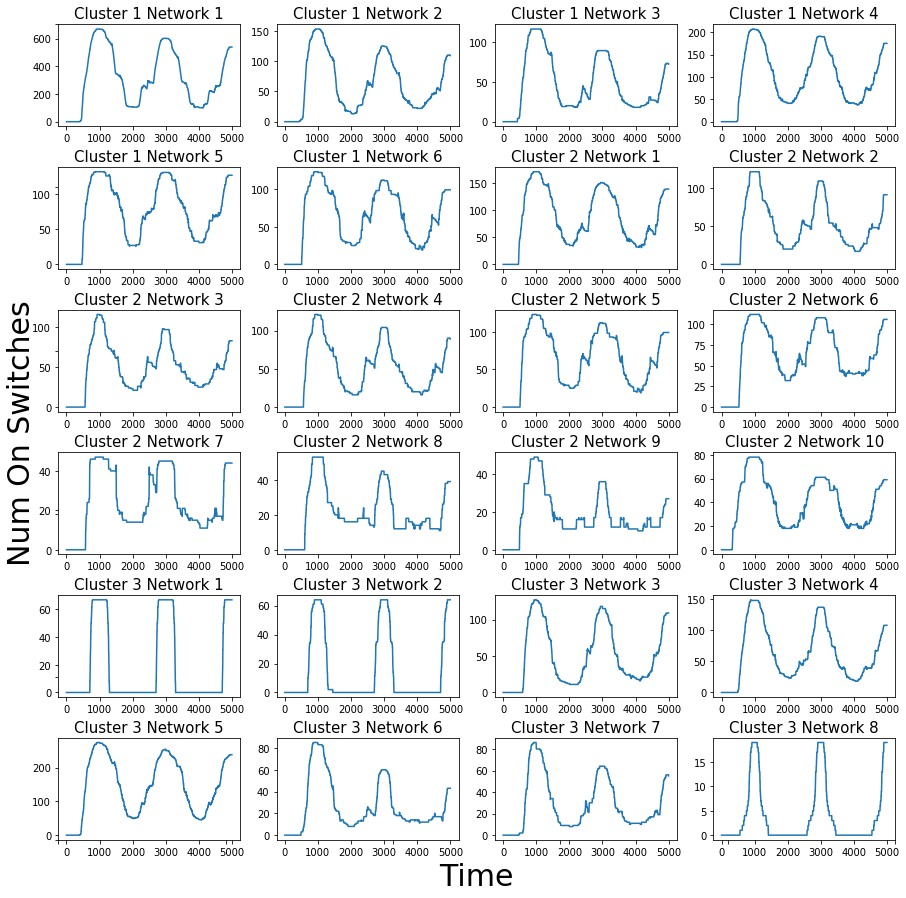

In [75]:
#network junctions switches:
fig1=plt.figure(figsize=(15,15))
ax=[None]*numNetworks
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
plt.xlabel('Time',fontsize=30,labelpad=15)
plt.ylabel('Num On Switches',fontsize=30,labelpad=15)
count1=0
count2=0
count3=0

for i in range(numNetworks):
    ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
    fig1.subplots_adjust(hspace=.4)
    if i < len(cluster1):
        ax[i].set_title('Cluster 1 Network ' + str(count1+1),fontsize=15)
        count1=count1+1
    elif i >= len(cluster1) and i < (len(cluster1) + len(cluster2)):
        ax[i].set_title('Cluster 2 Network ' + str(count2+1),fontsize=15)
        count2=count2+1
    else:
        ax[i].set_title('Cluster 3 Network ' + str(count3+1),fontsize=15)
        count3=count3+1
    plt.plot(np.sum(results_ASN[i].junctionSwitch,1))
    #votlage as title 

## WS Networks

In [97]:
onAmp_rand=[]
onAmp_grid=[]
shortestPath2=[None]*len(WS_Random)
for i in range(len(WS_Random)):
    temp=getFarthestPairing(WS_Random[i]['adj_matrix'].todense())
    temp2=getFarthestPairing(WS_Grid[i]['adj_matrix'].todense())
    shortestPath=nx.shortest_path_length(WS_Random[i]['G'],temp[0],temp[1])
    shortestPath2[i]=nx.shortest_path_length(WS_Grid[i]['G'],temp2[0],temp2[1])
    onAmp_rand.append(shortestPath/5)
    onAmp_grid.append(shortestPath2[i]/5)

In [98]:
onAmp_grid

[5.5,
 11.0,
 19.0,
 37.5,
 37.5,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 37.5,
 37.5,
 25.0,
 19.0,
 15.0,
 12.5]

In [99]:
#Instantiate Variables       
stimulus_rand=[[],[]]
stimulus_grid=[[],[]]
accSqu=[]
#    accTri=[]
#    accSaw=[]
#    accDbl=[]
maxSqu=[]
#    maxTri=[]
#    maxSaw=[]
#    maxDbl=[]
dt = 1e-2
f=0.5
Time=5
# onAmp=[2,2,4,8,8,10,10,10,10,10,10,10,8,8,8,8,8,8,8,4,4,3,2,1.5]

#Choose Electrode Pattern
for i in range(len(onAmp_rand)):
    stimulus_rand[0].append((stimulus__(biasType='AC',onAmp=onAmp_rand[i],TimeVector=np.arange(0,Time,dt),f=f)))
    stimulus_rand[1].append((stimulus__(biasType='Drain',TimeVector=np.arange(0,Time,dt)))) #we don't want this drain to be active during training
    stimulus_grid[0].append((stimulus__(biasType='AC',onAmp=onAmp_grid[i],TimeVector=np.arange(0,Time,dt),f=f)))
    stimulus_grid[1].append((stimulus__(biasType='Drain',TimeVector=np.arange(0,Time,dt)))) #we don't want this drain to be active during training
    
#Initialise Output Variables
period=[]
TimeVector=[]
voltage=[]
conductance=[]
switches=[]
results_grid=[None]*len(ws300)
results_rand=[None]*len(ws300)

#        nwTri     = np.zeros(len(nwOutputs))
#        nwSaw     = np.zeros(len(nwOutputs))
#        nwDbl     = np.zeros(len(nwOutputs))
#     nwMG      = [[None]*networksLoad,[None]*len(nwOutputs[0])]


#Run Simulations
for i in range(len(ws300)): #for each network
    nwSqu_grid = []
    nwSqu_rand = []
    print('Network ' + str(i))
    #Run Simulations
#     results=[]
    # Connectivity=connectivity__('700nw_14533junctions.mat')
    stimulus2 = [item for item in stimulus_rand] #go through each list in the list and find the ith item
    stimulus2_grid=[item for item in stimulus_grid]
#     set_trace()
    # GRID WS:
    print('Grid')
    results_grid[i]=runSim(connectivity__(graph=ws300[i][0]),stimulus=stimulus2_grid, contactMode='farthest', T = Time, dt = 0.001, onAmp = onAmp[i], biasType='AC',f=f,junctionMode='tunneling')
    # RANDOM WS:
    print('Random')
    results_rand[i]=runSim(connectivity__(graph=ws300[i][1]),stimulus=stimulus2, contactMode='farthest', T = Time, dt = 0.001, onAmp = onAmp[i], biasType='AC',f=f,junctionMode='tunneling')
    # Small World WS:
    # 
    
    results_grid[i].frequency=f
    results_rand[i].frequency=f
    results_grid[i].dt=0.001
    results_rand[i].dt=0.001
    period=1/f

    TimeVector_grid=results_grid[i].TimeVector
    voltage_grid=results_grid[i].wireVoltage
    conductance_grid=results_grid[i].conductance
    switches_grid=results_grid[i].junctionSwitch
    
    TimeVector_rand=results_rand[i].TimeVector
    voltage_rand=results_rand[i].wireVoltage
    conductance_rand=results_rand[i].conductance
    switches_rand=results_rand[i].junctionSwitch

    stepNodes=len(ws300[i][0])-1 #first use all nodes
    sizes2=len(ws300[i][0])
    nwOutputs = [None]* int(sizes2/stepNodes)
            
    outputNodes2_grid=[]
    outputNodes2_rand=[]
    
    for k in range(stepNodes,sizes2+1,stepNodes): #stepping up nodes
        np.random.seed(69)

        outputNodes2_grid.append(voltage_grid[:,np.random.choice(len(voltage_grid[0,:]),size=k,replace=False)]) #take all the times (:) for a random j nodes
        outputNodes2_rand.append(voltage_rand[:,np.random.choice(len(voltage_rand[0,:]),size=k,replace=False)]) #take all the times (:) for a random j nodes
        nwOutputs_grid=outputNodes2_grid #Length of nwOutputs is k (list)
        nwOutputs_rand=outputNodes2_rand

    target1=[None]*len(outputNodes2_rand)
#     target2=[None]*len(nwOutputs)
#     target3=[None]*len(nwOutputs)
#     target4=[None]*len(nwOutputs)
#     target5=[None]*len(nwOutputs)

    for j in range(len(nwOutputs)):
        target1[j] = (onAmp[i] * (-np.sign(TimeVector_grid % period - period/2)))
#         target2[j] = (4*onAmp[i]/period * abs((TimeVector-period/4) % period - period/2) - onAmp[i])
#         target3[j] = (onAmp[i]/period * (TimeVector % period))
#         target4[j] = (onAmp[i]*np.sin(4*np.pi*(1/period)*TimeVector))

    ResultSqu_grid=[]
    ResultSqu_rand=[]
#        ResultTri=[]
#        ResultSaw=[]
    accuracy=[]
#        accuracyTri=[]
#        accuracySaw=[]
#        accuracyDbl=[]
    output=[]
    
    #change this to number of nodes for ws300
#     if len(ws300[i]['G']) >= 250:
#         nodesList=[50,100,150,200,250,len(ws300[i]['G'])]#range(50, len(ws300[i][0])+1,50)
#     elif len(ws300[i]['G']) >= 200 and len(ws300[i]['G']) < 250:
#         nodesList=[50,100,150,200,len(ws300[i]['G'])]#range(50, len(ws300[i][0])+1,50)  
#     elif len(ws300[i]['G']) >= 150 and len(ws300[i]['G']) < 200:
#         nodesList=[50,100,150,len(ws300[i]['G'])]#range(50, len(ws300[i][0])+1,50)  
#     elif len(ws300[i]['G']) >= 100 and len(ws300[i]['G']) < 150:
#         nodesList=[50,100,len(ws300[i]['G'])]#range(50, len(ws300[i][0])+1,50)  
                     
    nodesListWS=[50, 100, 150, 200, 250, 300]
    for j in range(50, len(ws300[i][0])+1,50): #loop through sets of nodes 
        print('Running Regression: ' + str(j) + ' nodes')
        print(' ')
        ResultSqu_grid=nonLinearTrans(results_grid[i],'Square',j, repeats=50)#NOKEVregression(target1[j],nwOutputs_grid[j].T)[0]
        ResultSqu_rand=nonLinearTrans(results_rand[i],'Square',j, repeats=50)#NOKEVregression(results_rand[j],nwOutputs_rand[j].T)[0]
        
#         outputx_grid=np.vstack((np.ones(len(target1[j])),nwOutputs_grid[j].T)).T
#         outputx_rand=np.vstack((np.ones(len(target1[j])),nwOutputs_rand[j].T)).T
        
#         temp=np.dot(outputx_grid,ResultSqu_grid)
#         temp2=np.dot(outputx_rand,ResultSqu_rand)
        
#         MSE=np.mean((target1[j]-temp)**2)
#         MSE2=np.mean((target1[j]-temp2)**2)
        
#         rnMSE=np.sqrt(np.sum((target1[j]-temp)**2)/np.sum((target1[j])**2))
#         rnMSE2=np.sqrt(np.sum((target1[j]-temp2)**2)/np.sum((target1[j])**2))
        nwSqu_grid.append(ResultSqu_grid['accuracy'])#(1 - rnMSE)
        nwSqu_rand.append(ResultSqu_rand['accuracy'])#(1 - rnMSE2)
        #set_trace()
    WS_Random[i]['Accuracy']['Linear Transformation']=nwSqu_rand
    WS_Grid[i]['Accuracy']['Linear Transformation']=nwSqu_grid

Network 0
Grid


2020-04-02 14:22:05,397:INFO:Unfortunately, no current path is formed in simulation time.


Unfortunately, only 0 current paths found in simulation time.
Random


2020-04-02 14:22:18,232:INFO:First current path [0, 76, 150, 24] formed at time = 0.581 s.



Running Regression: 50 nodes
 
Running Regression: 100 nodes
 
Running Regression: 150 nodes
 
Running Regression: 200 nodes
 
Running Regression: 250 nodes
 
Running Regression: 300 nodes
 
Network 1
Grid


2020-04-02 14:22:51,328:INFO:Unfortunately, no current path is formed in simulation time.



Unfortunately, only 0 current paths found in simulation time.
Random


2020-04-02 14:22:58,161:INFO:First current path [16, 107, 248, 160, 27] formed at time = 0.487 s.



Running Regression: 50 nodes
 
Running Regression: 100 nodes
 
Running Regression: 150 nodes
 
Running Regression: 200 nodes
 
Running Regression: 250 nodes
 
Running Regression: 300 nodes
 
Network 2
Grid


2020-04-02 14:23:29,118:INFO:Unfortunately, no current path is formed in simulation time.



Unfortunately, only 0 current paths found in simulation time.
Random


KeyboardInterrupt: 

In [105]:
#Current and Communicability Matrices
currMatGrid_LT=[None]*len(results_grid)
commuMatGrid_LT=[None]*len(results_grid)
currMatRandom_LT=[None]*len(results_rand)
commuMatRandom_LT=[None]*len(results_rand)
for i in tqdm(range(len(results_grid))):
    commuMatGrid_LT[i],currMatGrid_LT[i]=commCurr(results_grid[i])
    commuMatRandom_LT[i],currMatRandom_LT[i]=commCurr(results_rand[i])


### Unpacking Simulations (WS)

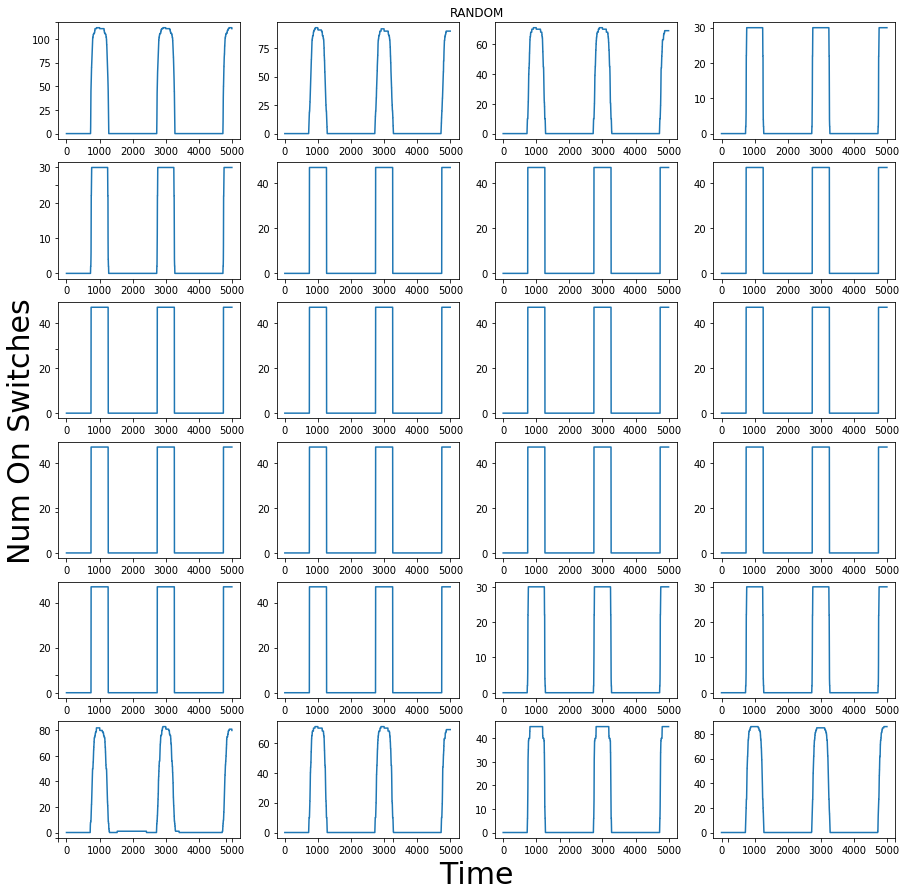

In [106]:
#network junctions switches:
fig1=plt.figure(figsize=(15,15))
plt.title('RANDOM')
ax=[None]*numNetworks
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
plt.xlabel('Time',fontsize=30,labelpad=15)
plt.ylabel('Num On Switches',fontsize=30,labelpad=15)
for i in range(numNetworks):
    ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
    plt.plot(np.sum(results_rand[i].junctionSwitch,1))

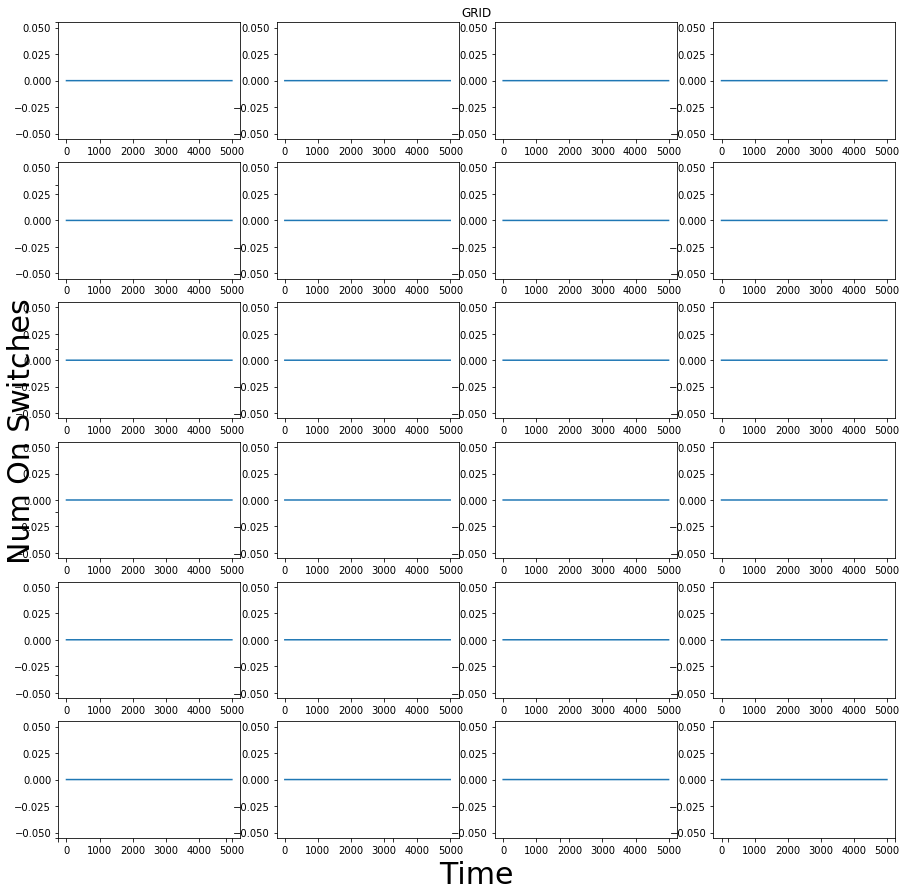

In [107]:
#Plot conductance!!!

#network junctions switches:
fig1=plt.figure(figsize=(15,15))
plt.title('GRID')
ax=[None]*numNetworks
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
plt.xlabel('Time',fontsize=30,labelpad=15)
plt.ylabel('Num On Switches',fontsize=30,labelpad=15)
for i in range(numNetworks):
    ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
    plt.plot(np.sum(results_grid[i].junctionSwitch,1))

## C. Elegans

In [111]:
#Instantiate Variables       
stimulus=[[],[]]
accSqu=[]
#    accTri=[]
#    accSaw=[]
#    accDbl=[]
maxSqu=[]
#    maxTri=[]
#    maxSaw=[]
#    maxDbl=[]
dt = 1e-2
f=0.5
Time=5
onAmp=2#[1.5,2,4,4,4,6,6,6,6,6,6,6,4,4,4,4,6,4,4,4,4,3,2,1.5]

#Choose Electrode Pattern

stimulus[0].append((stimulus__(biasType='AC',onAmp=onAmp,TimeVector=np.arange(0,Time,dt),f=f)))
stimulus[1].append((stimulus__(biasType='Drain',TimeVector=np.arange(0,Time,dt)))) #we don't want this drain to be active during training

#Initialise Output Variables
period=[]
TimeVector=[]
voltage=[]
conductance=[]
switches=[]
results=[None]*len([elegansGraph])
# Voltage=[None]*len(ASN300)
# Switches=[None]*len(ASN300)


nwSqu = []*len([elegansGraph])

#Run Simulations
# for i in range(len(ASN300)): #for each network
print('Network C.Elegans')
#Run Simulations
#     results=[]
# Connectivity=connectivity__('700nw_14533junctions.mat')
stimulus2 = [item for item in stimulus] #go through each list in the list and find the ith item
#     set_trace()
results=runSim(connectivity__(graph=elegansGraph),stimulus=stimulus2, contactMode='farthest', T = Time, dt = 0.001, onAmp = onAmp, biasType='AC',f=f,junctionMode='tunneling')
#wires_dict=newNetworkTest[chosenNetwork])
results.frequency=f
results.dt=0.001
period=1/f

TimeVector=results.TimeVector
voltage=results.wireVoltage
conductance=results.conductance
switches=results.junctionSwitch

stepNodes=len(elegansGraph)-1 #first use all nodes
sizes2=len(elegansGraph)
nwOutputs = [None]* int(sizes2/stepNodes)

outputNodes2=[]

for k in range(stepNodes,sizes2+1,stepNodes): #stepping up nodes
    np.random.seed(69)

    outputNodes2.append(voltage[:,np.random.choice(len(voltage[0,:]),size=k,replace=False)]) #take all the times (:) for a random j nodes

    nwOutputs=outputNodes2 #Length of nwOutputs is k (list)

target1=[None]*len(nwOutputs)
#     target2=[None]*len(nwOutputs)
#     target3=[None]*len(nwOutputs)
#     target4=[None]*len(nwOutputs)
#     target5=[None]*len(nwOutputs)

for j in range(len(nwOutputs)):
    target1[j] = (onAmp * (-np.sign(TimeVector % period - period/2)))
#         target2[j] = (4*onAmp[i]/period * abs((TimeVector-period/4) % period - period/2) - onAmp[i])
#         target3[j] = (onAmp[i]/period * (TimeVector % period))
#         target4[j] = (onAmp[i]*np.sin(4*np.pi*(1/period)*TimeVector))


#        nwTri     = np.zeros(len(nwOutputs))
#        nwSaw     = np.zeros(len(nwOutputs))
#        nwDbl     = np.zeros(len(nwOutputs))
#     nwMG      = [[None]*networksLoad,[None]*len(nwOutputs[0])]

ResultSqu=[]
#        ResultTri=[]
#        ResultSaw=[]
accuracy=[]
#        accuracyTri=[]
#        accuracySaw=[]
#        accuracyDbl=[]
output=[]
mSqu=[]
#        mTri=[]
#        mSaw=[]
#        mDbl=[]

# RUN LINEAR TRANSFORMATION
nodesListElegans=[50,100,150,200,250,len(Elegans['G'])]
for j in nodesListElegans: #range(50, len(Elegans['G'])+1,50): #loop through sets of nodes 
    print('Running Regression: ' + str(j) + ' nodes')
    
    ResultSqu=nonLinearTrans(results,'Square',j, repeats=50) #NOKEVregression(target1[j],nwOutputs[j].T)[0]
    
    nwSqu.append(ResultSqu['accuracy'])#(1 - rnMSE)
    
    
#THRESHOLD FOR COMMUNICABILITY MEASURE
results=[results]
# # From Matlab:
# resistance=results.junctionResistance
# for i in range(len(resistance)):
#     if resistance[i]<10000:
#         resistance[i][resistance[i]<10000]=1
# else:
#     resistance[i]=0

Network C.Elegans


2020-04-02 11:28:23,215:INFO:First current path [9, 38, 16, 169, 105, 98, 36] formed at time = 0.509 s.



Running Regression: 50 nodes
Running Regression: 100 nodes
Running Regression: 150 nodes
Running Regression: 200 nodes
Running Regression: 250 nodes
Running Regression: 277 nodes


In [112]:
#Current and Communicability Matrices
commuMatElegans_LT=[None]*len(results)
currMatElegans_LT=[None]*len(results)
# for i in tqdm(range(len(results))):
commuMatElegans_LT,currMatElegans_LT=commCurr(results[0])

In [113]:
Elegans['Accuracy']['Linear Transformation']=nwSqu

In [114]:
Elegans['Accuracy']['Linear Transformation']

[0.6100474965462256,
 0.6673114913016772,
 0.7255443423201424,
 0.7512295216747583,
 0.8044220856451315,
 0.8074621237300447]

## Plot Accuracies

In [115]:
Elegans.keys()

dict_keys(['adj_matrix', 'G', 'Accuracy', 'Graph Theory'])

In [116]:
WS_Random[0].keys()

dict_keys(['adj_matrix', 'G', 'Accuracy', 'Graph Theory'])

In [117]:
WS_Grid[0].keys()

dict_keys(['adj_matrix', 'G', 'Accuracy', 'Graph Theory'])

In [118]:
#### 16/03/2020 - TO DO: Add different number of nodes sampled as subplots: 

In [136]:
ASNaccuracy=[[None]*len(ASN300) for i in range(len(nodesList[0]))]
cluster1accuracy=[[None]*len(cluster1) for i in range(len(nodesList[0]))]
cluster2accuracy=[[None]*len(cluster2) for i in range(len(nodesList[0]))]
cluster3accuracy=[[None]*len(cluster3) for i in range(len(nodesList[0]))]

for i in range(len(ASN300)):
    temp=[]
    for j in range(len(ASN300[i]['Accuracy']['Linear Transformation'])):
        temp=ASN300[i]['Accuracy']['Linear Transformation'][j]
        if j == 0:
            ASNaccuracy[0][i]= temp
        elif j == 1:
            ASNaccuracy[1][i]= temp
        elif j == 2:
            ASNaccuracy[2][i]= temp
        elif j == 3:
            ASNaccuracy[3][i]= temp
        elif j == 4:
            ASNaccuracy[4][i]= temp
        elif j == 5:
            ASNaccuracy[5][i]= temp

for i in range(len(ASNaccuracy)):    
    count1=0
    count2=0
    count3=0
    for j in range(len(ASNaccuracy[i])):
        if j < len(cluster1):
            cluster1accuracy[i][count1]=ASNaccuracy[i][j]
            count1=count1+1
        elif j >= len(cluster1) and j < (len(cluster1) + len(cluster2)):
            cluster2accuracy[i][count2]=ASNaccuracy[i][j]
            count2=count2+1
        else:
            cluster3accuracy[i][count3]=ASNaccuracy[i][j]
            count3=count3+1

In [146]:
WS_Randomaccuracy=[[None]*len(WS_Random) for i in range(len(nodesListWS))]
for i in range(len(ASN300)):
    temp=[]
    for j in range(len(WS_Random[i]['Accuracy']['Linear Transformation'])):
        temp=WS_Random[i]['Accuracy']['Linear Transformation'][j]
        if j == 0:
            WS_Randomaccuracy[0][i]= temp
        elif j == 1:
            WS_Randomaccuracy[1][i]= temp
        elif j == 2:
            WS_Randomaccuracy[2][i]= temp
        elif j == 3:
            WS_Randomaccuracy[3][i]= temp
        elif j == 4:
            WS_Randomaccuracy[4][i]= temp
        elif j == 5:
            WS_Randomaccuracy[5][i]= temp

In [147]:
WS_Gridaccuracy=[[None]*len(WS_Grid) for i in range(len(nodesListWS))]
for i in range(len(ASN300)):
    temp=[]
    for j in range(len(WS_Grid[i]['Accuracy']['Linear Transformation'])):
        temp=WS_Grid[i]['Accuracy']['Linear Transformation'][j]
        if j == 0:
            WS_Gridaccuracy[0][i]= temp
        elif j == 1:
            WS_Gridaccuracy[1][i]= temp
        elif j == 2:
            WS_Gridaccuracy[2][i]= temp
        elif j == 3:
            WS_Gridaccuracy[3][i]= temp
        elif j == 4:
            WS_Gridaccuracy[4][i]= temp
        elif j == 5:
            WS_Gridaccuracy[5][i]= temp

In [148]:
Elegans_Accuracy=Elegans['Accuracy']['Linear Transformation']

Text(0.5, 0, 'Network')

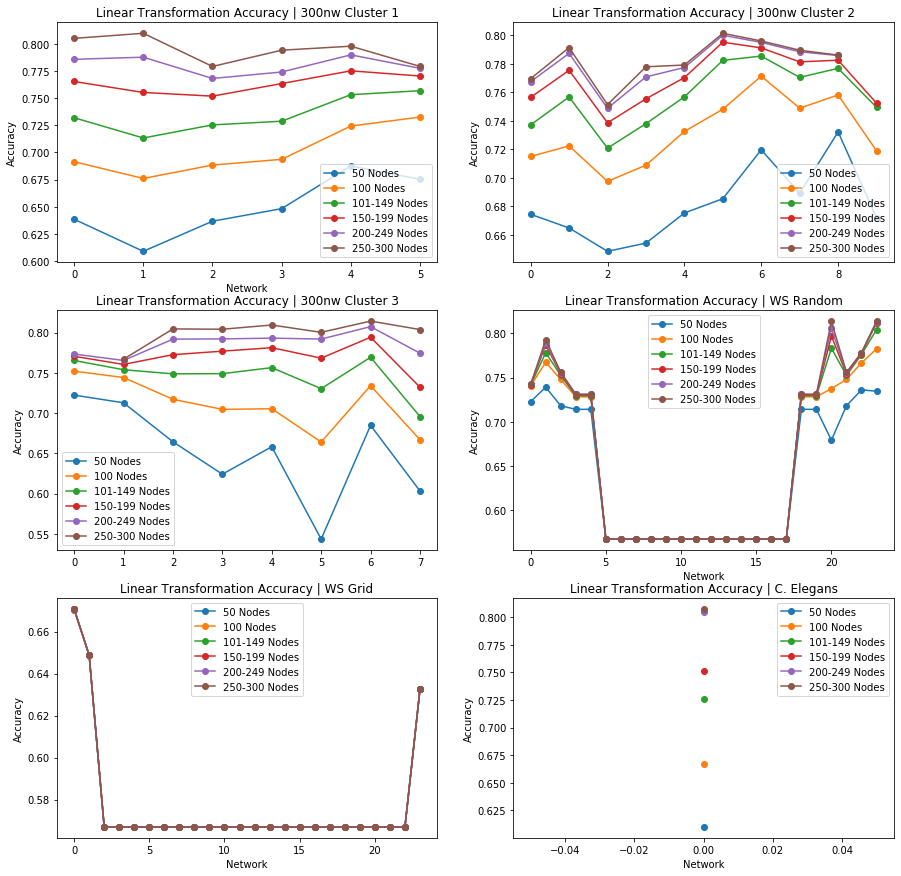

In [149]:
#300nw ASN

labels=['50 Nodes', '100 Nodes', '101-149 Nodes', '150-199 Nodes', '200-249 Nodes', '250-300 Nodes']

fig1=plt.figure(figsize=(15,15))
ax=[None]*6
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_xticks([])
axBig.set_yticks([])
fig1.subplots_adjust(hspace=.4)
ax[0]=fig1.add_subplot(3, 2, 1)
for i in range(len(cluster1accuracy)):
    plt.title('Linear Transformation Accuracy | 300nw Cluster 1')
    plt.plot(cluster1accuracy[i],'-o',label=labels[i])
# plt.plot(WS_Rand_Accuracy,label='WS Random')
# plt.plot(WS_Grid_Accuracy,label='WS Grid')
# plt.hlines(Elegans_Accuracy,0,24,label='Elegans')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Network')


ax[1]=fig1.add_subplot(3, 2, 2)
for i in range(len(cluster2accuracy)):
    plt.title('Linear Transformation Accuracy | 300nw Cluster 2')
    plt.plot(cluster2accuracy[i],'-o',label=labels[i])
# plt.plot(WS_Rand_Accuracy,label='WS Random')
# plt.plot(WS_Grid_Accuracy,label='WS Grid')
# plt.hlines(Elegans_Accuracy,0,24,label='Elegans')
plt.legend()
plt.ylabel('Accuracy')


ax[1]=fig1.add_subplot(3, 2, 3)
for i in range(len(cluster3accuracy)):
    plt.title('Linear Transformation Accuracy | 300nw Cluster 3')
    plt.plot(cluster3accuracy[i],'-o',label=labels[i])
# plt.plot(WS_Rand_Accuracy,label='WS Random')
# plt.plot(WS_Grid_Accuracy,label='WS Grid')
# plt.hlines(Elegans_Accuracy,0,24,label='Elegans')
plt.legend()
plt.ylabel('Accuracy')


#WS RANDOM
ax[3]=fig1.add_subplot(3, 2, 4)

for i in range(len(WS_Randomaccuracy)):
    plt.title('Linear Transformation Accuracy | WS Random')
    plt.plot(WS_Randomaccuracy[i],'-o',label=labels[i])

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Network')


#WS RANDOM
ax[4]=fig1.add_subplot(3, 2, 5)

for i in range(len(WS_Gridaccuracy)):
    plt.title('Linear Transformation Accuracy | WS Grid')
    plt.plot(WS_Gridaccuracy[i],'-o',label=labels[i])

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Network')

#Elegans 
ax[5]=fig1.add_subplot(3, 2, 6)

for i in range(len(Elegans_Accuracy)):
    plt.title('Linear Transformation Accuracy | C. Elegans')
    plt.plot(Elegans_Accuracy[i],'-o',label=labels[i])

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Network')


### Sort by Small Worldness

In [163]:
cluster1sw=[]
cluster2sw=[]
cluster3sw=[]
for i in range(len(cluster1)):
    cluster1sw.append(cluster1[i]['Graph Theory']['Small World'])
for i in range(len(cluster2)):
    cluster2sw.append(cluster2[i]['Graph Theory']['Small World'])
for i in range(len(cluster3)):
    cluster3sw.append(cluster3[i]['Graph Theory']['Small World'])

In [170]:
#sort networks by small-worldness
ASN_sw_idx=np.argsort(smallworld)
cluster1_sw_idx=np.argsort(cluster1sw)
cluster2_sw_idx=np.argsort(cluster2sw)
cluster3_sw_idx=np.argsort(cluster3sw)
ASN_sw=np.sort(smallworld)
sortedbysw_ASN_Accuracy=[[None]*len(ASN_sw_idx) for i in range(len(ASNaccuracy))]
sortedbysw_cluster1accuracy=[[None]*len(cluster1_sw_idx) for i in range(len(cluster1accuracy))]
sortedbysw_cluster2accuracy=[[None]*len(cluster2_sw_idx) for i in range(len(cluster2accuracy))]
sortedbysw_cluster3accuracy=[[None]*len(cluster3_sw_idx) for i in range(len(cluster3accuracy))]

for i in range(len(ASNaccuracy)):
    count1=0
    count2=0
    count3=0
    for j in range(len(ASN_sw_idx)):
        currentNW=ASN_sw_idx[j]
        sortedbysw_ASN_Accuracy[i][j]=(ASNaccuracy[i][currentNW])
        
        if j < len(cluster1):
            currentNW1=cluster1_sw_idx[count1]
            sortedbysw_cluster1accuracy[i][count1]=cluster1accuracy[i][currentNW1]
            count1=count1+1
        elif j >= len(cluster1) and j < (len(cluster1) + len(cluster2)):
            currentNW2=cluster2_sw_idx[count2]
            sortedbysw_cluster2accuracy[i][count2]=cluster2accuracy[i][currentNW2]
            count2=count2+1
        else:
            currentNW3=cluster3_sw_idx[count3]
            sortedbysw_cluster3accuracy[i][count3]=cluster3accuracy[i][currentNW3]
            count3=count3+1
        
#     sortedbysw_ASN_Accuracy.append([x for _,x in sorted(zip(ASN_sw_idx,ASNaccuracy[i]))])

#RANDOM
rand_sw_idx=np.argsort(smallworld_random)
rand_sw=np.sort(smallworld_random)
sortedbysw_WS_Random_Accuracy=[[None]*len(rand_sw_idx) for i in range(len(WS_Randomaccuracy))]
for i in range(len(WS_Randomaccuracy)):
    for j in range(len(rand_sw_idx)):
        currentNW=rand_sw_idx[j]
        sortedbysw_WS_Random_Accuracy[i][j]=(WS_Randomaccuracy[i][currentNW])#([x for _,x in sorted(zip(rand_sw_idx,WS_Randomaccuracy[i]))])
#GRID
grid_sw_idx=np.argsort(smallworld_grid)
grid_sw=np.sort(smallworld_grid)
sortedbysw_WS_Grid_Accuracy=[[None]*len(grid_sw_idx) for i in range(len(WS_Gridaccuracy))]
# sortedbysw_WS_Grid_Accuracy=[]
for i in range(len(WS_Gridaccuracy)):
    for j in range(len(grid_sw_idx)):
        currentNW=grid_sw_idx[j]
        sortedbysw_WS_Grid_Accuracy[i][j]=(WS_Gridaccuracy[i][currentNW])
#     sortedbysw_WS_Grid_Accuracy.append([x for _,x in sorted(zip(grid_sw_idx,WS_Gridaccuracy[i]))])

Text(0.5, 0, 'Networks Sorted from min Small World to max')

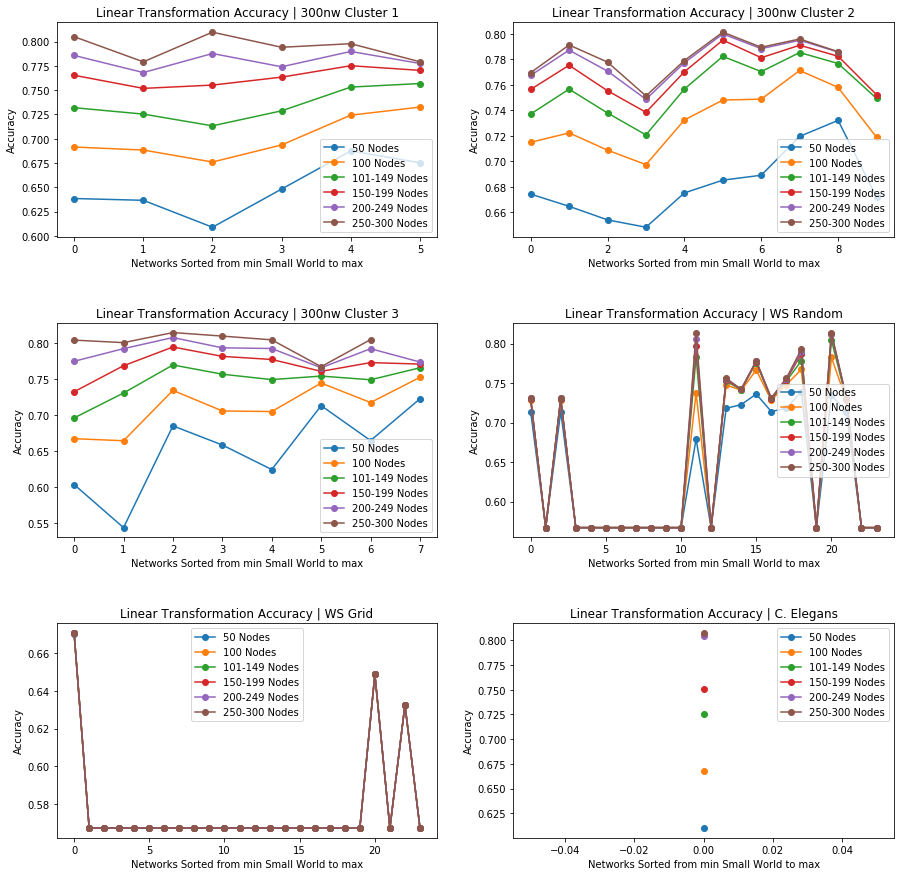

In [178]:
#300nw ASN

labels=['50 Nodes', '100 Nodes', '101-149 Nodes', '150-199 Nodes', '200-249 Nodes', '250-300 Nodes']

fig1=plt.figure(figsize=(15,15))
ax=[None]*6
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_xticks([])
axBig.set_yticks([])
fig1.subplots_adjust(hspace=.4)
ax[0]=fig1.add_subplot(3, 2, 1)
for i in range(len(sortedbysw_cluster1accuracy)):
    plt.title('Linear Transformation Accuracy | 300nw Cluster 1')
    plt.plot(sortedbysw_cluster1accuracy[i],'-o',label=labels[i])
# plt.plot(WS_Rand_Accuracy,label='WS Random')
# plt.plot(WS_Grid_Accuracy,label='WS Grid')
# plt.hlines(Elegans_Accuracy,0,24,label='Elegans')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Networks Sorted from min Small World to max')

ax[1]=fig1.add_subplot(3, 2, 2)
for i in range(len(sortedbysw_cluster2accuracy)):
    plt.title('Linear Transformation Accuracy | 300nw Cluster 2')
    plt.plot(sortedbysw_cluster2accuracy[i],'-o',label=labels[i])
# plt.plot(WS_Rand_Accuracy,label='WS Random')
# plt.plot(WS_Grid_Accuracy,label='WS Grid')
# plt.hlines(Elegans_Accuracy,0,24,label='Elegans')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Networks Sorted from min Small World to max')

ax[2]=fig1.add_subplot(3, 2, 3)
for i in range(len(sortedbysw_cluster3accuracy)):
    plt.title('Linear Transformation Accuracy | 300nw Cluster 3')
    plt.plot(sortedbysw_cluster3accuracy[i],'-o',label=labels[i])
# plt.plot(WS_Rand_Accuracy,label='WS Random')
# plt.plot(WS_Grid_Accuracy,label='WS Grid')
# plt.hlines(Elegans_Accuracy,0,24,label='Elegans')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Networks Sorted from min Small World to max')


#WS RANDOM
ax[3]=fig1.add_subplot(3, 2, 4)

for i in range(len(sortedbysw_WS_Random_Accuracy)):
    plt.title('Linear Transformation Accuracy | WS Random')
    plt.plot(sortedbysw_WS_Random_Accuracy[i],'-o',label=labels[i])

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Networks Sorted from min Small World to max')

#WS RANDOM
ax[4]=fig1.add_subplot(3, 2, 5)

for i in range(len(sortedbysw_WS_Grid_Accuracy)):
    plt.title('Linear Transformation Accuracy | WS Grid')
    plt.plot(sortedbysw_WS_Grid_Accuracy[i],'-o',label=labels[i])

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Networks Sorted from min Small World to max')
#Elegans 
ax[5]=fig1.add_subplot(3, 2, 6)

for i in range(len(Elegans_Accuracy)):
    plt.title('Linear Transformation Accuracy | C. Elegans')
    plt.plot(Elegans_Accuracy[i],'-o',label=labels[i])

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Networks Sorted from min Small World to max')

# plt.figure(figsize=(10,10))
# plt.title('Sorted Linear Transformation Accuracy | ALL nodes sampled')
# plt.plot(sortedbysw_ASN_Accuracy,"o-",label='300nw ASN')
# plt.plot(sortedbysw_WS_Random_Accuracy,"o-",label='WS Random')
# plt.plot(sortedbysw_WS_Grid_Accuracy,"o-",label='WS Grid')
# plt.hlines(Elegans_Accuracy,0,24,label='Elegans')
# plt.legend(loc='lower right')


In [204]:
# #network junctions switches:
# fig1=plt.figure(figsize=(15,15))
# ax=[None]*len(nodesList[0])
# axBig = fig1.add_subplot(111)
# axBig.set_frame_on(False)
# axBig.set_yticklabels([])
# axBig.set_xticklabels([])
# axBig.set_xticks([])
# axBig.set_yticks([])
# plt.xlabel('Network ID',fontsize=30,labelpad=15)
# plt.ylabel('Accuracy',fontsize=30,labelpad=15)
# plt.title('Unsorted',fontsize=30,pad=30)

# for i in range(len(ax)):
#     count1=0
#     count2=0
#     count3=0
#     ax[i]=fig1.add_subplot(2, 3, i+1)
#     for j in range(len(ASN300)):
#         if j < len(cluster1):
#             if count1 == 0:
#                 plt.plot(cluster1accuracy[i][count1],'-o',label='ASN Cluster 1')
#             else:
#                 plt.plot(cluster1accuracy[i][count1],'-o')
#             count1 = count1+ 1
#         elif j >= len(cluster1) and j < (len(cluster1)+len(cluster2)):
#             if count2 == 0:
#                 plt.plot(cluster2accuracy[i][count2],'-o',label='ASN Cluster 2')
#             else:
#                 plt.plot(cluster2accuracy[i][count2],'-o')
#             count2 = count2+ 1
#         else:
#             if count3 == 0:
#                 plt.plot(cluster3accuracy[i][count3],'-o',label='ASN Cluster 3')
#             else:
#                 plt.plot(cluster3accuracy[i][count3],'-o') 
#             count3 = count3+ 1
        
#     plt.plot(WS_Randomaccuracy[i],'-o',label='WS Random')
#     plt.plot(WS_Gridaccuracy[i],'-o',label='WS Grid')
#     plt.hlines(Elegans_Accuracy[i],0,24,label='Elegans')
#     plt.title(str(labels[i]))
#     plt.legend()
#     plt.ylim(0.5,0.9)


In [205]:
# #network junctions switches:
# fig1=plt.figure(figsize=(15,15))
# ax=[None]*len(nodesList[0])
# axBig = fig1.add_subplot(111)
# axBig.set_frame_on(False)
# axBig.set_yticklabels([])
# axBig.set_xticklabels([])
# axBig.set_xticks([])
# axBig.set_yticks([])
# plt.xlabel('Network sorted by SW (min to max)',fontsize=30,labelpad=15)
# plt.ylabel('Accuracy',fontsize=30,labelpad=15)
# plt.title('Sorted by Smallworld Propensity',fontsize=30,pad=30)
# for i in range(len(ax)):
#     ax[i]=fig1.add_subplot(2, 3, i+1)
#     plt.plot(sortedbysw_ASN_Accuracy[i],'-o',label='ASN')
#     plt.plot(sortedbysw_WS_Random_Accuracy[i],'-o',label='WS Random')
#     plt.plot(sortedbysw_WS_Grid_Accuracy[i],'-o',label='WS Grid')
#     plt.hlines(Elegans_Accuracy[i],0,24,label='Elegans')
#     plt.title(str(labels[i]))
#     plt.legend()
#     plt.ylim(0.5,0.9)

In [201]:
ASNsw=[]
WS_Randsw=[]
WS_Gridsw=[]
Eleganssw=[]
for i in range(len(ASN300)):
    ASNsw.append(ASN300[i]['Graph Theory']['Small World'])
    WS_Randsw.append(WS_Random[i]['Graph Theory']['Small World'])
    WS_Gridsw.append(WS_Grid[i]['Graph Theory']['Small World'])

In [ ]:
#network junctions switches:
fig1=plt.figure(figsize=(15,15))
ax=[None]*len(nodesList[0])
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_xticks([])
axBig.set_yticks([])
plt.xlabel('Small World Propensity',fontsize=30,labelpad=20)
plt.ylabel('Accuracy',fontsize=30,labelpad=20)
plt.title('Sorted by Smallworld Propensity',fontsize=30,pad=30)
for i in range(len(ax)):
    count1=0
    count2=0
    count3=0
    ax[i]=fig1.add_subplot(2, 3, i+1)
    for j in range(len(ASNaccuracy[i])):
        if j < len(cluster1):
            if count1==0:
                plt.scatter(cluster1sw[count1],cluster1accuracy[i][count1],marker='s',color='r',label='Cluster 1')#,'-o',label='ASN')
            else:
                plt.scatter(cluster1sw[count1],cluster1accuracy[i][count1],marker='s',color='r')#,'-o',label='ASN')
            count1=count1+1
#         elif j>=len(cluster1) and j<len(cluster1)+len(cluster2):
#             if count2==0:
#                 plt.scatter(cluster2sw[count2],cluster2accuracy[i][count2],marker='s',color='#ff796c',label='Cluster 2')#,'-o',label='ASN')
#             else:
#                 plt.scatter(cluster2sw[count2],cluster2accuracy[i][count2],marker='s',color='#ff796c')
#             count2=count2+1
#         else:
#             if count3==0:
#                 plt.scatter(cluster3sw[count3],cluster3accuracy[i][count3],marker='s',color='#8f1402',label='Cluster 3')#,'-o',label='ASN')
#             else:
#                 plt.scatter(cluster3sw[count3],cluster3accuracy[i][count3],marker='s',color='#8f1402')
            count3=count3+1
#     plt.scatter(smallworld_random,WS_Randomaccuracy[i],label='WS Random',marker='o',color='#06470c')#,'-o',label='WS Random')
#     plt.scatter(smallworld_grid,WS_Gridaccuracy[i],label='WS Grid',marker='o',color='g')#,'-o',label='WS Grid')
    plt.scatter(Elegans['Graph Theory']['Small World'],Elegans_Accuracy[i],label='Elegans',marker='x',color='b')#,0,24,label='Elegans')
    plt.title(str(labels[i]))
    plt.legend()
    plt.ylim(0.55,0.85)
    
     # Add correlation line
        #ASN300
    x=np.array(cluster1sw, dtype=np.float)
    y=np.array(cluster1accuracy[i], dtype=np.float)
    idx = np.isfinite(x) & np.isfinite(y)
    m, b = np.polyfit(x[idx],y[idx], 1)
    X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '--',color='r')
    
#     x=np.array(cluster2sw, dtype=np.float)
#     y=np.array(cluster2accuracy[i], dtype=np.float)
#     idx = np.isfinite(x) & np.isfinite(y)
#     m, b = np.polyfit(x[idx],y[idx], 1)
#     X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '--',color='#ff796c')
    
#     x=np.array(cluster3sw, dtype=np.float)
#     y=np.array(cluster3accuracy[i], dtype=np.float)
#     idx = np.isfinite(x) & np.isfinite(y)
#     m, b = np.polyfit(x[idx],y[idx], 1)
#     X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '--',color='#8f1402')
#      #WS Random
#     x=np.array(smallworld_random, dtype=np.float)
#     y=np.array(WS_Randomaccuracy[i], dtype=np.float)
#     idx = np.isfinite(x) & np.isfinite(y)
#     m, b = np.polyfit(x[idx],y[idx], 1)
#     X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '-')
    
#     x=np.array(smallworld_grid, dtype=np.float)
#     y=np.array(WS_Gridaccuracy[i], dtype=np.float)
#     idx = np.isfinite(x) & np.isfinite(y)
#     m, b = np.polyfit(x[idx],y[idx], 1)
#     X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '-')
    
    plt.savefig(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Data\Figures\Functional Connectivity\Linear Transformation Accuracy vs Small World Prop.jpg')


In [252]:
#Define Final Accuracy Dicts:
WS_Grid_Final=dict({'Accuracy':{'Mackey Glass':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]},'Linear Transformation':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]}}})
WS_Random_Final=dict({'Accuracy':{'Mackey Glass':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]},'Linear Transformation':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]}}})
Cluster1_Final=dict({'Accuracy':{'Mackey Glass':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]},'Linear Transformation':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]}}})
Cluster2_Final=dict({'Accuracy':{'Mackey Glass':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]},'Linear Transformation':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]}}})
Cluster3_Final=dict({'Accuracy':{'Mackey Glass':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]},'Linear Transformation':{'Max Accuracy':[],'Min Accuracy':[],'Mean Accuracy':[],'STD Accuracy':[]}}})

In [254]:
ASN_max_accuracy=[None]*len(ASNaccuracy)
cluster1_max_accuracy=[None]*len(cluster1accuracy)
cluster2_max_accuracy=[None]*len(cluster2accuracy)
cluster3_max_accuracy=[None]*len(cluster3accuracy)
ASN_min_accuracy=[None]*len(ASNaccuracy)
cluster1_min_accuracy=[None]*len(cluster1accuracy)
cluster2_min_accuracy=[None]*len(cluster2accuracy)
cluster3_min_accuracy=[None]*len(cluster3accuracy)
ASN_mean_accuracy=[None]*len(ASNaccuracy)
cluster1_mean_accuracy=[None]*len(cluster1accuracy)
cluster2_mean_accuracy=[None]*len(cluster2accuracy)
cluster3_mean_accuracy=[None]*len(cluster3accuracy)
ASN_std_accuracy=[None]*len(ASNaccuracy)
cluster1_std_accuracy=[None]*len(cluster1accuracy)
cluster2_std_accuracy=[None]*len(cluster2accuracy)
cluster3_std_accuracy=[None]*len(cluster3accuracy)
for i in range(len(ASNaccuracy)):
    ASN_max_accuracy[i]=np.nanmax(np.array(ASNaccuracy[i], dtype=np.float64))
    cluster1_max_accuracy[i]=np.nanmax(np.array(cluster1accuracy[i], dtype=np.float64))
    cluster2_max_accuracy[i]=np.nanmax(np.array(cluster2accuracy[i], dtype=np.float64))
    cluster3_max_accuracy[i]=np.nanmax(np.array(cluster3accuracy[i], dtype=np.float64))
    ASN_min_accuracy[i]=np.nanmin(np.array(ASNaccuracy[i], dtype=np.float64))
    cluster1_min_accuracy[i]=np.nanmin(np.array(cluster1accuracy[i], dtype=np.float64))
    cluster2_min_accuracy[i]=np.nanmin(np.array(cluster2accuracy[i], dtype=np.float64))
    cluster3_min_accuracy[i]=np.nanmin(np.array(cluster3accuracy[i], dtype=np.float64))
    ASN_mean_accuracy[i]=np.nanmean(np.array(ASNaccuracy[i], dtype=np.float64))
    cluster1_mean_accuracy[i]=np.nanmean(np.array(cluster1accuracy[i], dtype=np.float64))
    cluster2_mean_accuracy[i]=np.nanmean(np.array(cluster2accuracy[i], dtype=np.float64))
    cluster3_mean_accuracy[i]=np.nanmean(np.array(cluster3accuracy[i], dtype=np.float64))
    ASN_std_accuracy[i]=np.nanstd(np.array(ASNaccuracy[i], dtype=np.float64))
    cluster1_std_accuracy[i]=np.nanstd(np.array(cluster1accuracy[i], dtype=np.float64))
    cluster2_std_accuracy[i]=np.nanstd(np.array(cluster2accuracy[i], dtype=np.float64))
    cluster3_std_accuracy[i]=np.nanstd(np.array(cluster3accuracy[i], dtype=np.float64))

Cluster1_Final['Accuracy']['Linear Transformation']['Max Accuracy']=cluster1_max_accuracy
Cluster2_Final['Accuracy']['Linear Transformation']['Max Accuracy']=cluster2_max_accuracy
Cluster3_Final['Accuracy']['Linear Transformation']['Max Accuracy']=cluster3_max_accuracy
Cluster1_Final['Accuracy']['Linear Transformation']['Min Accuracy']=cluster1_min_accuracy
Cluster2_Final['Accuracy']['Linear Transformation']['Min Accuracy']=cluster2_min_accuracy
Cluster3_Final['Accuracy']['Linear Transformation']['Min Accuracy']=cluster3_min_accuracy
Cluster1_Final['Accuracy']['Linear Transformation']['Mean Accuracy']=cluster1_mean_accuracy
Cluster2_Final['Accuracy']['Linear Transformation']['Mean Accuracy']=cluster2_mean_accuracy
Cluster3_Final['Accuracy']['Linear Transformation']['Mean Accuracy']=cluster3_mean_accuracy
Cluster1_Final['Accuracy']['Linear Transformation']['STD Accuracy']=cluster1_std_accuracy
Cluster2_Final['Accuracy']['Linear Transformation']['STD Accuracy']=cluster2_std_accuracy
Cluster3_Final['Accuracy']['Linear Transformation']['STD Accuracy']=cluster3_std_accuracy   

WSRandom_max_accuracy=[None]*len(WS_Randomaccuracy)
WSRandom_min_accuracy=[None]*len(WS_Randomaccuracy)
WSRandom_mean_accuracy=[None]*len(WS_Randomaccuracy)
WSRandom_std_accuracy=[None]*len(WS_Randomaccuracy)
for i in range(len(WS_Randomaccuracy)):
    WSRandom_max_accuracy[i]=np.nanmax(np.array(WS_Randomaccuracy[i], dtype=np.float64))
    WSRandom_min_accuracy[i]=np.nanmin(np.array(WS_Randomaccuracy[i], dtype=np.float64))
    WSRandom_mean_accuracy[i]=np.nanmean(np.array(WS_Randomaccuracy[i], dtype=np.float64))
    WSRandom_std_accuracy[i]=np.nanstd(np.array(WS_Randomaccuracy[i], dtype=np.float64))
    
WSGrid_min_accuracy=[None]*len(WS_Gridaccuracy)
WSGrid_mean_accuracy=[None]*len(WS_Gridaccuracy)
WSGrid_max_accuracy=[None]*len(WS_Gridaccuracy)
WSGrid_std_accuracy=[None]*len(WS_Gridaccuracy)

for i in range(len(WS_Gridaccuracy)):
    WSGrid_max_accuracy[i]=np.nanmax(np.array(WS_Gridaccuracy[i], dtype=np.float64))
    WSGrid_min_accuracy[i]=np.nanmin(np.array(WS_Gridaccuracy[i], dtype=np.float64))
    WSGrid_mean_accuracy[i]=np.nanmean(np.array(WS_Gridaccuracy[i], dtype=np.float64))
    WSGrid_std_accuracy[i]=np.nanstd(np.array(WS_Gridaccuracy[i], dtype=np.float64))
    
WS_Random_Final['Accuracy']['Linear Transformation']['Max Accuracy']=WSRandom_max_accuracy
WS_Grid_Final['Accuracy']['Linear Transformation']['Max Accuracy']=WSGrid_max_accuracy
WS_Random_Final['Accuracy']['Linear Transformation']['Min Accuracy']=WSRandom_min_accuracy
WS_Grid_Final['Accuracy']['Linear Transformation']['Min Accuracy']=WSGrid_min_accuracy
WS_Random_Final['Accuracy']['Linear Transformation']['Mean Accuracy']=WSRandom_mean_accuracy
WS_Grid_Final['Accuracy']['Linear Transformation']['Mean Accuracy']=WSGrid_mean_accuracy
WS_Random_Final['Accuracy']['Linear Transformation']['STD Accuracy']=WSRandom_std_accuracy
Cluster2_Final['Accuracy']['Linear Transformation']['STD Accuracy']=WSGrid_std_accuracy

In [257]:
# from math import ceil, floor
# def float_round(num, places = 0, direction = floor):
#     return direction(num * (10**places)) / float(10**places)
# print('Highest Accuracy: 50 Nodes, 100 Nodes, 100-150 Nodes, 150-200 Nodes, 200-250 Nodes, 250-300 Nodes')
# print('---------')
# print("All ASN 300nw: " + ', '.join(str(float_round(f, 3, round)) for f in ASN_max_accuracy))
# print("ASN 300nw Cluster 1: " + ', '.join(str(float_round(f, 3, round)) for f in cluster1_max_accuracy))
# print("ASN 300nw Cluster 2: " + ', '.join(str(float_round(f, 3, round)) for f in cluster2_max_accuracy))
# print("ASN 300nw Cluster 3: " + ', '.join(str(float_round(f, 3, round)) for f in cluster3_max_accuracy))
# print("WS Random: " +  ', '.join(str(float_round(f, 3, round)) for f in WSRandom_max_accuracy))
# print("WS Grid: " +  ', '.join(str(float_round(f, 3, round)) for f in WSGrid_max_accuracy))
# print("C Elegans: " + ', '.join(str(float_round(f, 3, round)) for f in Elegans_Accuracy))

In [258]:
# print('Lowest Accuracy: 50 Nodes, 100 Nodes, 100-150 Nodes, 150-200 Nodes, 200-250 Nodes, 250-300 Nodes')
# print('---------')
# print("All ASN 300nw: " + ', '.join(str(float_round(f, 3, round)) for f in ASN_min_accuracy))
# print("ASN 300nw Cluster 1: " + ', '.join(str(float_round(f, 3, round)) for f in cluster1_min_accuracy))
# print("ASN 300nw Cluster 2: " + ', '.join(str(float_round(f, 3, round)) for f in cluster2_min_accuracy))
# print("ASN 300nw Cluster 3: " + ', '.join(str(float_round(f, 3, round)) for f in cluster3_min_accuracy))
# print("WS Random: " +  ', '.join(str(float_round(f, 3, round)) for f in WSRandom_min_accuracy))
# print("WS Grid: " +  ', '.join(str(float_round(f, 3, round)) for f in WSGrid_min_accuracy))
# print("C Elegans: " + ', '.join(str(float_round(f, 3, round)) for f in Elegans_Accuracy))

In [259]:
# print('Mean Accuracy: 50 Nodes, 100 Nodes, 100-150 Nodes, 150-200 Nodes, 200-250 Nodes, 250-300 Nodes')
# print('---------')
# print("All ASN 300nw: " + ', '.join(str(float_round(f, 3, round)) for f in ASN_mean_accuracy))
# print("ASN 300nw Cluster 1: " + ', '.join(str(float_round(f, 3, round)) for f in cluster1_mean_accuracy))
# print("ASN 300nw Cluster 2: " + ', '.join(str(float_round(f, 3, round)) for f in cluster2_mean_accuracy))
# print("ASN 300nw Cluster 3: " + ', '.join(str(float_round(f, 3, round)) for f in cluster3_mean_accuracy))
# print("WS Random: " +  ', '.join(str(float_round(f, 3, round)) for f in WSRandom_mean_accuracy))
# print("WS Grid: " +  ', '.join(str(float_round(f, 3, round)) for f in WSGrid_mean_accuracy))
# print("C Elegans: " + ', '.join(str(float_round(f, 3, round)) for f in Elegans_Accuracy))

In [260]:
#TO DO:

# configuration model random network
# edge swapping random network
# network x - other measures

# Communicability - switches that take into account the lambda value

# Mackey Glass

In [261]:
def runForecastNew(connectivity, multi = 1, shift = 0, 
                training_ratio = 0.3, past_steps = 50,
                cheat_period = 100, cheat_steps = 60,
                save_fig = False,
                disable_tqdm = False,inList = 0, outList=0):

    N = connectivity.numOfWires
    inList = inList#np.argsort(connectivity.xa)[0:20]
    outList = outList#np.argsort(connectivity.xb)[::-1][0:20]
    
    theMat = np.zeros((N+2, N+2))
    theMat[0:N, 0:N] = connectivity.adj_matrix
    theMat[N, inList] = 1
    theMat[inList, N] = 1
    theMat[N+1, outList] = 1
    theMat[outList, N+1] = 1
    theGraph = nx.from_numpy_array(theMat)
    
    Connectivity = connectivity__(graph = theGraph)
    # junctionList = [findJunctionIndex(Connectivity, N+1, i) for i in outList]
    
    SimulationOptions = simulationOptions__(dt = 1e-2, T = 100,
                                        contactMode = 'preSet',
                                        electrodes = [N, N+1])
    signal = mkg_generator(10000, tau = 18, a = 0.2, b = 0.1, dt = 0.1)*multi+shift
    SimulationOptions.stimulus[0] = stimulus__(biasType = 'Custom', TimeVector = SimulationOptions.TimeVector, customSignal = signal)
    JunctionState = junctionState__(Connectivity.numOfJunctions, mode = 'binary', collapse = True)

    sim1, weight1, measure1 = forecast(SimulationOptions, Connectivity, JunctionState,
                                   training_ratio, past_steps, forecast_on = True, measure_type = 'voltage', 
                                   past_signal = True, pre_activate = False, 
                                   cheat_on = True, cheat_period = cheat_period, cheat_steps = cheat_steps,
                                   update_weight = False, update_stepsize = 100, disable_tqdm = disable_tqdm)
    
    RNMSE = getRNMSE(sim1.forecast[sim1.predict_index]-shift, sim1.stimulus[0].signal[sim1.predict_index]-shift)
    sim1.forecastParams = dict(numOfWires = sim1.numOfWires,
                                numOfJunctions = sim1.numOfJunctions,
                                multi = multi, shift = shift,
                                training_ratio = training_ratio,
                                past_steps = past_steps,
                                cheat_period = cheat_period,
                                forecast_steps = cheat_period - cheat_steps,
                                cheat_steps = cheat_steps)
    if save_fig and (RNMSE < 0.5):
        plt.figure()
        plotForecastPanel(sim1)
        import time
        filename = time.strftime("%Y-%m-%d-%H%M%S") + '_RNMSE_' + str(np.round(RNMSE, 4)) + '.png'
        plt.savefig(filename)
    
    logging.info(f'RNMSE = {RNMSE}')
    return RNMSE


In [262]:
accuracy={'ASN300':[None]*len(ASN300),'Elegans':[],'WS Grid 300':[None]*len(ASN300),'WS Random 300':[None]*len(ASN300)}

## 300nw ASNs

In [263]:
ASN_con_300=[None]*len(ASN300)
for i in range(len(ASN300)):
    ASN_con_300[i]=connectivity__(wires_dict=ASN300[i])   
# ASN_con_100=connectivity__(wires_dict=ASN100)   

In [264]:
cheatSteps=range(10,61,10)
mse300_cheat=[[None]*len(ASN_con_300) for i in range(len(cheatSteps))]

for i in range(len(ASN_con_300)): #number of networks
    for j in range(len(cheatSteps)): #number of cheat steps
        print('Network ' + str(i))
        print('Cheat Steps ' + str(cheatSteps[j]))        
        #run forcast on network j for i cheat steps 
        mse300_cheat[j][i]=runForecast(ASN_con_300[i], multi = 1, shift = 0, 
                        training_ratio = 0.3, past_steps = 50,
                        cheat_period = 100, cheat_steps = cheatSteps[j],
                        save_fig = False,
                        disable_tqdm = False)

Network 0
Cheat Steps 10


2020-04-02 12:53:56,802:INFO:RNMSE = 6.233515583872523e+127



Network 0
Cheat Steps 20


2020-04-02 12:54:21,830:INFO:RNMSE = 1.4366436768285467e+101



Network 0
Cheat Steps 30


2020-04-02 12:54:47,022:INFO:RNMSE = 6.0157767776292945e+137



Network 0
Cheat Steps 40


2020-04-02 12:55:10,028:INFO:RNMSE = 6.817514436756987e+80



Network 0
Cheat Steps 50


2020-04-02 12:55:32,869:INFO:RNMSE = 0.08436555905346918



Network 0
Cheat Steps 60


2020-04-02 12:55:58,251:INFO:RNMSE = 0.05472904731696807



Network 1
Cheat Steps 10


2020-04-02 12:56:18,648:INFO:RNMSE = inf



Network 1
Cheat Steps 20


2020-04-02 12:56:39,021:INFO:RNMSE = 1.2538044619811996e+132



Network 1
Cheat Steps 30


2020-04-02 12:56:58,552:INFO:RNMSE = 1.660141247283157e+121



Network 1
Cheat Steps 40


2020-04-02 12:57:17,622:INFO:RNMSE = 3.912532571545651e+27



Network 1
Cheat Steps 50


2020-04-02 12:57:37,312:INFO:RNMSE = 0.038358637338615



Network 1
Cheat Steps 60


2020-04-02 12:57:58,215:INFO:RNMSE = 0.04100876933307792



Network 2
Cheat Steps 10


2020-04-02 12:58:14,339:INFO:RNMSE = inf



Network 2
Cheat Steps 20


2020-04-02 12:58:30,277:INFO:RNMSE = 8.07905420455259e+57



Network 2
Cheat Steps 30


2020-04-02 12:58:46,642:INFO:RNMSE = 5.66191694029686e+99



Network 2
Cheat Steps 40


2020-04-02 12:59:02,874:INFO:RNMSE = 5.67023130218192e+47



Network 2
Cheat Steps 50


2020-04-02 12:59:19,142:INFO:RNMSE = 0.21309462646370256



Network 2
Cheat Steps 60


2020-04-02 12:59:35,347:INFO:RNMSE = 0.09241535723129035



Network 3
Cheat Steps 10


2020-04-02 12:59:50,312:INFO:RNMSE = 2.5802032642056683e+62



Network 3
Cheat Steps 20


2020-04-02 13:00:06,350:INFO:RNMSE = 5.93073363547502e+98



Network 3
Cheat Steps 30


2020-04-02 13:00:22,595:INFO:RNMSE = 2.8828933044597e+22



Network 3
Cheat Steps 40


2020-04-02 13:00:38,592:INFO:RNMSE = 4.219190552182007e+50



Network 3
Cheat Steps 50


2020-04-02 13:00:54,842:INFO:RNMSE = 0.06339612918096839



Network 3
Cheat Steps 60


2020-04-02 13:01:11,074:INFO:RNMSE = 0.06771711879461279



Network 4
Cheat Steps 10


2020-04-02 13:01:26,447:INFO:RNMSE = 2.9622799198754446e+36



Network 4
Cheat Steps 20


2020-04-02 13:01:42,248:INFO:RNMSE = 80.12413691626733



Network 4
Cheat Steps 30


2020-04-02 13:01:58,579:INFO:RNMSE = 0.3426763307260824



Network 4
Cheat Steps 40


2020-04-02 13:02:15,118:INFO:RNMSE = 1.5483377887248702



Network 4
Cheat Steps 50


2020-04-02 13:02:31,107:INFO:RNMSE = 0.05526171959524899



Network 4
Cheat Steps 60


2020-04-02 13:02:47,564:INFO:RNMSE = 0.2078285479998413



Network 5
Cheat Steps 10


2020-04-02 13:03:00,900:INFO:RNMSE = 1.3573949199969789e+17



Network 5
Cheat Steps 20


2020-04-02 13:03:14,500:INFO:RNMSE = 0.1721386902523931



Network 5
Cheat Steps 30


2020-04-02 13:03:27,994:INFO:RNMSE = 0.12955397962840307



Network 5
Cheat Steps 40


2020-04-02 13:03:41,272:INFO:RNMSE = 0.1245676859590469



Network 5
Cheat Steps 50


2020-04-02 13:03:54,862:INFO:RNMSE = 0.13004368586179474



Network 5
Cheat Steps 60


2020-04-02 13:04:08,578:INFO:RNMSE = 0.053702670443849826



Network 6
Cheat Steps 10


2020-04-02 13:04:22,234:INFO:RNMSE = 9.94285294867432e+16



Network 6
Cheat Steps 20


2020-04-02 13:04:36,238:INFO:RNMSE = 2231086330244181.5



Network 6
Cheat Steps 30


2020-04-02 13:04:50,149:INFO:RNMSE = 0.12022291186969741



Network 6
Cheat Steps 40


2020-04-02 13:05:03,755:INFO:RNMSE = 0.08247556232498823



Network 6
Cheat Steps 50


2020-04-02 13:05:17,399:INFO:RNMSE = 0.06739156033558034



Network 6
Cheat Steps 60


2020-04-02 13:05:31,028:INFO:RNMSE = 0.05043937663446393



Network 7
Cheat Steps 10


2020-04-02 13:05:44,676:INFO:RNMSE = 6814656574207261.0



Network 7
Cheat Steps 20


2020-04-02 13:05:58,338:INFO:RNMSE = 0.4482190236897674



Network 7
Cheat Steps 30


2020-04-02 13:06:11,996:INFO:RNMSE = 0.1520888801676461



Network 7
Cheat Steps 40


2020-04-02 13:06:25,670:INFO:RNMSE = 0.1438525571625391



Network 7
Cheat Steps 50


2020-04-02 13:06:39,439:INFO:RNMSE = 0.12876623157001393



Network 7
Cheat Steps 60


2020-04-02 13:06:53,338:INFO:RNMSE = 0.09680091145641401



Network 8
Cheat Steps 10


2020-04-02 13:07:06,943:INFO:RNMSE = 3.568204975992576e+21



Network 8
Cheat Steps 20


2020-04-02 13:07:20,488:INFO:RNMSE = 91117642836710.33



Network 8
Cheat Steps 30


2020-04-02 13:07:34,113:INFO:RNMSE = 0.3146939178815471



Network 8
Cheat Steps 40


2020-04-02 13:07:47,779:INFO:RNMSE = 0.3198086370893491



Network 8
Cheat Steps 50


2020-04-02 13:08:01,387:INFO:RNMSE = 0.18945768682731273



Network 8
Cheat Steps 60


2020-04-02 13:08:15,006:INFO:RNMSE = 0.1839233072727136



Network 9
Cheat Steps 10


2020-04-02 13:08:28,647:INFO:RNMSE = 1.5919310510680402e+16



Network 9
Cheat Steps 20


2020-04-02 13:08:42,348:INFO:RNMSE = 7961397284.243552



Network 9
Cheat Steps 30


2020-04-02 13:08:55,758:INFO:RNMSE = 26240742512087.39



Network 9
Cheat Steps 40


2020-04-02 13:09:09,128:INFO:RNMSE = 9578972437746286.0



Network 9
Cheat Steps 50


2020-04-02 13:09:22,786:INFO:RNMSE = 62163947841.390236



Network 9
Cheat Steps 60


2020-04-02 13:09:36,283:INFO:RNMSE = 1122854006154952.0



Network 10
Cheat Steps 10


2020-04-02 13:09:49,964:INFO:RNMSE = 1.3573949199969789e+17



Network 10
Cheat Steps 20


2020-04-02 13:10:03,675:INFO:RNMSE = 0.1721386902523931



Network 10
Cheat Steps 30


2020-04-02 13:10:17,836:INFO:RNMSE = 0.12955397962840307



Network 10
Cheat Steps 40


2020-04-02 13:10:31,858:INFO:RNMSE = 0.1245676859590469



Network 10
Cheat Steps 50


2020-04-02 13:10:46,056:INFO:RNMSE = 0.13004368586179474



Network 10
Cheat Steps 60


2020-04-02 13:10:59,822:INFO:RNMSE = 0.053702670443849826



Network 11
Cheat Steps 10


2020-04-02 13:11:14,071:INFO:RNMSE = 12453462624.040564



Network 11
Cheat Steps 20


2020-04-02 13:11:28,248:INFO:RNMSE = 9.774000362125111



Network 11
Cheat Steps 30


2020-04-02 13:11:42,472:INFO:RNMSE = 2.3487711583940696



Network 11
Cheat Steps 40


2020-04-02 13:11:56,663:INFO:RNMSE = 1.6310738838292023



Network 11
Cheat Steps 50


2020-04-02 13:12:10,875:INFO:RNMSE = 0.2343215228760692



Network 11
Cheat Steps 60


2020-04-02 13:12:25,147:INFO:RNMSE = 0.24735054079605265



Network 12
Cheat Steps 10


2020-04-02 13:12:38,836:INFO:RNMSE = 1.7393275926683533e+18



Network 12
Cheat Steps 20


2020-04-02 13:12:52,641:INFO:RNMSE = 0.227397646099763



Network 12
Cheat Steps 30


2020-04-02 13:13:06,206:INFO:RNMSE = 0.25935592062459906



Network 12
Cheat Steps 40


2020-04-02 13:13:19,872:INFO:RNMSE = 0.20668222233461814



Network 12
Cheat Steps 50


2020-04-02 13:13:33,490:INFO:RNMSE = 0.15934587050922314



Network 12
Cheat Steps 60


2020-04-02 13:13:47,104:INFO:RNMSE = 0.0884269519061739



Network 13
Cheat Steps 10


2020-04-02 13:14:00,429:INFO:RNMSE = 2.229483471264946e+25



Network 13
Cheat Steps 20


2020-04-02 13:14:13,713:INFO:RNMSE = 21.999803848445012



Network 13
Cheat Steps 30


2020-04-02 13:14:27,138:INFO:RNMSE = 0.14269327630778625



Network 13
Cheat Steps 40


2020-04-02 13:14:40,892:INFO:RNMSE = 0.07850841017065777



Network 13
Cheat Steps 50


2020-04-02 13:14:54,526:INFO:RNMSE = 0.06487202496303346



Network 13
Cheat Steps 60


2020-04-02 13:15:08,050:INFO:RNMSE = 0.04931765881309639



Network 14
Cheat Steps 10


2020-04-02 13:15:21,542:INFO:RNMSE = 9.355906827374257e+31



Network 14
Cheat Steps 20


2020-04-02 13:15:35,007:INFO:RNMSE = 1.441282820344245e+60



Network 14
Cheat Steps 30


2020-04-02 13:15:48,422:INFO:RNMSE = 11429966678.219198



Network 14
Cheat Steps 40


2020-04-02 13:16:01,862:INFO:RNMSE = 0.3132997383487141



Network 14
Cheat Steps 50


2020-04-02 13:16:15,119:INFO:RNMSE = 0.1238501572454844



Network 14
Cheat Steps 60


2020-04-02 13:16:28,550:INFO:RNMSE = 0.071455575476136



Network 15
Cheat Steps 10


2020-04-02 13:16:36,911:INFO:RNMSE = 4.728491897323128e+136



Network 15
Cheat Steps 20


2020-04-02 13:16:45,289:INFO:RNMSE = 1.7674042064685673e+92



Network 15
Cheat Steps 30


2020-04-02 13:16:53,526:INFO:RNMSE = 2.4935291380600708e+110



Network 15
Cheat Steps 40


2020-04-02 13:17:01,742:INFO:RNMSE = 2.9952952817476665e+53



Network 15
Cheat Steps 50


2020-04-02 13:17:09,991:INFO:RNMSE = 0.07427173974013586



Network 15
Cheat Steps 60


2020-04-02 13:17:18,276:INFO:RNMSE = 0.1223326524923849



Network 16
Cheat Steps 10


2020-04-02 13:17:29,005:INFO:RNMSE = 267721941333201.84



Network 16
Cheat Steps 20


2020-04-02 13:17:39,723:INFO:RNMSE = 0.29013694111236904



Network 16
Cheat Steps 30


2020-04-02 13:17:52,810:INFO:RNMSE = 0.183740631494555



Network 16
Cheat Steps 40


2020-04-02 13:18:03,839:INFO:RNMSE = 0.1309699767184392



Network 16
Cheat Steps 50


2020-04-02 13:18:14,628:INFO:RNMSE = 0.11225184453862717



Network 16
Cheat Steps 60


2020-04-02 13:18:25,310:INFO:RNMSE = 0.07755439600247574



Network 17
Cheat Steps 10


2020-04-02 13:18:38,873:INFO:RNMSE = 1.3573949199969789e+17



Network 17
Cheat Steps 20


2020-04-02 13:18:52,538:INFO:RNMSE = 0.1721386902523931



Network 17
Cheat Steps 30


2020-04-02 13:19:05,991:INFO:RNMSE = 0.12955397962840307



Network 17
Cheat Steps 40


2020-04-02 13:19:19,326:INFO:RNMSE = 0.1245676859590469



Network 17
Cheat Steps 50


2020-04-02 13:19:32,996:INFO:RNMSE = 0.13004368586179474



Network 17
Cheat Steps 60


2020-04-02 13:19:46,807:INFO:RNMSE = 0.053702670443849826



Network 18
Cheat Steps 10


2020-04-02 13:20:02,826:INFO:RNMSE = 4.723828158332748e+26



Network 18
Cheat Steps 20


2020-04-02 13:20:18,960:INFO:RNMSE = 1.0488026641885058



Network 18
Cheat Steps 30


2020-04-02 13:20:35,608:INFO:RNMSE = 10.913969568758365



Network 18
Cheat Steps 40


2020-04-02 13:20:52,425:INFO:RNMSE = 50.77439715833872



Network 18
Cheat Steps 50


2020-04-02 13:21:08,984:INFO:RNMSE = 3.3077307311604716



Network 18
Cheat Steps 60


2020-04-02 13:21:27,285:INFO:RNMSE = 0.4575351640766893



Network 19
Cheat Steps 10


2020-04-02 13:21:44,204:INFO:RNMSE = 3.7940656333698576e+109



Network 19
Cheat Steps 20


2020-04-02 13:22:00,941:INFO:RNMSE = 1.545751756581478e+105



Network 19
Cheat Steps 30


2020-04-02 13:22:17,725:INFO:RNMSE = 4.074505429148457e+67



Network 19
Cheat Steps 40


2020-04-02 13:22:34,513:INFO:RNMSE = 39914419663116.05



Network 19
Cheat Steps 50


2020-04-02 13:22:51,696:INFO:RNMSE = 0.10521317882341003



Network 19
Cheat Steps 60


2020-04-02 13:23:08,332:INFO:RNMSE = 0.07455864558831364



Network 20
Cheat Steps 10


2020-04-02 13:23:25,455:INFO:RNMSE = 3.1380790794643293e+139



Network 20
Cheat Steps 20


2020-04-02 13:23:42,510:INFO:RNMSE = 6.676691328303375e+102



Network 20
Cheat Steps 30


2020-04-02 13:23:59,713:INFO:RNMSE = 2.48665176067837e+37



Network 20
Cheat Steps 40


2020-04-02 13:24:16,343:INFO:RNMSE = 1.5277823341801367e+44



Network 20
Cheat Steps 50


2020-04-02 13:24:33,657:INFO:RNMSE = 0.3068551553632074



Network 20
Cheat Steps 60


2020-04-02 13:24:51,507:INFO:RNMSE = 0.16287114426774696



Network 21
Cheat Steps 10


2020-04-02 13:25:08,967:INFO:RNMSE = 1.3869138302867715e+140



Network 21
Cheat Steps 20


2020-04-02 13:25:26,677:INFO:RNMSE = 6.265683572604284e+84



Network 21
Cheat Steps 30


2020-04-02 13:25:44,244:INFO:RNMSE = 1.9926653980002046e+106



Network 21
Cheat Steps 40


2020-04-02 13:26:01,970:INFO:RNMSE = 0.08656088406177168



Network 21
Cheat Steps 50


2020-04-02 13:26:20,110:INFO:RNMSE = 0.024898833384747247



Network 21
Cheat Steps 60


2020-04-02 13:26:37,510:INFO:RNMSE = 0.017015666132477653



Network 22
Cheat Steps 10


2020-04-02 13:26:56,113:INFO:RNMSE = inf



Network 22
Cheat Steps 20


2020-04-02 13:27:14,384:INFO:RNMSE = 1.186887654987808e+69



Network 22
Cheat Steps 30


2020-04-02 13:27:32,640:INFO:RNMSE = 8.116288806611267e+116



Network 22
Cheat Steps 40


2020-04-02 13:27:51,219:INFO:RNMSE = 39.85242729490308



Network 22
Cheat Steps 50


2020-04-02 13:28:09,088:INFO:RNMSE = 0.11439375284715479



Network 22
Cheat Steps 60


2020-04-02 13:28:27,762:INFO:RNMSE = 0.0450203489215905



Network 23
Cheat Steps 10


2020-04-02 13:28:46,906:INFO:RNMSE = 3.667934726691023e+147



Network 23
Cheat Steps 20


2020-04-02 13:29:05,781:INFO:RNMSE = 2.976657082362804e+135



Network 23
Cheat Steps 30


2020-04-02 13:29:24,586:INFO:RNMSE = 2.0663934764098524e+109



Network 23
Cheat Steps 40


2020-04-02 13:29:43,784:INFO:RNMSE = 28.132633937695708



Network 23
Cheat Steps 50


2020-04-02 13:30:03,169:INFO:RNMSE = 0.11915037152593087



Network 23
Cheat Steps 60


2020-04-02 13:30:22,372:INFO:RNMSE = 0.05760406230213443


In [ ]:
accuracy['ASN300']=[[None]*len(ASN300) for i in range(len(cheatSteps))]
for i in range(len(cheatSteps)):
    count1=0
    count2=0
    count3=0
    cluster1[count1]['Accuracy']['Mackey Glass']={'Cheat Steps':[],'Accuracy Value':[]}
    cluster2[count2]['Accuracy']['Mackey Glass']={'Cheat Steps':[],'Accuracy Value':[]}
    cluster3[count3]['Accuracy']['Mackey Glass']={'Cheat Steps':[],'Accuracy Value':[]}
    for j in range(len(ASN300)):
        if i==0:
            ASN300[j]['Accuracy']['Mackey Glass']={'Cheat Steps':[],'Accuracy Value':[]}
        print(str(cheatSteps[i]))
        ASN300[j]['Accuracy']['Mackey Glass']['Cheat Steps'].append(cheatSteps[i])
        accuracy['ASN300'][i][j]=1-mse300_cheat[i][j]
        ASN300[j]['Accuracy']['Mackey Glass']['Accuracy Value'].append(1-mse300_cheat[i][j])
        if j < len(cluster1):
            set_trace()
            cluster1[count1]['Accuracy']['Mackey Glass']['Accuracy Value'].append(1-mse300_cheat[i][j])
            count1=count1+1
        elif j >=len(cluster1) and j<len(cluster1)+len(cluster2):
            cluster2[count2]['Accuracy']['Mackey Glass']['Accuracy Value'].append(1-mse300_cheat[i][j])
            count=count2+1
        else:
            cluster3[count3]['Accuracy']['Mackey Glass']['Accuracy Value'].append(1-mse300_cheat[i][j])
            count3=count3+1
# for i in range(len(cheatSteps)):
#     for j in range(len(mse300_cheat[i])):
#         accuracy['ASN300'][i][j]=1-mse300_cheat[i][j] #save for analysis

#         ASN300[j]['Accuracy']['Mackey Glass']=accuracy['ASN300'][i][j] #save for plotting

10
> <ipython-input-282-4f868388f78a>(18)<module>()
     16         if j < len(cluster1):
     17             set_trace()
---> 18             cluster1[count1]['Accuracy']['Mackey Glass']['Accuracy Value'].append(1-mse300_cheat[i][j])
     19             count1=count1+1
     20         elif j >=len(cluster1) and j<len(cluster1)+len(cluster2):

ipdb> cluster1[count1]['Accuracy']
{'Linear Transformation': [0.6384951417489991, 0.6914561132013232, 0.7319247625459232, 0.7652724504545805, 0.7856671541487288, 0.8049595860208109], 'Mackey Glass': {'Cheat Steps': [], 'Accuracy Value': []}, 'MNIST': []}
ipdb> cluster1[count1]['Accuracy']['Mackey Glass']={'Cheat Steps':[],'Accuracy Value':[]}
ipdb> cluster1[count1]['Accuracy']
{'Linear Transformation': [0.6384951417489991, 0.6914561132013232, 0.7319247625459232, 0.7652724504545805, 0.7856671541487288, 0.8049595860208109], 'Mackey Glass': {'Cheat Steps': [], 'Accuracy Value': []}, 'MNIST': []}
ipdb> continue
10
> <ipython-input-282-4f868388f78a>(17

In [281]:
cluster1[0]['Accuracy']

{'Linear Transformation': [0.6384951417489991,
  0.6914561132013232,
  0.7319247625459232,
  0.7652724504545805,
  0.7856671541487288,
  0.8049595860208109],
 'Mackey Glass': {'Cheat Steps': [], 'Accuracy Value': [0.945270952683032]},
 'MNIST': []}

In [95]:
#Find best performing network:
best_params_nw=np.argsort(mse300_cheat) #sort by lowest MSE
best_accuracies=[None]*len(mse300_cheat)
for i in range(len(mse300_cheat)):
    best_accuracies[i]=np.array(mse300_cheat[i])[np.array(best_params_nw[i])] #define best accuracies based on lowest MSE

(0, 1)

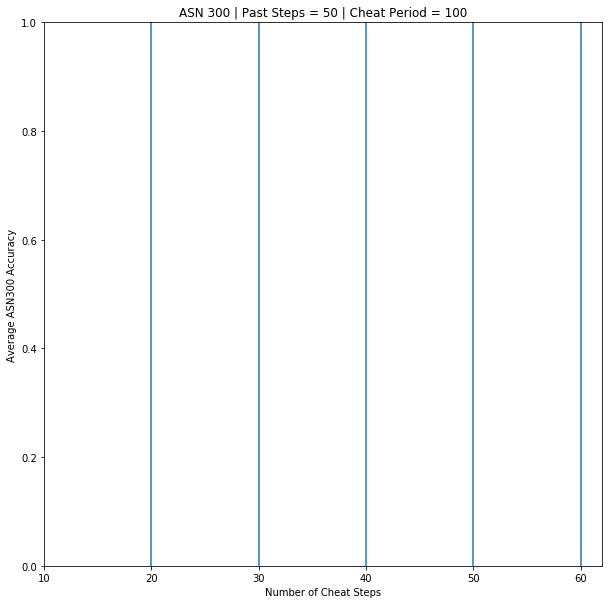

In [96]:
#Plot accuracy vs number of cheat steps
meanAcc=[]
stdAcc=[]
for i in range(len(cheatSteps)):
    meanAcc.append(np.mean(accuracy['ASN300'][i]))
    stdAcc.append(np.std(accuracy['ASN300'][i]))
# plt.plot(meanAcc,'-o')
plt.figure(figsize=(10,10))
plt.errorbar(range(len(cheatSteps)),meanAcc,stdAcc, marker='^')
plt.xticks(range(0,len(ASN300[0]['Accuracy']['Mackey Glass']['Cheat Steps']),1),labels=ASN300[0]['Accuracy']['Mackey Glass']['Cheat Steps'])
plt.xlabel('Number of Cheat Steps')
plt.ylabel('Average ASN300 Accuracy')
plt.title('ASN 300 | Past Steps = 50 | Cheat Period = 100')
# plt.yscale('log')
plt.ylim([0, 1])

In [97]:
stdAcc

[nan,
 5.948035707248363e+134,
 1.2021104961402993e+137,
 1.3623187769349467e+80,
 12421992527.91919,
 224375776616495.53]

In [ ]:
#Current and Communicability Matrices:
commuMatASN_MG=[[None]*len(mse300_cheat) for i in range(len(mse300_cheat[0]))]
currMatASN_MG=[None]*len(mse300_cheat) for i in range(len(mse300_cheat[0]))]
for i in tqdm(range(len(mse300_cheat))): # for each cheat step
    for j in range(len(mse300_cheat[i])): # for each network
    commuMatASN_MG[j][i],currMatASN_MG[j][i]=commCurr(mse300_cheat[i][j])

## C. Elegans

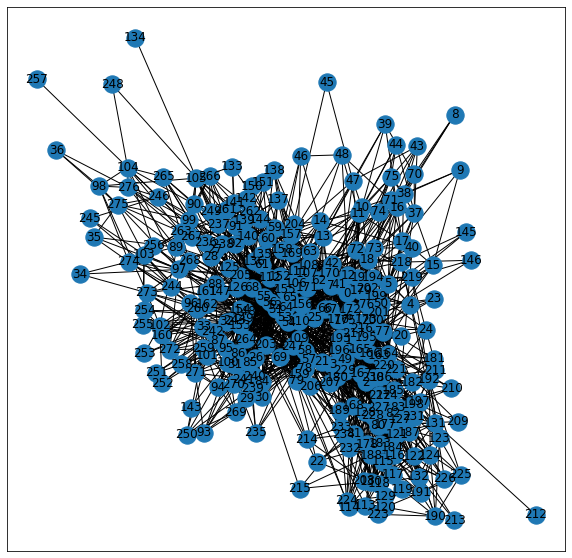

In [98]:
plt.figure(figsize=(10,10))
nx.draw_networkx(elegansGraph)

In [99]:
help(runForecastNew)

Help on function runForecastNew in module __main__:

runForecastNew(connectivity, multi=1, shift=0, training_ratio=0.3, past_steps=50, cheat_period=100, cheat_steps=60, save_fig=False, disable_tqdm=False, inList=0, outList=0)



In [100]:
mseElegans=[]
cheat_steps=[]
#loop through cheat steps + see how accuracy changes
for i in cheatSteps:
    print('Cheat steps = ' + str(i))
    mseElegans.append(runForecastNew(connectivity__(graph=elegansGraph), multi = 1, shift = 0, 
                    training_ratio = 0.3, past_steps = 50,
                    cheat_period = 100, cheat_steps = i,
                    save_fig = False,
                    disable_tqdm = False, inList=8, outList=245))
    cheat_steps.append(i)
#change tau parameter for chaos

Cheat steps = 10


2020-03-27 16:23:45,470:INFO:RNMSE = 2.3837580552036576e+42



Cheat steps = 20


2020-03-27 16:23:56,194:INFO:RNMSE = 0.09175322019838542



Cheat steps = 30


2020-03-27 16:24:07,008:INFO:RNMSE = 0.06791955028202154



Cheat steps = 40


2020-03-27 16:24:17,657:INFO:RNMSE = 0.051868225369026376



Cheat steps = 50


2020-03-27 16:24:28,414:INFO:RNMSE = 0.043882723216169046



Cheat steps = 60


2020-03-27 16:24:39,033:INFO:RNMSE = 0.028887843070375986


In [101]:
Elegans['Accuracy']['Mackey Glass']['Cheat Steps']=[]
Elegans['Accuracy']['Mackey Glass']['Accuracy Value']=[]
accuracy['Elegans']=[]
Elegans_MG_accuracy=[[None]*len(Elegans) for i in range(len(cheatSteps))]

for i in range(len(mseElegans)):
    accuracy['Elegans']=1-mseElegans[i]
    Elegans['Accuracy']['Mackey Glass']['Cheat Steps'].append(cheat_steps[i])
    Elegans['Accuracy']['Mackey Glass']['Accuracy Value'].append(accuracy['Elegans'])
    temp=Elegans['Accuracy']['Mackey Glass']['Accuracy Value'][i]
    if temp < 0:
        temp=0
    Elegans_MG_accuracy[i]=temp

In [102]:
Elegans['Accuracy']['Mackey Glass']

{'Cheat Steps': [10, 20, 30, 40, 50, 60],
 'Accuracy Value': [-2.3837580552036576e+42,
  0.9082467798016146,
  0.9320804497179784,
  0.9481317746309736,
  0.956117276783831,
  0.971112156929624]}

Text(0.5, 1.0, 'C Elegans | Past Steps = 50 | Cheat Period = 100')

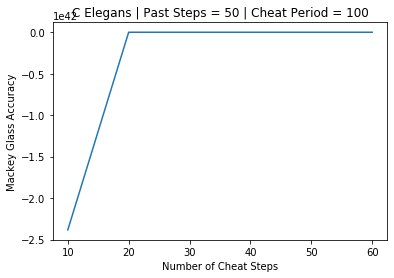

In [103]:
#Plot accuracy vs number of cheat steps
plt.plot(Elegans['Accuracy']['Mackey Glass']['Accuracy Value'])
plt.xticks(range(0,len(Elegans['Accuracy']['Mackey Glass']['Cheat Steps']),1),labels=Elegans['Accuracy']['Mackey Glass']['Cheat Steps'])
plt.xlabel('Number of Cheat Steps')
plt.ylabel('Mackey Glass Accuracy')
plt.title('C Elegans | Past Steps = 50 | Cheat Period = 100')

## Watts-Strogatz
### Grid & Random

In [104]:
ws300[10][1].number_of_nodes()

300

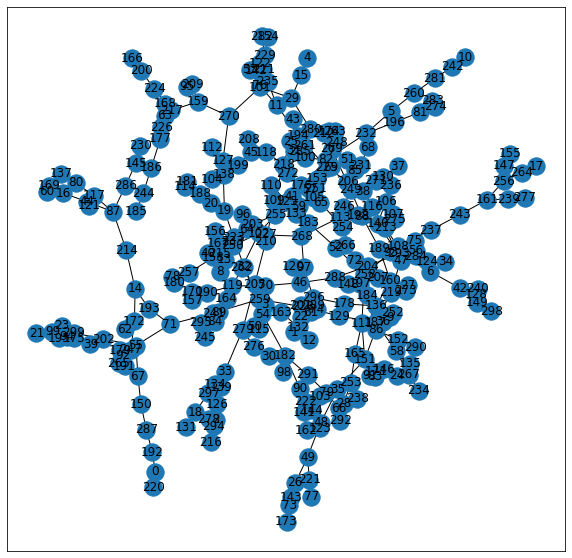

In [105]:
plt.figure(figsize=(10,10))
nx.draw_networkx(ws300[10][1])

In [106]:
cheatSteps=range(10,61,10)
mse300_WS_Grid_cheat=[[None]*len(ws300) for i in range(len(cheatSteps))]
numNodes=len(ws300[0][0])
for i in range(len(ws300)): #number of cheat steps
    adjmat=np.asarray(nx.adjacency_matrix(ws300[i][0]).todense())
    electrodes=edamame.core.getFarthestPairing(adjmat)
    for j in range(len(cheatSteps)): #number of networks
        print('Network ' + str(i))
        print('Cheat Steps ' + str(cheatSteps[j]))        
        #run forcast on network j for i cheat steps 
        mse300_WS_Grid_cheat[j][i]=runForecastNew(connectivity__(graph=ws300[i][0]), multi = 1, shift = 0, 
                        training_ratio = 0.3, past_steps = 50,
                        cheat_period = 100, cheat_steps = cheatSteps[j],
                        save_fig = False,
                        disable_tqdm = False,inList=0,outList=int(numNodes/2))

Network 0
Cheat Steps 10


2020-03-27 16:24:53,729:INFO:RNMSE = 5.582204689003073



Network 0
Cheat Steps 20


2020-03-27 16:25:07,061:INFO:RNMSE = 0.15031147913419404



Network 0
Cheat Steps 30


2020-03-27 16:25:20,762:INFO:RNMSE = 0.08866688109577367



Network 0
Cheat Steps 40


2020-03-27 16:25:34,474:INFO:RNMSE = 0.06698783413407586



Network 0
Cheat Steps 50


2020-03-27 16:25:47,817:INFO:RNMSE = 0.04872078831335123



Network 0
Cheat Steps 60


2020-03-27 16:26:01,156:INFO:RNMSE = 0.03571715822553544



Network 1
Cheat Steps 10


2020-03-27 16:26:13,811:INFO:RNMSE = 0.14787885266004783



Network 1
Cheat Steps 20


2020-03-27 16:26:26,466:INFO:RNMSE = 0.12256398364369914


Network 1
Cheat Steps 30


2020-03-27 16:26:38,993:INFO:RNMSE = 0.10268540322818134



Network 1
Cheat Steps 40


2020-03-27 16:26:51,728:INFO:RNMSE = 0.08513661305404116



Network 1
Cheat Steps 50


2020-03-27 16:27:04,266:INFO:RNMSE = 0.06886684605848559



Network 1
Cheat Steps 60


2020-03-27 16:27:16,904:INFO:RNMSE = 0.05285280341931052


Network 2
Cheat Steps 10


2020-03-27 16:27:29,301:INFO:RNMSE = 0.1698786051944308



Network 2
Cheat Steps 20


2020-03-27 16:27:41,290:INFO:RNMSE = 0.15666547297566635



Network 2
Cheat Steps 30


2020-03-27 16:27:53,176:INFO:RNMSE = 0.13065925198385847



Network 2
Cheat Steps 40


2020-03-27 16:28:05,065:INFO:RNMSE = 0.11280094568434886



Network 2
Cheat Steps 50


2020-03-27 16:28:16,913:INFO:RNMSE = 0.09485802774694355



Network 2
Cheat Steps 60


2020-03-27 16:28:28,777:INFO:RNMSE = 0.07730266475450251



Network 3
Cheat Steps 10


2020-03-27 16:28:40,578:INFO:RNMSE = 2453030169717942.0



Network 3
Cheat Steps 20


2020-03-27 16:28:52,268:INFO:RNMSE = 1.0716573775050386



Network 3
Cheat Steps 30


2020-03-27 16:29:03,890:INFO:RNMSE = 0.16007680774941307



Network 3
Cheat Steps 40


2020-03-27 16:29:15,530:INFO:RNMSE = 0.09722613884402219



Network 3
Cheat Steps 50


2020-03-27 16:29:27,383:INFO:RNMSE = 0.06618763591563609



Network 3
Cheat Steps 60


2020-03-27 16:29:38,983:INFO:RNMSE = 0.056062855769911824



Network 4
Cheat Steps 10


2020-03-27 16:29:50,677:INFO:RNMSE = 2453030169717942.0



Network 4
Cheat Steps 20


2020-03-27 16:30:02,278:INFO:RNMSE = 1.0716573775050386



Network 4
Cheat Steps 30


2020-03-27 16:30:13,938:INFO:RNMSE = 0.16007680774941307



Network 4
Cheat Steps 40


2020-03-27 16:30:25,567:INFO:RNMSE = 0.09722613884402219



Network 4
Cheat Steps 50


2020-03-27 16:30:37,178:INFO:RNMSE = 0.06618763591563609



Network 4
Cheat Steps 60


2020-03-27 16:30:48,990:INFO:RNMSE = 0.056062855769911824



Network 5
Cheat Steps 10


2020-03-27 16:31:00,506:INFO:RNMSE = 9.925187607827127e+91



Network 5
Cheat Steps 20


2020-03-27 16:31:11,968:INFO:RNMSE = 4.974343097869751e+19



Network 5
Cheat Steps 30


2020-03-27 16:31:23,432:INFO:RNMSE = 1.3020925504615312e+53



Network 5
Cheat Steps 40


2020-03-27 16:31:34,894:INFO:RNMSE = 1664439.4564406173



Network 5
Cheat Steps 50


2020-03-27 16:31:46,317:INFO:RNMSE = 0.92932325752921



Network 5
Cheat Steps 60


2020-03-27 16:31:57,750:INFO:RNMSE = 3.531055079099358



Network 6
Cheat Steps 10


2020-03-27 16:32:09,274:INFO:RNMSE = 9.925187607827127e+91



Network 6
Cheat Steps 20


2020-03-27 16:32:20,818:INFO:RNMSE = 4.974343097869751e+19



Network 6
Cheat Steps 30


2020-03-27 16:32:32,286:INFO:RNMSE = 1.3020925504615312e+53



Network 6
Cheat Steps 40


2020-03-27 16:32:43,973:INFO:RNMSE = 1664439.4564406173



Network 6
Cheat Steps 50


2020-03-27 16:32:55,501:INFO:RNMSE = 0.92932325752921



Network 6
Cheat Steps 60


2020-03-27 16:33:06,925:INFO:RNMSE = 3.531055079099358



Network 7
Cheat Steps 10


2020-03-27 16:33:18,429:INFO:RNMSE = 9.925187607827127e+91



Network 7
Cheat Steps 20


2020-03-27 16:33:29,940:INFO:RNMSE = 4.974343097869751e+19



Network 7
Cheat Steps 30


2020-03-27 16:33:41,402:INFO:RNMSE = 1.3020925504615312e+53



Network 7
Cheat Steps 40


2020-03-27 16:33:52,879:INFO:RNMSE = 1664439.4564406173



Network 7
Cheat Steps 50


2020-03-27 16:34:04,335:INFO:RNMSE = 0.92932325752921



Network 7
Cheat Steps 60


2020-03-27 16:34:15,815:INFO:RNMSE = 3.531055079099358



Network 8
Cheat Steps 10


2020-03-27 16:34:27,359:INFO:RNMSE = 9.925187607827127e+91



Network 8
Cheat Steps 20


2020-03-27 16:34:38,829:INFO:RNMSE = 4.974343097869751e+19



Network 8
Cheat Steps 30


2020-03-27 16:34:50,570:INFO:RNMSE = 1.3020925504615312e+53



Network 8
Cheat Steps 40


2020-03-27 16:35:02,029:INFO:RNMSE = 1664439.4564406173



Network 8
Cheat Steps 50


2020-03-27 16:35:13,468:INFO:RNMSE = 0.92932325752921



Network 8
Cheat Steps 60


2020-03-27 16:35:24,917:INFO:RNMSE = 3.531055079099358



Network 9
Cheat Steps 10


2020-03-27 16:35:36,458:INFO:RNMSE = 9.925187607827127e+91



Network 9
Cheat Steps 20


2020-03-27 16:35:47,911:INFO:RNMSE = 4.974343097869751e+19



Network 9
Cheat Steps 30


2020-03-27 16:35:59,374:INFO:RNMSE = 1.3020925504615312e+53



Network 9
Cheat Steps 40


2020-03-27 16:36:10,844:INFO:RNMSE = 1664439.4564406173



Network 9
Cheat Steps 50


2020-03-27 16:36:22,326:INFO:RNMSE = 0.92932325752921



Network 9
Cheat Steps 60


2020-03-27 16:36:34,174:INFO:RNMSE = 3.531055079099358



Network 10
Cheat Steps 10


2020-03-27 16:36:45,891:INFO:RNMSE = 9.925187607827127e+91



Network 10
Cheat Steps 20


2020-03-27 16:36:57,388:INFO:RNMSE = 4.974343097869751e+19



Network 10
Cheat Steps 30


2020-03-27 16:37:08,879:INFO:RNMSE = 1.3020925504615312e+53



Network 10
Cheat Steps 40


2020-03-27 16:37:20,427:INFO:RNMSE = 1664439.4564406173



Network 10
Cheat Steps 50


2020-03-27 16:37:31,935:INFO:RNMSE = 0.92932325752921



Network 10
Cheat Steps 60


2020-03-27 16:37:43,466:INFO:RNMSE = 3.531055079099358



Network 11
Cheat Steps 10


2020-03-27 16:37:55,004:INFO:RNMSE = 9.925187607827127e+91



Network 11
Cheat Steps 20


2020-03-27 16:38:06,523:INFO:RNMSE = 4.974343097869751e+19



Network 11
Cheat Steps 30


2020-03-27 16:38:18,005:INFO:RNMSE = 1.3020925504615312e+53



Network 11
Cheat Steps 40


2020-03-27 16:38:29,595:INFO:RNMSE = 1664439.4564406173



Network 11
Cheat Steps 50


2020-03-27 16:38:41,151:INFO:RNMSE = 0.92932325752921



Network 11
Cheat Steps 60


2020-03-27 16:38:52,749:INFO:RNMSE = 3.531055079099358



Network 12
Cheat Steps 10


2020-03-27 16:39:04,299:INFO:RNMSE = 9.925187607827127e+91



Network 12
Cheat Steps 20


2020-03-27 16:39:15,781:INFO:RNMSE = 4.974343097869751e+19



Network 12
Cheat Steps 30


2020-03-27 16:39:27,339:INFO:RNMSE = 1.3020925504615312e+53



Network 12
Cheat Steps 40


2020-03-27 16:39:38,918:INFO:RNMSE = 1664439.4564406173



Network 12
Cheat Steps 50


2020-03-27 16:39:50,407:INFO:RNMSE = 0.92932325752921



Network 12
Cheat Steps 60


2020-03-27 16:40:01,866:INFO:RNMSE = 3.531055079099358



Network 13
Cheat Steps 10


2020-03-27 16:40:13,432:INFO:RNMSE = 9.925187607827127e+91



Network 13
Cheat Steps 20


2020-03-27 16:40:24,911:INFO:RNMSE = 4.974343097869751e+19



Network 13
Cheat Steps 30


2020-03-27 16:40:36,455:INFO:RNMSE = 1.3020925504615312e+53



Network 13
Cheat Steps 40


2020-03-27 16:40:48,129:INFO:RNMSE = 1664439.4564406173



Network 13
Cheat Steps 50


2020-03-27 16:40:59,651:INFO:RNMSE = 0.92932325752921



Network 13
Cheat Steps 60


2020-03-27 16:41:11,123:INFO:RNMSE = 3.531055079099358



Network 14
Cheat Steps 10


2020-03-27 16:41:22,647:INFO:RNMSE = 9.925187607827127e+91



Network 14
Cheat Steps 20


2020-03-27 16:41:34,156:INFO:RNMSE = 4.974343097869751e+19



Network 14
Cheat Steps 30


2020-03-27 16:41:45,637:INFO:RNMSE = 1.3020925504615312e+53



Network 14
Cheat Steps 40


2020-03-27 16:41:57,117:INFO:RNMSE = 1664439.4564406173



Network 14
Cheat Steps 50


2020-03-27 16:42:08,560:INFO:RNMSE = 0.92932325752921



Network 14
Cheat Steps 60


2020-03-27 16:42:20,167:INFO:RNMSE = 3.531055079099358



Network 15
Cheat Steps 10


2020-03-27 16:42:31,735:INFO:RNMSE = 9.925187607827127e+91



Network 15
Cheat Steps 20


2020-03-27 16:42:43,338:INFO:RNMSE = 4.974343097869751e+19



Network 15
Cheat Steps 30


2020-03-27 16:42:54,700:INFO:RNMSE = 1.3020925504615312e+53



Network 15
Cheat Steps 40


2020-03-27 16:43:05,972:INFO:RNMSE = 1664439.4564406173



Network 15
Cheat Steps 50


2020-03-27 16:43:18,126:INFO:RNMSE = 0.92932325752921



Network 15
Cheat Steps 60


2020-03-27 16:43:31,102:INFO:RNMSE = 3.531055079099358



Network 16
Cheat Steps 10


2020-03-27 16:43:43,649:INFO:RNMSE = 9.925187607827127e+91



Network 16
Cheat Steps 20


2020-03-27 16:43:55,002:INFO:RNMSE = 4.974343097869751e+19



Network 16
Cheat Steps 30


2020-03-27 16:44:06,352:INFO:RNMSE = 1.3020925504615312e+53



Network 16
Cheat Steps 40


2020-03-27 16:44:18,200:INFO:RNMSE = 1664439.4564406173



Network 16
Cheat Steps 50


2020-03-27 16:44:30,690:INFO:RNMSE = 0.92932325752921



Network 16
Cheat Steps 60


2020-03-27 16:44:42,531:INFO:RNMSE = 3.531055079099358



Network 17
Cheat Steps 10


2020-03-27 16:44:53,994:INFO:RNMSE = 9.925187607827127e+91



Network 17
Cheat Steps 20


2020-03-27 16:45:05,393:INFO:RNMSE = 4.974343097869751e+19



Network 17
Cheat Steps 30


2020-03-27 16:45:16,705:INFO:RNMSE = 1.3020925504615312e+53



Network 17
Cheat Steps 40


2020-03-27 16:45:28,009:INFO:RNMSE = 1664439.4564406173



Network 17
Cheat Steps 50


2020-03-27 16:45:39,317:INFO:RNMSE = 0.92932325752921



Network 17
Cheat Steps 60


2020-03-27 16:45:50,593:INFO:RNMSE = 3.531055079099358



Network 18
Cheat Steps 10


2020-03-27 16:46:02,141:INFO:RNMSE = 2453030169717942.0



Network 18
Cheat Steps 20


2020-03-27 16:46:13,603:INFO:RNMSE = 1.0716573775050386



Network 18
Cheat Steps 30


2020-03-27 16:46:24,924:INFO:RNMSE = 0.16007680774941307



Network 18
Cheat Steps 40


2020-03-27 16:46:44,496:INFO:RNMSE = 0.09722613884402219



Network 18
Cheat Steps 50


2020-03-27 16:47:03,926:INFO:RNMSE = 0.06618763591563609



Network 18
Cheat Steps 60


2020-03-27 16:47:23,287:INFO:RNMSE = 0.056062855769911824



Network 19
Cheat Steps 10


2020-03-27 16:47:42,780:INFO:RNMSE = 2453030169717942.0



Network 19
Cheat Steps 20


2020-03-27 16:48:02,127:INFO:RNMSE = 1.0716573775050386



Network 19
Cheat Steps 30


2020-03-27 16:48:21,645:INFO:RNMSE = 0.16007680774941307



Network 19
Cheat Steps 40


2020-03-27 16:48:41,110:INFO:RNMSE = 0.09722613884402219



Network 19
Cheat Steps 50


2020-03-27 16:49:00,583:INFO:RNMSE = 0.06618763591563609



Network 19
Cheat Steps 60


2020-03-27 16:49:19,931:INFO:RNMSE = 0.056062855769911824



Network 20
Cheat Steps 10


2020-03-27 16:49:39,597:INFO:RNMSE = 0.15741279581206225



Network 20
Cheat Steps 20


2020-03-27 16:50:00,472:INFO:RNMSE = 0.1333004430202807



Network 20
Cheat Steps 30


2020-03-27 16:50:21,107:INFO:RNMSE = 0.12016430695618531



Network 20
Cheat Steps 40


2020-03-27 16:50:39,931:INFO:RNMSE = 0.09660508735242654



Network 20
Cheat Steps 50


2020-03-27 16:50:59,115:INFO:RNMSE = 0.08564255892042542



Network 20
Cheat Steps 60


2020-03-27 16:51:18,021:INFO:RNMSE = 0.0718716470657113



Network 21
Cheat Steps 10


2020-03-27 16:51:36,977:INFO:RNMSE = 0.1698786051944308



Network 21
Cheat Steps 20


2020-03-27 16:51:55,833:INFO:RNMSE = 0.15666547297566635



Network 21
Cheat Steps 30


2020-03-27 16:52:15,057:INFO:RNMSE = 0.13065925198385847



Network 21
Cheat Steps 40


2020-03-27 16:52:33,802:INFO:RNMSE = 0.11280094568434886



Network 21
Cheat Steps 50


2020-03-27 16:52:52,640:INFO:RNMSE = 0.09485802774694355



Network 21
Cheat Steps 60


2020-03-27 16:53:11,234:INFO:RNMSE = 0.07730266475450251



Network 22
Cheat Steps 10


2020-03-27 16:53:30,076:INFO:RNMSE = 0.1622696128423296



Network 22
Cheat Steps 20


2020-03-27 16:53:48,885:INFO:RNMSE = 0.14548249524558882



Network 22
Cheat Steps 30


2020-03-27 16:54:07,936:INFO:RNMSE = 0.12783876491730453



Network 22
Cheat Steps 40


2020-03-27 16:54:26,734:INFO:RNMSE = 0.1097565527705149



Network 22
Cheat Steps 50


2020-03-27 16:54:45,745:INFO:RNMSE = 0.09151300695745077



Network 22
Cheat Steps 60


2020-03-27 16:55:04,709:INFO:RNMSE = 0.0732196618981153



Network 23
Cheat Steps 10


2020-03-27 16:55:23,917:INFO:RNMSE = 0.15848450766582792



Network 23
Cheat Steps 20


2020-03-27 16:55:42,966:INFO:RNMSE = 0.14195187544620144



Network 23
Cheat Steps 30


2020-03-27 16:56:02,701:INFO:RNMSE = 0.12595786923851185



Network 23
Cheat Steps 40


2020-03-27 16:56:21,887:INFO:RNMSE = 0.10783710109254596



Network 23
Cheat Steps 50


2020-03-27 16:56:43,582:INFO:RNMSE = 0.09107151423468515



Network 23
Cheat Steps 60


2020-03-27 16:57:04,658:INFO:RNMSE = 0.07278665061695747


In [107]:
# mseRandom300=[None]*len(ws300)
cheatSteps=range(10,61,10)
mse300_WS_Random_cheat=[[None]*len(ws300) for i in range(len(cheatSteps))]

for i in range(len(ws300)): #number of cheat steps
    adjmat=np.asarray(nx.adjacency_matrix(ws300[i][1]).todense())
    electrodes=edamame.core.getFarthestPairing(adjmat)
    for j in range(len(cheatSteps)): #number of networks
        print('Network ' + str(i+1))
        print('Cheat Steps ' + str(cheatSteps[j]))        
        #run forcast on network j for i cheat steps 
        mse300_WS_Random_cheat[j][i]=runForecastNew(connectivity__(graph=ws300[i][1]), multi = 1, shift = 0, 
                        training_ratio = 0.3, past_steps = 50,
                        cheat_period = 100, cheat_steps = cheatSteps[j],
                        save_fig = False,
                        disable_tqdm = False, inList=electrodes[0],outList=electrodes[1])

# #     numNodes=ws300[i][1].number_of_nodes()
#     mseRandom300[i]=runForecastNew(connectivity__(graph=ws300[i][0]), multi = 1, shift = 0, 
#                 training_ratio = 0.3, past_steps = 50,
#                 cheat_period = 100, cheat_steps = 60,
#                 save_fig = False,
#                 disable_tqdm = False,inList=electrodes[0],outList=electrodes[1])

   

Network 1
Cheat Steps 10


2020-03-27 16:57:26,019:INFO:RNMSE = 6.686307178983385e+34



Network 1
Cheat Steps 20


2020-03-27 16:57:46,303:INFO:RNMSE = 0.14804152486555602



Network 1
Cheat Steps 30


2020-03-27 16:57:59,226:INFO:RNMSE = 1.5511211665012563



Network 1
Cheat Steps 40


2020-03-27 16:58:19,493:INFO:RNMSE = 0.12060907839959968



Network 1
Cheat Steps 50


2020-03-27 16:58:39,785:INFO:RNMSE = 0.04538873636745727



Network 1
Cheat Steps 60


2020-03-27 16:59:00,344:INFO:RNMSE = 0.030996417226267704



Network 2
Cheat Steps 10


2020-03-27 16:59:19,708:INFO:RNMSE = 10696287512.477455



Network 2
Cheat Steps 20


2020-03-27 16:59:38,965:INFO:RNMSE = 0.1345793716393711



Network 2
Cheat Steps 30


2020-03-27 16:59:58,236:INFO:RNMSE = 0.08710050316643997



Network 2
Cheat Steps 40


2020-03-27 17:00:17,505:INFO:RNMSE = 0.07028330505980701



Network 2
Cheat Steps 50


2020-03-27 17:00:30,856:INFO:RNMSE = 0.054358244218386184



Network 2
Cheat Steps 60


2020-03-27 17:00:48,056:INFO:RNMSE = 0.039221278236715465



Network 3
Cheat Steps 10


2020-03-27 17:01:00,991:INFO:RNMSE = 7.907876633514234e+28



Network 3
Cheat Steps 20


2020-03-27 17:01:19,820:INFO:RNMSE = 0.11829616679957855



Network 3
Cheat Steps 30


2020-03-27 17:01:38,636:INFO:RNMSE = 0.0809909518522907



Network 3
Cheat Steps 40


2020-03-27 17:01:57,382:INFO:RNMSE = 0.06527557140323723



Network 3
Cheat Steps 50


2020-03-27 17:02:16,114:INFO:RNMSE = 0.05027307878797884



Network 3
Cheat Steps 60


2020-03-27 17:02:34,924:INFO:RNMSE = 0.036177830538670776



Network 4
Cheat Steps 10


2020-03-27 17:02:47,687:INFO:RNMSE = 0.18704270256336686



Network 4
Cheat Steps 20


2020-03-27 17:03:03,720:INFO:RNMSE = 0.13438270639875297



Network 4
Cheat Steps 30


2020-03-27 17:03:19,724:INFO:RNMSE = 0.10910211502179408



Network 4
Cheat Steps 40


2020-03-27 17:03:35,780:INFO:RNMSE = 0.08676254276725892



Network 4
Cheat Steps 50


2020-03-27 17:03:51,797:INFO:RNMSE = 0.06807070615739795



Network 4
Cheat Steps 60


2020-03-27 17:04:07,809:INFO:RNMSE = 0.05149952982976675



Network 5
Cheat Steps 10


2020-03-27 17:04:24,082:INFO:RNMSE = 0.18704270256336686



Network 5
Cheat Steps 20


2020-03-27 17:04:36,694:INFO:RNMSE = 0.13438270639875297



Network 5
Cheat Steps 30


2020-03-27 17:04:53,134:INFO:RNMSE = 0.10910211502179408



Network 5
Cheat Steps 40


2020-03-27 17:05:05,689:INFO:RNMSE = 0.08676254276725892



Network 5
Cheat Steps 50


2020-03-27 17:05:21,883:INFO:RNMSE = 0.06807070615739795



Network 5
Cheat Steps 60


2020-03-27 17:05:34,446:INFO:RNMSE = 0.05149952982976675



Network 6
Cheat Steps 10


2020-03-27 17:05:50,594:INFO:RNMSE = 8.007709091460002e+31



Network 6
Cheat Steps 20


2020-03-27 17:06:02,933:INFO:RNMSE = 0.15178786650989062



Network 6
Cheat Steps 30


2020-03-27 17:06:18,944:INFO:RNMSE = 0.07818245252975364



Network 6
Cheat Steps 40


2020-03-27 17:06:31,294:INFO:RNMSE = 0.21752965822508677



Network 6
Cheat Steps 50


2020-03-27 17:06:47,497:INFO:RNMSE = 0.06996137824666497



Network 6
Cheat Steps 60


2020-03-27 17:06:59,848:INFO:RNMSE = 0.05223228125830127



Network 7
Cheat Steps 10


2020-03-27 17:07:15,908:INFO:RNMSE = 8.007709091460002e+31



Network 7
Cheat Steps 20


2020-03-27 17:07:28,236:INFO:RNMSE = 0.15178786650989062



Network 7
Cheat Steps 30


2020-03-27 17:07:44,250:INFO:RNMSE = 0.07818245252975364



Network 7
Cheat Steps 40


2020-03-27 17:07:56,614:INFO:RNMSE = 0.21752965822508677



Network 7
Cheat Steps 50


2020-03-27 17:08:12,611:INFO:RNMSE = 0.06996137824666497



Network 7
Cheat Steps 60


2020-03-27 17:08:24,964:INFO:RNMSE = 0.05223228125830127



Network 8
Cheat Steps 10


2020-03-27 17:08:41,205:INFO:RNMSE = 8.007709091460002e+31



Network 8
Cheat Steps 20


2020-03-27 17:08:53,640:INFO:RNMSE = 0.15178786650989062



Network 8
Cheat Steps 30


2020-03-27 17:09:09,607:INFO:RNMSE = 0.07818245252975364



Network 8
Cheat Steps 40


2020-03-27 17:09:21,962:INFO:RNMSE = 0.21752965822508677



Network 8
Cheat Steps 50


2020-03-27 17:09:37,969:INFO:RNMSE = 0.06996137824666497



Network 8
Cheat Steps 60


2020-03-27 17:09:50,303:INFO:RNMSE = 0.05223228125830127



Network 9
Cheat Steps 10


2020-03-27 17:10:06,383:INFO:RNMSE = 8.007709091460002e+31



Network 9
Cheat Steps 20


2020-03-27 17:10:18,712:INFO:RNMSE = 0.15178786650989062



Network 9
Cheat Steps 30


2020-03-27 17:10:31,093:INFO:RNMSE = 0.07818245252975364



Network 9
Cheat Steps 40


2020-03-27 17:10:43,624:INFO:RNMSE = 0.21752965822508677



Network 9
Cheat Steps 50


2020-03-27 17:10:56,101:INFO:RNMSE = 0.06996137824666497



Network 9
Cheat Steps 60


2020-03-27 17:11:08,538:INFO:RNMSE = 0.05223228125830127



Network 10
Cheat Steps 10


2020-03-27 17:11:21,010:INFO:RNMSE = 8.007709091460002e+31



Network 10
Cheat Steps 20


2020-03-27 17:11:33,359:INFO:RNMSE = 0.15178786650989062



Network 10
Cheat Steps 30


2020-03-27 17:11:45,741:INFO:RNMSE = 0.07818245252975364



Network 10
Cheat Steps 40


2020-03-27 17:11:58,118:INFO:RNMSE = 0.21752965822508677



Network 10
Cheat Steps 50


2020-03-27 17:12:10,564:INFO:RNMSE = 0.06996137824666497



Network 10
Cheat Steps 60


2020-03-27 17:12:22,918:INFO:RNMSE = 0.05223228125830127



Network 11
Cheat Steps 10


2020-03-27 17:12:35,356:INFO:RNMSE = 8.007709091460002e+31



Network 11
Cheat Steps 20


2020-03-27 17:12:47,895:INFO:RNMSE = 0.15178786650989062



Network 11
Cheat Steps 30


2020-03-27 17:13:00,265:INFO:RNMSE = 0.07818245252975364



Network 11
Cheat Steps 40


2020-03-27 17:13:12,643:INFO:RNMSE = 0.21752965822508677



Network 11
Cheat Steps 50


2020-03-27 17:13:24,997:INFO:RNMSE = 0.06996137824666497



Network 11
Cheat Steps 60


2020-03-27 17:13:37,376:INFO:RNMSE = 0.05223228125830127



Network 12
Cheat Steps 10


2020-03-27 17:13:49,825:INFO:RNMSE = 8.007709091460002e+31



Network 12
Cheat Steps 20


2020-03-27 17:14:02,188:INFO:RNMSE = 0.15178786650989062



Network 12
Cheat Steps 30


2020-03-27 17:14:14,544:INFO:RNMSE = 0.07818245252975364



Network 12
Cheat Steps 40


2020-03-27 17:14:26,909:INFO:RNMSE = 0.21752965822508677



Network 12
Cheat Steps 50


2020-03-27 17:14:48,126:INFO:RNMSE = 0.06996137824666497



Network 12
Cheat Steps 60


2020-03-27 17:15:03,975:INFO:RNMSE = 0.05223228125830127



Network 13
Cheat Steps 10


2020-03-27 17:15:24,983:INFO:RNMSE = 8.007709091460002e+31



Network 13
Cheat Steps 20


2020-03-27 17:15:40,777:INFO:RNMSE = 0.15178786650989062



Network 13
Cheat Steps 30


2020-03-27 17:16:01,663:INFO:RNMSE = 0.07818245252975364



Network 13
Cheat Steps 40


2020-03-27 17:16:22,588:INFO:RNMSE = 0.21752965822508677



Network 13
Cheat Steps 50


2020-03-27 17:16:41,322:INFO:RNMSE = 0.06996137824666497



Network 13
Cheat Steps 60


2020-03-27 17:17:00,378:INFO:RNMSE = 0.05223228125830127



Network 14
Cheat Steps 10


2020-03-27 17:17:18,959:INFO:RNMSE = 8.007709091460002e+31



Network 14
Cheat Steps 20


2020-03-27 17:17:37,525:INFO:RNMSE = 0.15178786650989062



Network 14
Cheat Steps 30


2020-03-27 17:17:56,274:INFO:RNMSE = 0.07818245252975364



Network 14
Cheat Steps 40


2020-03-27 17:18:14,847:INFO:RNMSE = 0.21752965822508677



Network 14
Cheat Steps 50


2020-03-27 17:18:33,345:INFO:RNMSE = 0.06996137824666497



Network 14
Cheat Steps 60


2020-03-27 17:18:52,168:INFO:RNMSE = 0.05223228125830127



Network 15
Cheat Steps 10


2020-03-27 17:19:10,874:INFO:RNMSE = 8.007709091460002e+31



Network 15
Cheat Steps 20


2020-03-27 17:19:29,301:INFO:RNMSE = 0.15178786650989062



Network 15
Cheat Steps 30


2020-03-27 17:19:47,851:INFO:RNMSE = 0.07818245252975364



Network 15
Cheat Steps 40


2020-03-27 17:20:06,305:INFO:RNMSE = 0.21752965822508677



Network 15
Cheat Steps 50


2020-03-27 17:20:24,808:INFO:RNMSE = 0.06996137824666497



Network 15
Cheat Steps 60


2020-03-27 17:20:35,936:INFO:RNMSE = 0.05223228125830127



Network 16
Cheat Steps 10


2020-03-27 17:20:54,918:INFO:RNMSE = 8.007709091460002e+31



Network 16
Cheat Steps 20


2020-03-27 17:21:13,691:INFO:RNMSE = 0.15178786650989062



Network 16
Cheat Steps 30


2020-03-27 17:21:34,828:INFO:RNMSE = 0.07818245252975364



Network 16
Cheat Steps 40


2020-03-27 17:21:55,275:INFO:RNMSE = 0.21752965822508677



Network 16
Cheat Steps 50


2020-03-27 17:22:14,778:INFO:RNMSE = 0.06996137824666497



Network 16
Cheat Steps 60


2020-03-27 17:22:34,494:INFO:RNMSE = 0.05223228125830127



Network 17
Cheat Steps 10


2020-03-27 17:22:54,380:INFO:RNMSE = 8.007709091460002e+31



Network 17
Cheat Steps 20


2020-03-27 17:23:13,859:INFO:RNMSE = 0.15178786650989062



Network 17
Cheat Steps 30


2020-03-27 17:23:33,400:INFO:RNMSE = 0.07818245252975364



Network 17
Cheat Steps 40


2020-03-27 17:23:52,901:INFO:RNMSE = 0.21752965822508677



Network 17
Cheat Steps 50


2020-03-27 17:24:12,361:INFO:RNMSE = 0.06996137824666497



Network 17
Cheat Steps 60


2020-03-27 17:24:31,872:INFO:RNMSE = 0.05223228125830127



Network 18
Cheat Steps 10


2020-03-27 17:24:51,724:INFO:RNMSE = 8.007709091460002e+31



Network 18
Cheat Steps 20


2020-03-27 17:25:11,152:INFO:RNMSE = 0.15178786650989062



Network 18
Cheat Steps 30


2020-03-27 17:25:30,693:INFO:RNMSE = 0.07818245252975364



Network 18
Cheat Steps 40


2020-03-27 17:25:50,183:INFO:RNMSE = 0.21752965822508677



Network 18
Cheat Steps 50


2020-03-27 17:26:09,649:INFO:RNMSE = 0.06996137824666497



Network 18
Cheat Steps 60


2020-03-27 17:26:29,137:INFO:RNMSE = 0.05223228125830127



Network 19
Cheat Steps 10


2020-03-27 17:26:49,194:INFO:RNMSE = 0.18704270256336686



Network 19
Cheat Steps 20


2020-03-27 17:27:08,864:INFO:RNMSE = 0.13438270639875297



Network 19
Cheat Steps 30


2020-03-27 17:27:28,599:INFO:RNMSE = 0.10910211502179408



Network 19
Cheat Steps 40


2020-03-27 17:27:48,339:INFO:RNMSE = 0.08676254276725892



Network 19
Cheat Steps 50


2020-03-27 17:28:08,135:INFO:RNMSE = 0.06807070615739795



Network 19
Cheat Steps 60


2020-03-27 17:28:28,009:INFO:RNMSE = 0.05149952982976675



Network 20
Cheat Steps 10


2020-03-27 17:28:48,050:INFO:RNMSE = 0.18704270256336686



Network 20
Cheat Steps 20


2020-03-27 17:29:01,127:INFO:RNMSE = 0.13438270639875297



Network 20
Cheat Steps 30


2020-03-27 17:29:18,293:INFO:RNMSE = 0.10910211502179408



Network 20
Cheat Steps 40


2020-03-27 17:29:35,474:INFO:RNMSE = 0.08676254276725892



Network 20
Cheat Steps 50


2020-03-27 17:29:52,807:INFO:RNMSE = 0.06807070615739795



Network 20
Cheat Steps 60


2020-03-27 17:30:10,132:INFO:RNMSE = 0.05149952982976675



Network 21
Cheat Steps 10


2020-03-27 17:30:23,427:INFO:RNMSE = 1.6294962185176745e+42



Network 21
Cheat Steps 20


2020-03-27 17:30:43,549:INFO:RNMSE = 0.13254291087073752



Network 21
Cheat Steps 30


2020-03-27 17:31:03,536:INFO:RNMSE = 0.07668133339372313



Network 21
Cheat Steps 40


2020-03-27 17:31:23,709:INFO:RNMSE = 0.06271576072151286



Network 21
Cheat Steps 50


2020-03-27 17:31:43,671:INFO:RNMSE = 0.04840514780380806



Network 21
Cheat Steps 60


2020-03-27 17:32:04,623:INFO:RNMSE = 0.03392218881194319



Network 22
Cheat Steps 10


2020-03-27 17:32:24,697:INFO:RNMSE = 7.907876633514234e+28



Network 22
Cheat Steps 20


2020-03-27 17:32:44,947:INFO:RNMSE = 0.11829616679957855



Network 22
Cheat Steps 30


2020-03-27 17:33:05,048:INFO:RNMSE = 0.0809909518522907



Network 22
Cheat Steps 40


2020-03-27 17:33:25,062:INFO:RNMSE = 0.06527557140323723



Network 22
Cheat Steps 50


2020-03-27 17:33:45,073:INFO:RNMSE = 0.05027307878797884



Network 22
Cheat Steps 60


2020-03-27 17:34:05,081:INFO:RNMSE = 0.036177830538670776



Network 23
Cheat Steps 10


2020-03-27 17:34:25,310:INFO:RNMSE = 5.670064158723218e+16



Network 23
Cheat Steps 20


2020-03-27 17:34:45,672:INFO:RNMSE = 0.1377820307595058



Network 23
Cheat Steps 30


2020-03-27 17:35:05,904:INFO:RNMSE = 0.08801986255845524



Network 23
Cheat Steps 40


2020-03-27 17:35:26,092:INFO:RNMSE = 0.07067233124913401



Network 23
Cheat Steps 50


2020-03-27 17:35:46,330:INFO:RNMSE = 0.0544470470870482



Network 23
Cheat Steps 60


2020-03-27 17:36:06,502:INFO:RNMSE = 0.039477049813988904



Network 24
Cheat Steps 10


2020-03-27 17:36:26,894:INFO:RNMSE = 21054481.445393518



Network 24
Cheat Steps 20


2020-03-27 17:36:47,436:INFO:RNMSE = 0.13948008461370112



Network 24
Cheat Steps 30


2020-03-27 17:37:07,852:INFO:RNMSE = 0.08852145615531332



Network 24
Cheat Steps 40


2020-03-27 17:37:28,143:INFO:RNMSE = 0.07142574044264623



Network 24
Cheat Steps 50


2020-03-27 17:37:48,442:INFO:RNMSE = 0.05534061764275028



Network 24
Cheat Steps 60


2020-03-27 17:38:08,751:INFO:RNMSE = 0.040152730367519616


In [108]:
accuracy['WS Random 300']=[[None]*len(ws300) for i in range(len(cheatSteps))]
for i in range(len(cheatSteps)):
    for j in range(len(ws300)):
        if i==0:
            WS_Random[j]['Accuracy']['Mackey Glass']={'Cheat Steps':[],'Accuracy Value':[]}
        print(str(cheatSteps[i]))
        WS_Random[j]['Accuracy']['Mackey Glass']['Cheat Steps'].append(cheatSteps[i])
        accuracy['WS Random 300'][i][j]=1-mse300_WS_Random_cheat[i][j]
        WS_Random[j]['Accuracy']['Mackey Glass']['Accuracy Value'].append(1-mse300_WS_Random_cheat[i][j])

accuracy['WS Grid 300']=[[None]*len(ws300) for i in range(len(cheatSteps))]
for i in range(len(cheatSteps)):
    for j in range(len(ws300)):
        if i==0:
            WS_Grid[j]['Accuracy']['Mackey Glass']={'Cheat Steps':[],'Accuracy Value':[]}
        print(str(cheatSteps[i]))
        WS_Grid[j]['Accuracy']['Mackey Glass']['Cheat Steps'].append(cheatSteps[i])
        accuracy['WS Grid 300'][i][j]=1-mse300_WS_Grid_cheat[i][j]
        WS_Grid[j]['Accuracy']['Mackey Glass']['Accuracy Value'].append(1-mse300_WS_Grid_cheat[i][j])

# for i in range(len(cheatSteps)):
#     for j in range(len(mse300_cheat[i])):
#         accuracy['ASN300'][i][j]=1-mse300_cheat[i][j] #save for analysis


#         ASN300[j]['Accuracy']['Mackey Glass']=accuracy['ASN300'][i][j] #save for plotting

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60


In [109]:
accuracy

{'ASN300': [[-6.233515583872523e+127,
   -inf,
   -inf,
   -2.5802032642056683e+62,
   -2.9622799198754446e+36,
   -1.3573949199969789e+17,
   -9.94285294867432e+16,
   -6814656574207260.0,
   -3.568204975992576e+21,
   -1.59193105106804e+16,
   -1.3573949199969789e+17,
   -12453462623.040564,
   -1.7393275926683533e+18,
   -2.229483471264946e+25,
   -9.355906827374257e+31,
   -4.728491897323128e+136,
   -267721941333200.84,
   -1.3573949199969789e+17,
   -4.723828158332748e+26,
   -3.7940656333698576e+109,
   -3.1380790794643293e+139,
   -1.3869138302867715e+140,
   -inf,
   -3.667934726691023e+147],
  [-1.4366436768285467e+101,
   -1.2538044619811996e+132,
   -8.07905420455259e+57,
   -5.93073363547502e+98,
   -79.12413691626733,
   0.8278613097476069,
   -2231086330244180.5,
   0.5517809763102326,
   -91117642836709.33,
   -7961397283.243552,
   0.8278613097476069,
   -8.774000362125111,
   0.772602353900237,
   -20.999803848445012,
   -1.441282820344245e+60,
   -1.7674042064685673e

In [110]:
# best_params_grid

In [111]:
ASN_MG_accuracy=[[None]*len(ASN300) for i in range(len(cheatSteps))]
for i in range(len(ASN300)):
    temp=[]
    for j in range(len(ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'])):
        temp=ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j]
        if temp < 0:
            temp=0
        if j == 0:
            ASN_MG_accuracy[0][i]= temp
        elif j == 1:
            ASN_MG_accuracy[1][i]= temp
        elif j == 2:
            ASN_MG_accuracy[2][i]= temp
        elif j == 3:
            ASN_MG_accuracy[3][i]= temp
        elif j == 4:
            ASN_MG_accuracy[4][i]= temp
        elif j == 5:
            ASN_MG_accuracy[5][i]= temp

In [112]:
WS_MG_Randomaccuracy=[[None]*len(WS_Random) for i in range(len(cheatSteps))]
for i in range(len(ASN300)):
    temp=[]
    for j in range(len(WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'])):
        temp=WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j]
        if temp < 0:
            temp=0
        if j == 0:
            WS_MG_Randomaccuracy[0][i]= temp
        elif j == 1:
            WS_MG_Randomaccuracy[1][i]= temp
        elif j == 2:
            WS_MG_Randomaccuracy[2][i]= temp
        elif j == 3:
            WS_MG_Randomaccuracy[3][i]= temp
        elif j == 4:
            WS_MG_Randomaccuracy[4][i]= temp
        elif j == 5:
            WS_MG_Randomaccuracy[5][i]= temp

In [113]:
WS_MG_Randomaccuracy

[[0,
  0,
  0,
  0.8129572974366331,
  0.8129572974366331,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.8129572974366331,
  0.8129572974366331,
  0,
  0,
  0,
  0],
 [0.851958475134444,
  0.8654206283606289,
  0.8817038332004214,
  0.8656172936012471,
  0.8656172936012471,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8482121334901094,
  0.8656172936012471,
  0.8656172936012471,
  0.8674570891292624,
  0.8817038332004214,
  0.8622179692404942,
  0.8605199153862989],
 [0,
  0.91289949683356,
  0.9190090481477093,
  0.8908978849782059,
  0.8908978849782059,
  0.9218175474702464,
  0.9218175474702464,
  0.9218175474702464,
  0.9218175474702464,
  0.9218175474702464,
  0.9218175474702464,
  0.9218175474702464,
  0.9218175474702464,
  0.921817547470

In [114]:
WS_MG_Gridaccuracy=[[None]*len(WS_Grid) for i in range(len(cheatSteps))]
for i in range(len(ASN300)):
    temp=[]
    for j in range(len(WS_Grid[i]['Accuracy']['Mackey Glass']['Accuracy Value'])):
        temp=WS_Grid[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j]
        if temp < 0:
            temp=0
        if j == 0:
            WS_MG_Gridaccuracy[0][i]= temp
        elif j == 1:
            WS_MG_Gridaccuracy[1][i]= temp
        elif j == 2:
            WS_MG_Gridaccuracy[2][i]= temp
        elif j == 3:
            WS_MG_Gridaccuracy[3][i]= temp
        elif j == 4:
            WS_MG_Gridaccuracy[4][i]= temp
        elif j == 5:
            WS_MG_Gridaccuracy[5][i]= temp

In [115]:
labels_MG=['10 Cheat Steps','20 Cheat Steps','30 Cheat Steps','40 Cheat Steps','50 Cheat Steps','60 Cheat Steps']

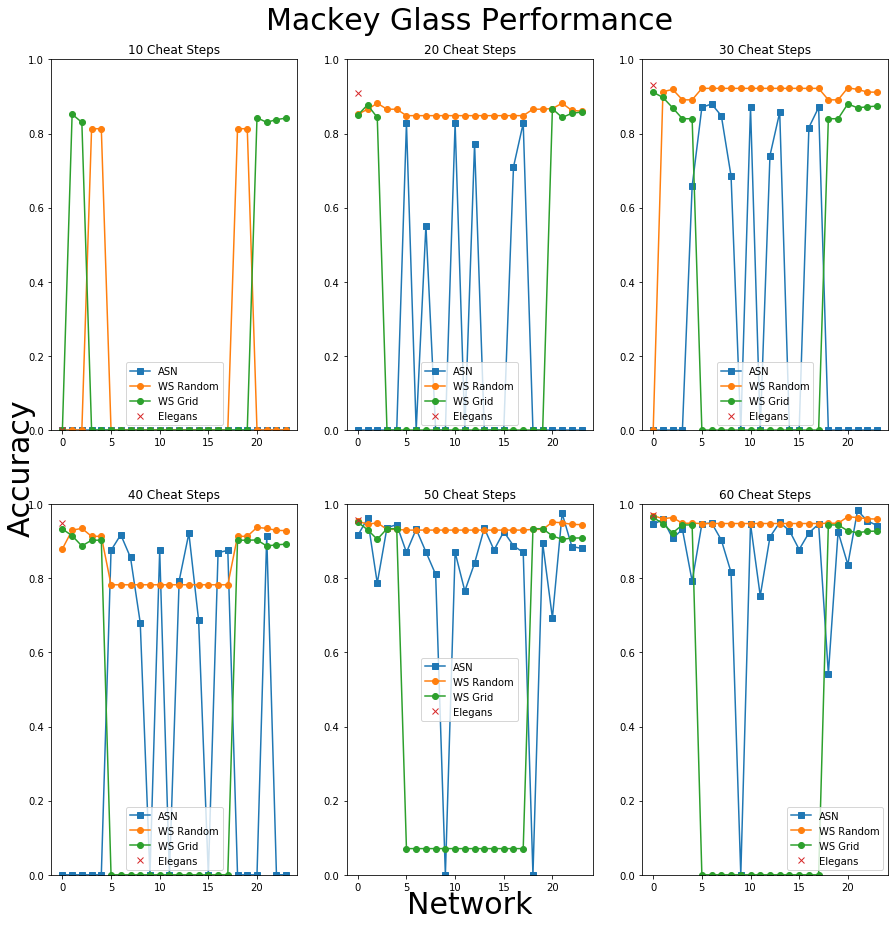

In [117]:
#network junctions switches:
fig1=plt.figure(figsize=(15,15))
ax=[None]*len(cheatSteps)
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_xticks([])
axBig.set_yticks([])
plt.xlabel('Network',fontsize=30,labelpad=15)
plt.ylabel('Accuracy',fontsize=30,labelpad=15)
plt.title('Mackey Glass Performance',fontsize=30,pad=30)
for i in range(len(ax)):
    ax[i]=fig1.add_subplot(2, 3, i+1)
    plt.plot(ASN_MG_accuracy[i],'-s',label='ASN')
    plt.plot(WS_MG_Randomaccuracy[i],'-o',label='WS Random')
    plt.plot(WS_MG_Gridaccuracy[i],'-o',label='WS Grid')
    plt.plot(Elegans_MG_accuracy[i],'x',label='Elegans')#,0,24,label='Elegans')
    plt.title(str(labels_MG[i]))
    plt.legend(loc='bottom right')
    plt.ylim(0,1)

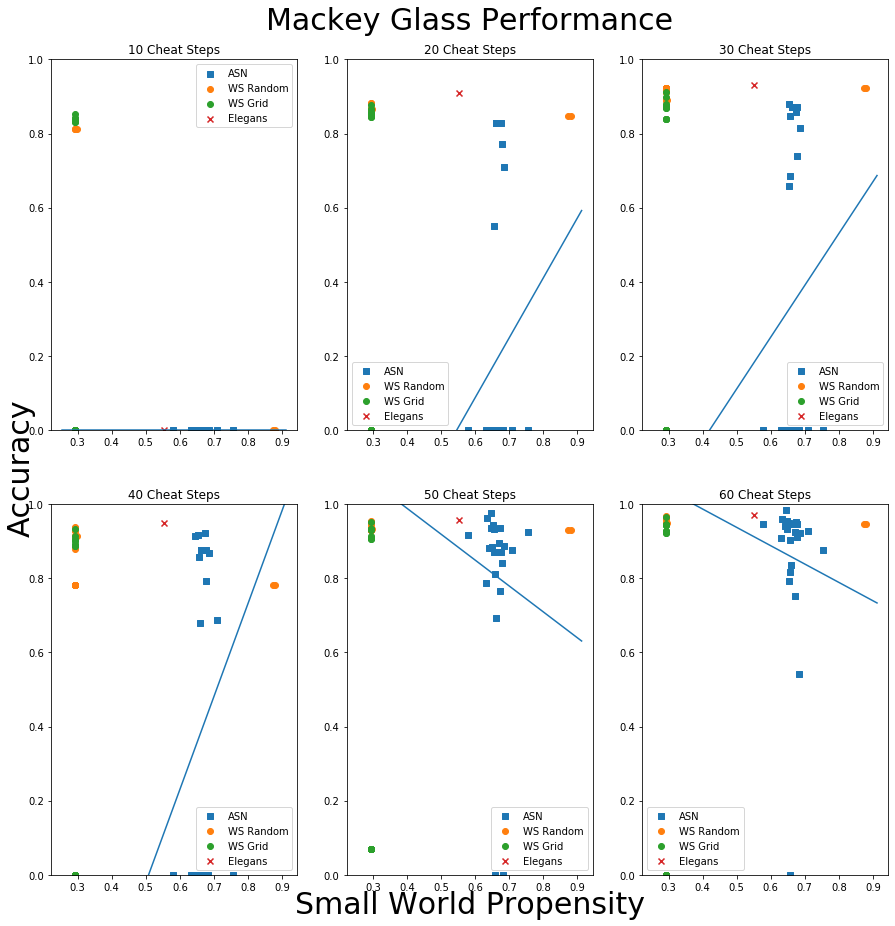

In [240]:
#MG Plot SmallWorldness:
fig1=plt.figure(figsize=(15,15))
ax=[None]*len(cheatSteps)
axBig = fig1.add_subplot(111)
axBig.set_frame_on(False)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_xticks([])
axBig.set_yticks([])
plt.xlabel('Small World Propensity',fontsize=30,labelpad=15)
plt.ylabel('Accuracy',fontsize=30,labelpad=15)
plt.title('Mackey Glass Performance',fontsize=30,pad=30)
for i in range(len(ax)):
    ax[i]=fig1.add_subplot(2, 3, i+1)
    plt.scatter(smallworld,ASN_MG_accuracy[i],label='ASN',marker='s')
    plt.scatter(smallworld_random,WS_MG_Randomaccuracy[i],label='WS Random',marker='o')
    plt.scatter(smallworld_grid,WS_MG_Gridaccuracy[i],label='WS Grid',marker='o')
    plt.scatter(Elegans['Graph Theory']['Small World'],Elegans_MG_accuracy[i],label='Elegans',marker='x')#,0,24,label='Elegans')
    plt.title(str(labels_MG[i]))
    plt.legend(loc='bottom right')
    plt.ylim(0,1)

#DOUBLE CHECK SMALL WORLDNESS 
    
#      #Add correlation line
      #  ASN300
    x=np.array(ASNsw, dtype=np.float)
    y=np.array(ASN_MG_accuracy[i], dtype=np.float)
    idx = np.isfinite(x) & np.isfinite(y)
    m, b = np.polyfit(x[idx],y[idx], 1)
    X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')
#      #WS Random
#     x=np.array(WS_Randsw, dtype=np.float)
#     y=np.array(WS_MG_Randomaccuracy[i], dtype=np.float)
#     idx = np.isfinite(x) & np.isfinite(y)
#     m, b = np.polyfit(x[idx],y[idx], 1)
#     X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '-')
    
#     x=np.array(WS_Gridsw, dtype=np.float)
#     y=np.array(WS_MG_Gridaccuracy[i], dtype=np.float)
#     idx = np.isfinite(x) & np.isfinite(y)
#     m, b = np.polyfit(x[idx],y[idx], 1)
#     X_plot = np.linspace(ax[i].get_xlim()[0],ax[i].get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '-')
    plt.savefig(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Data\Figures\Functional Connectivity\'Mackey Glass Accuracy vs Small World Prop.jpg')

#     plt.savefig()

In [118]:
ASN300[4]['Accuracy']['Mackey Glass']['Accuracy Value']

[-2.9622799198754446e+36,
 -79.12413691626733,
 0.6573236692739176,
 -0.5483377887248702,
 0.944738280404751,
 0.7921714520001587]

In [229]:
MGnw=[]
networkListMG=[]
for i in range(len(ASN_MG_accuracy)):
    for j in range(len(ASN_MG_accuracy[i])):
        if np.isnan(np.array(ASN_MG_accuracy[i][j],dtype=np.float)):
            ASNaccuracy[i][j]=0
    MGnw.append(np.argsort(ASN_MG_accuracy[i]))
    networkListMG.append(MGnw[i][-1])
    
networkListMG=np.unique(networkListMG)

In [230]:
networkListMG

array([ 6, 13, 17, 21, 23], dtype=int64)

In [235]:
# networkListMG=[]
for i in range(len(MGnw)):
    print('Best Network for '+labels_MG[i]+' cheatsteps MG:')
    print('Network Num: ' + str(MGnw[i][-1]+1))
    print(ASN300[MGnw[i][-1]]['Accuracy'])
    print('')

Best Network for 10 Cheat Steps cheatsteps MG:
Network Num: 24
{'Linear Transformation': [0.6032958213418632, 0.6669619939499785, 0.6957472033165207, 0.7321114809297893, 0.7743765137601771, 0.8037368690528086], 'Mackey Glass': {'Cheat Steps': [10, 20, 30, 40, 50, 60], 'Accuracy Value': [0, 0, 0, 0, 0.8808496284740691, 0.9423959376978656]}, 'MNIST': []}

Best Network for 20 Cheat Steps cheatsteps MG:
Network Num: 18
{'Linear Transformation': [0.7127687728584752, 0.7441455792709221, 0.7538295614764334, 0.7604187656935442, 0.7653461334899299, 0.7669229954867213], 'Mackey Glass': {'Cheat Steps': [10, 20, 30, 40, 50, 60], 'Accuracy Value': [0, 0.8278613097476069, 0.8704460203715969, 0.8754323140409531, 0.8699563141382053, 0.9462973295561502]}, 'MNIST': []}

Best Network for 30 Cheat Steps cheatsteps MG:
Network Num: 7
{'Linear Transformation': [0.6743921745989618, 0.7149691865801305, 0.7371924049773522, 0.7564598611270997, 0.7674748288833313, 0.7696277993899904], 'Mackey Glass': {'Cheat Ste

In [236]:
LTnw=[]
networkListLT=[]
for i in range(len(ASNaccuracy)):
    for j in range(len(ASNaccuracy[i])):
        if np.isnan(np.array(ASNaccuracy[i][j],dtype=np.float)):
            ASNaccuracy[i][j]=0
    LTnw.append(np.argsort(ASNaccuracy[i]))
    networkListLT.append(LTnw[i][-1])
    
networkListLT=np.unique(networkListLT)

In [237]:
for i in range(len(LTnw)):
    print('Best Network for '+ labels[i] + ' Nodes LT:')
    print('Network Num: ' + str(LTnw[i][-1]+1))
    print(ASN300[LTnw[i][-1]]['Accuracy'])
    print('')

Best Network for 50 Nodes Nodes LT:
Network Num: 15
{'Linear Transformation': [0.7321874807509796, 0.7581031045010398, 0.776813919612722, 0.7825195394913348, 0.7858404870603692, 0.7860571961681379], 'Mackey Glass': {'Cheat Steps': [10, 20, 30, 40, 50, 60], 'Accuracy Value': [0, 0, 0, 0.6867002616512858, 0.8761498427545156, 0.928544424523864]}, 'MNIST': []}

Best Network for 100 Nodes Nodes LT:
Network Num: 13
{'Linear Transformation': [0.7196516064440214, 0.771337944846036, 0.7854204682336804, 0.7911650629779481, 0.7950286296976327, 0.7960351626159595], 'Mackey Glass': {'Cheat Steps': [10, 20, 30, 40, 50, 60], 'Accuracy Value': [0, 0.772602353900237, 0.740644079375401, 0.7933177776653819, 0.8406541294907769, 0.9115730480938261]}, 'MNIST': []}

Best Network for 101-149 Nodes Nodes LT:
Network Num: 13
{'Linear Transformation': [0.7196516064440214, 0.771337944846036, 0.7854204682336804, 0.7911650629779481, 0.7950286296976327, 0.7960351626159595], 'Mackey Glass': {'Cheat Steps': [10, 20, 3

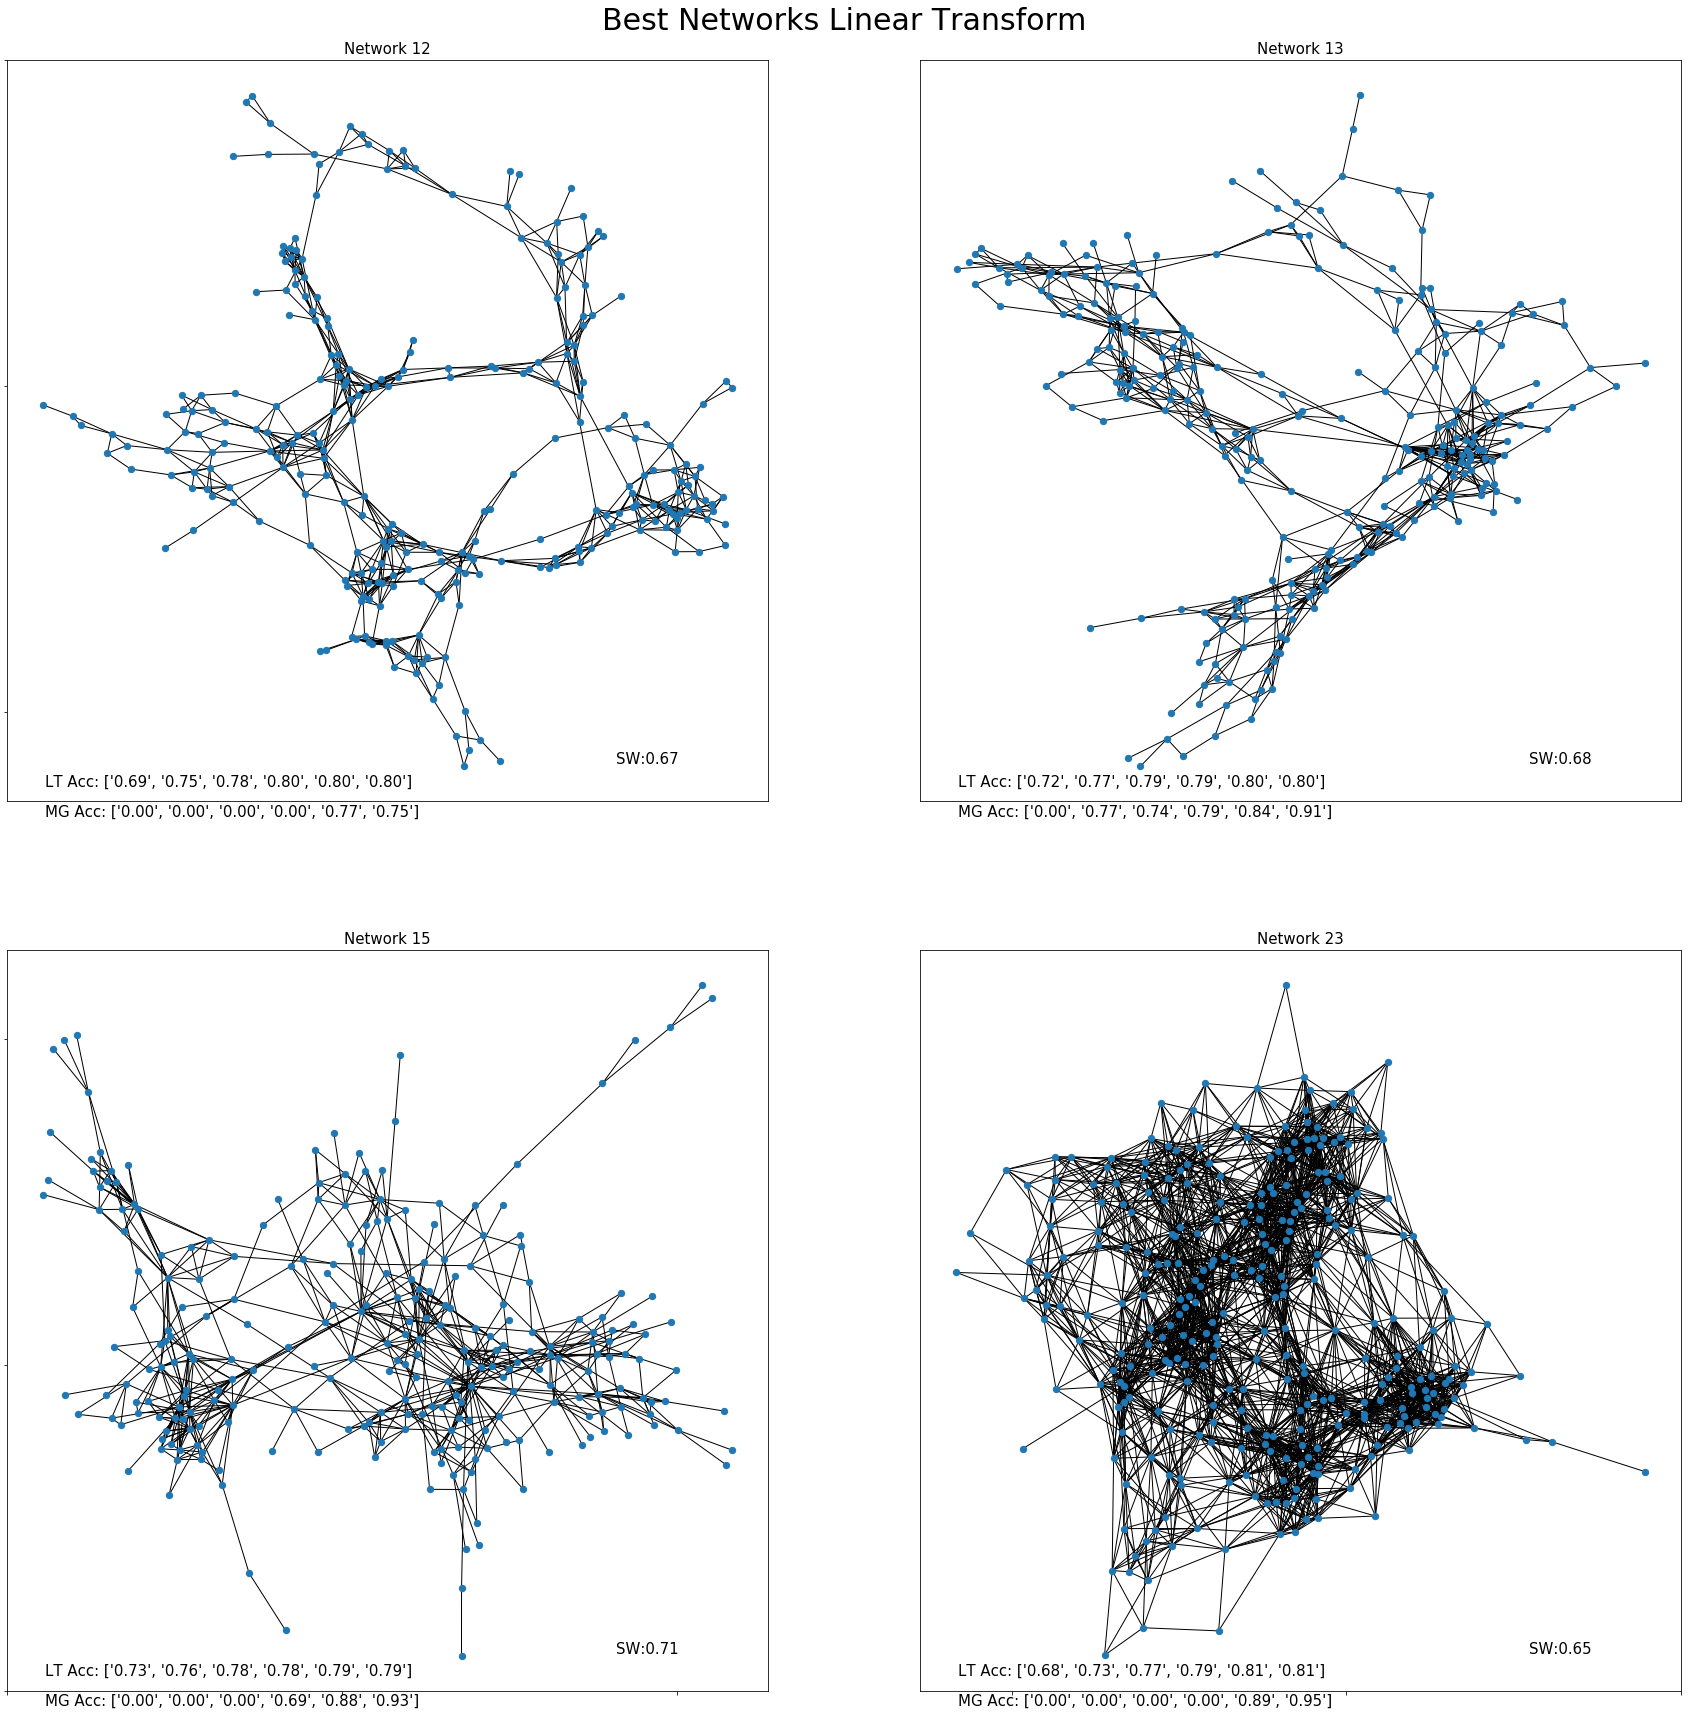

In [260]:
#Plot Best Networks
fig1=plt.figure(figsize=(30,30))

ax=[None]*len(networkListLT)

axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('Best Networks Linear Transform',fontsize=30,pad=30)
# plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# plt.ylabel('MZ',fontsize=30,labelpad=15)
for i in range(len(ax)):
    thisNW=networkListLT[i]
    for j in range(len(ASN300[thisNW]['Accuracy']['Mackey Glass']['Accuracy Value'])):
        if ASN300[thisNW]['Accuracy']['Mackey Glass']['Accuracy Value'][j]<0:
            ASN300[thisNW]['Accuracy']['Mackey Glass']['Accuracy Value'][j]=0
    accuraciesMG=["%.2f"%item for item in ASN300[thisNW]['Accuracy']['Mackey Glass']['Accuracy Value']]
    accuraciesLT=["%.2f"%item for item in ASN300[thisNW]['Accuracy']['Linear Transformation']]
    ax[i]=fig1.add_subplot(2, 2, i+1) #change rows and columns to be factors of ASN300 length
    nx.draw_networkx(ASN300[thisNW]['G'],node_size=40,with_labels=False)
    ax[i].set_title('Network ' + str(thisNW+1),fontsize=15)
    plt.text(0.8,0.05,'SW:'+"{0:.2f}".format(smallworld[thisNW]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot
    plt.text(0.05,0.02,'LT Acc: '+ str(accuraciesLT),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot
    plt.text(0.05,-0.02,'MG Acc: '+ str(accuraciesMG),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot

plt.savefig(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Data\Figures\Functional Connectivity\'Best ASN Networks LT.jpg')
    
    #     ax[i].set_ylim(-1.5,1.5)
#     ax[i].set_xlim(-1.5,1.5)

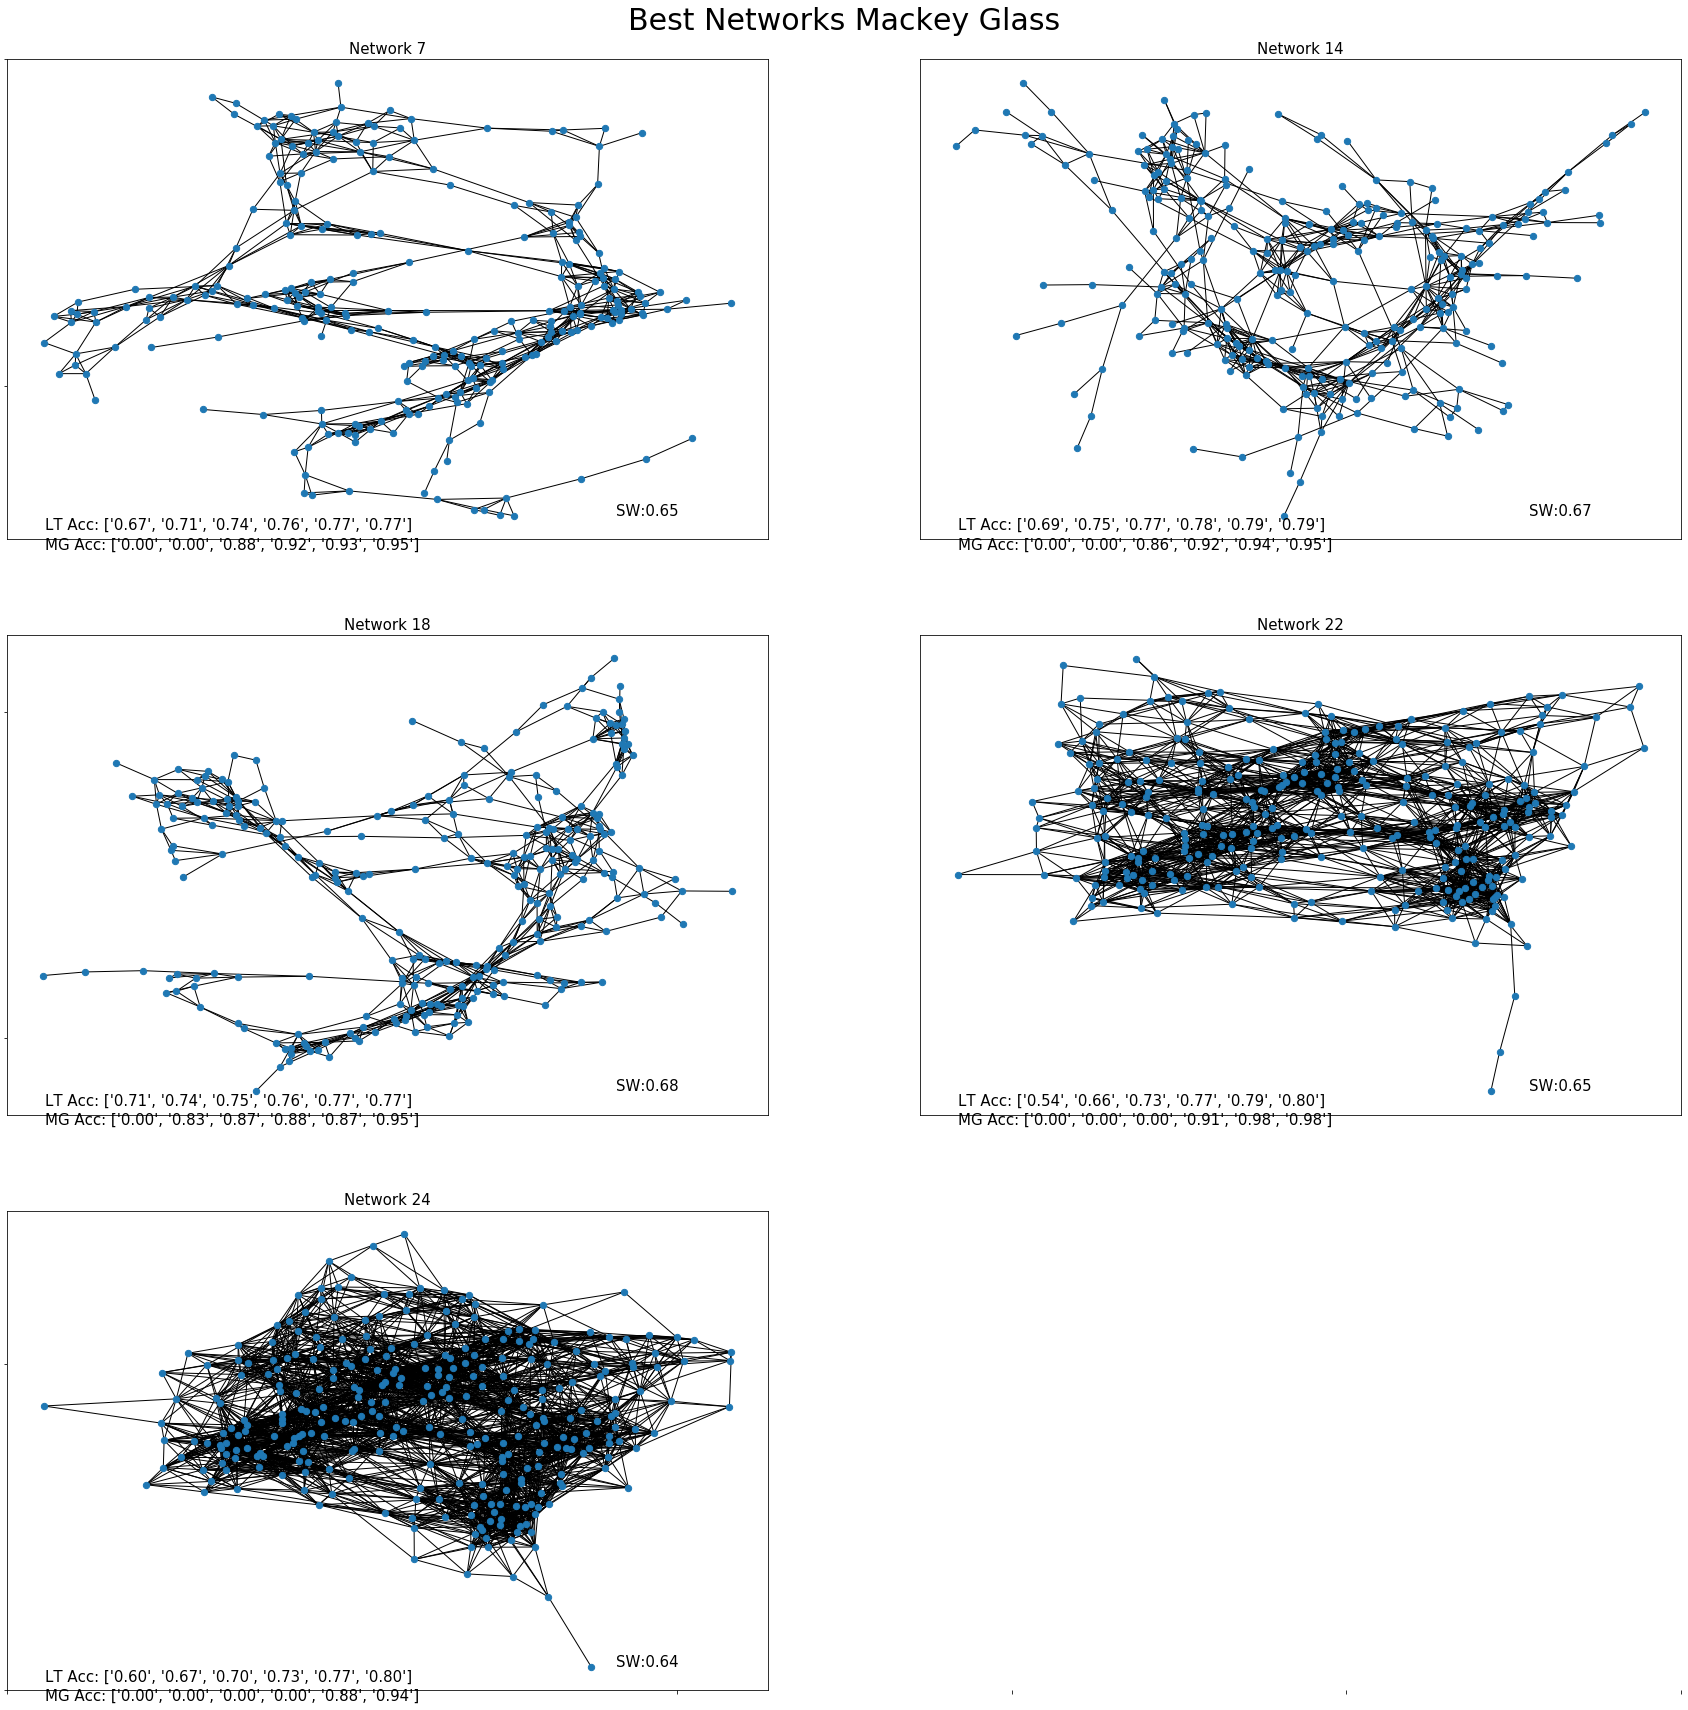

In [259]:
#Plot Best Networks
fig1=plt.figure(figsize=(30,30))

ax=[None]*len(networkListMG)

axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('Best Networks Mackey Glass',fontsize=30,pad=30)
# plt.xlabel('PCoeff',fontsize=30,labelpad=15)
# plt.ylabel('MZ',fontsize=30,labelpad=15)
for i in range(len(ax)):
    thisNW2=networkListMG[i]
    for j in range(len(ASN300[thisNW]['Accuracy']['Mackey Glass']['Accuracy Value'])):
        if ASN300[thisNW2]['Accuracy']['Mackey Glass']['Accuracy Value'][j]<0:
            ASN300[thisNW2]['Accuracy']['Mackey Glass']['Accuracy Value'][j]=0
    accuraciesMG=["%.2f"%item for item in ASN300[thisNW2]['Accuracy']['Mackey Glass']['Accuracy Value']]
    accuraciesLT=["%.2f"%item for item in ASN300[thisNW2]['Accuracy']['Linear Transformation']]    
    ax[i]=fig1.add_subplot(3, 2, i+1) #change rows and columns to be factors of ASN300 length
    nx.draw_networkx(ASN300[thisNW2]['G'],node_size=40,with_labels=False)
    ax[i].set_title('Network ' + str(thisNW2+1),fontsize=15)
    plt.text(0.8,0.05,'SW:'+"{0:.2f}".format(smallworld[thisNW2]),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot
    plt.text(0.05,-0.02,'MG Acc: '+ str(accuraciesMG),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot
    plt.text(0.05,0.02,'LT Acc: '+ str(accuraciesLT),transform=ax[i].transAxes,fontsize=15) #this plots Smallworldness as text in a relative position on each subplot

    #     ax[i].set_ylim(-1.5,1.5)
#     ax[i].set_xlim(-1.5,1.5)

plt.savefig(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Data\Figures\Functional Connectivity\'Best ASN Networks MG.jpg')


# Comparing Networks

## Graph Theory Measures

### Degree

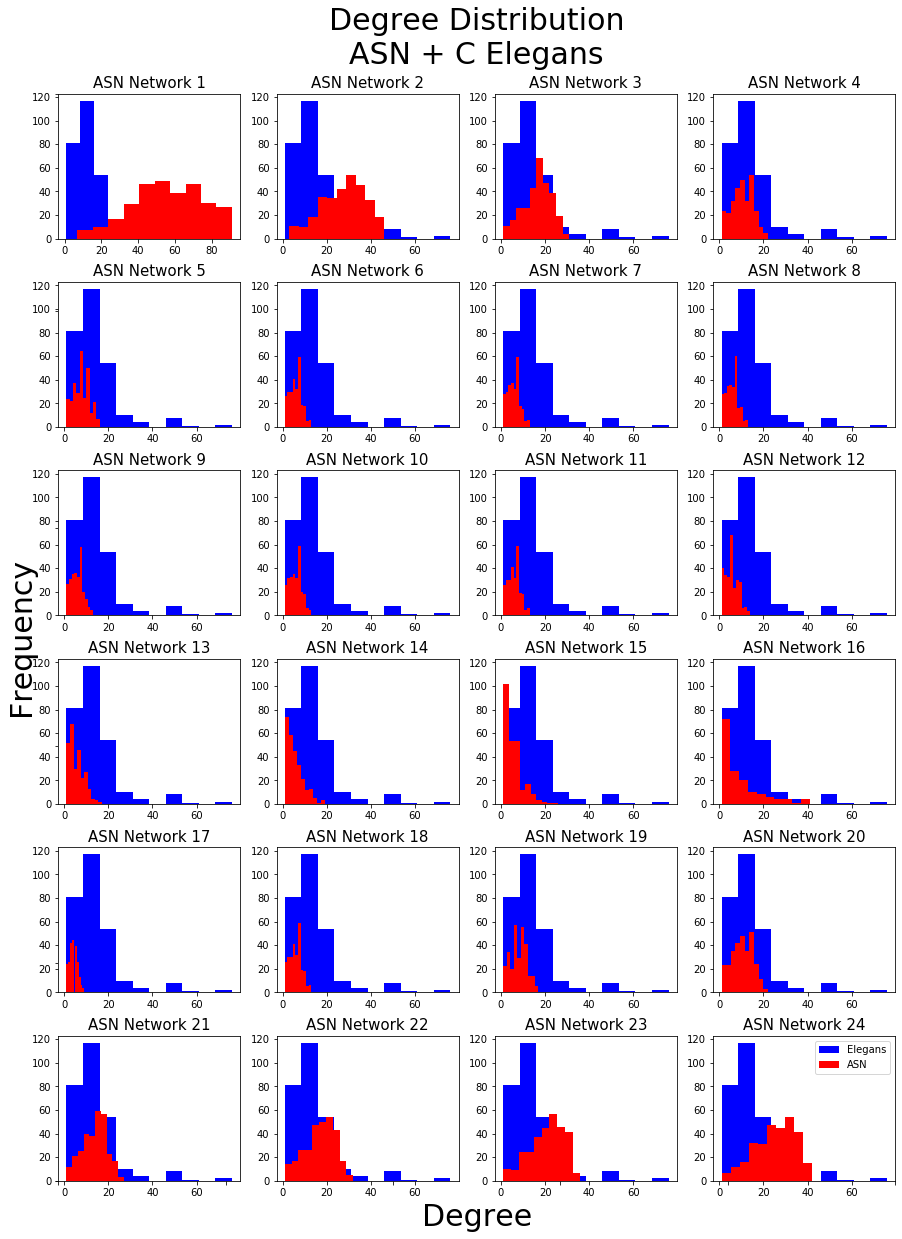

In [248]:
fig1=plt.figure(figsize=(15,20))

ax=[None]*(len(ASN300))
axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('Degree Distribution\nASN + C Elegans',fontsize=30,pad=30)
plt.ylabel('Frequency',fontsize=30,labelpad=15)
plt.xlabel('Degree',fontsize=30,labelpad=15)

# plt.ylabel('MZ',fontsize=30,labelpad=15)
for i in range(len(ax)):
    ax[i]=fig1.add_subplot((numNetworks)/4, (numNetworks)/6, i+1)
#     if i == len(ax)-1:

#     else:
    dictionary2=dict(Elegans['Graph Theory']['Degree'])
    plt.hist(dictionary2.values(), color='b',label='Elegans')
    dictionary=dict(ASN300[i]['Graph Theory']['Degree'])
    fig1.subplots_adjust(hspace=.3)
    ax[i].set_title('ASN Network ' + str(i+1),fontsize=15)
    plt.hist(dictionary.values(), color='r',label='ASN')
plt.legend()


plt.savefig(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Data\Figures\Functional Connectivity\'Degree ASN vs C Elegans.jpg')


### COMMUNICABILITY

In [203]:
# fig1=plt.figure(figsize=(15,20))

# ax=[None]*len(WS_Grid)
# axBig = fig1.add_subplot(111)
# axBig.set_yticklabels([])
# axBig.set_xticklabels([])
# axBig.set_frame_on(False)
# plt.title('Grid Networks Communicability',fontsize=30,pad=30)
# plt.xlabel('COMM',fontsize=30,labelpad=15)
# # plt.ylabel('MZ',fontsize=30,labelpad=15)
# for i in range(len(ax)):
#     randSizeGrid = commuMatGrid[i][currMatGrid[i]!=0].size 
#     xrandGrid = np.random.normal(1, 0.05, randSizeGrid)
#     ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
#     fig1.subplots_adjust(hspace=.3)
#     ax[i].set_title('Network ' + str(i+1),fontsize=15)
#     plt.scatter(xrandGrid, commuMatGrid[i][currMatGrid[i]!=0], color = '#FF1212',s=1)    
#     plt.yscale("log")

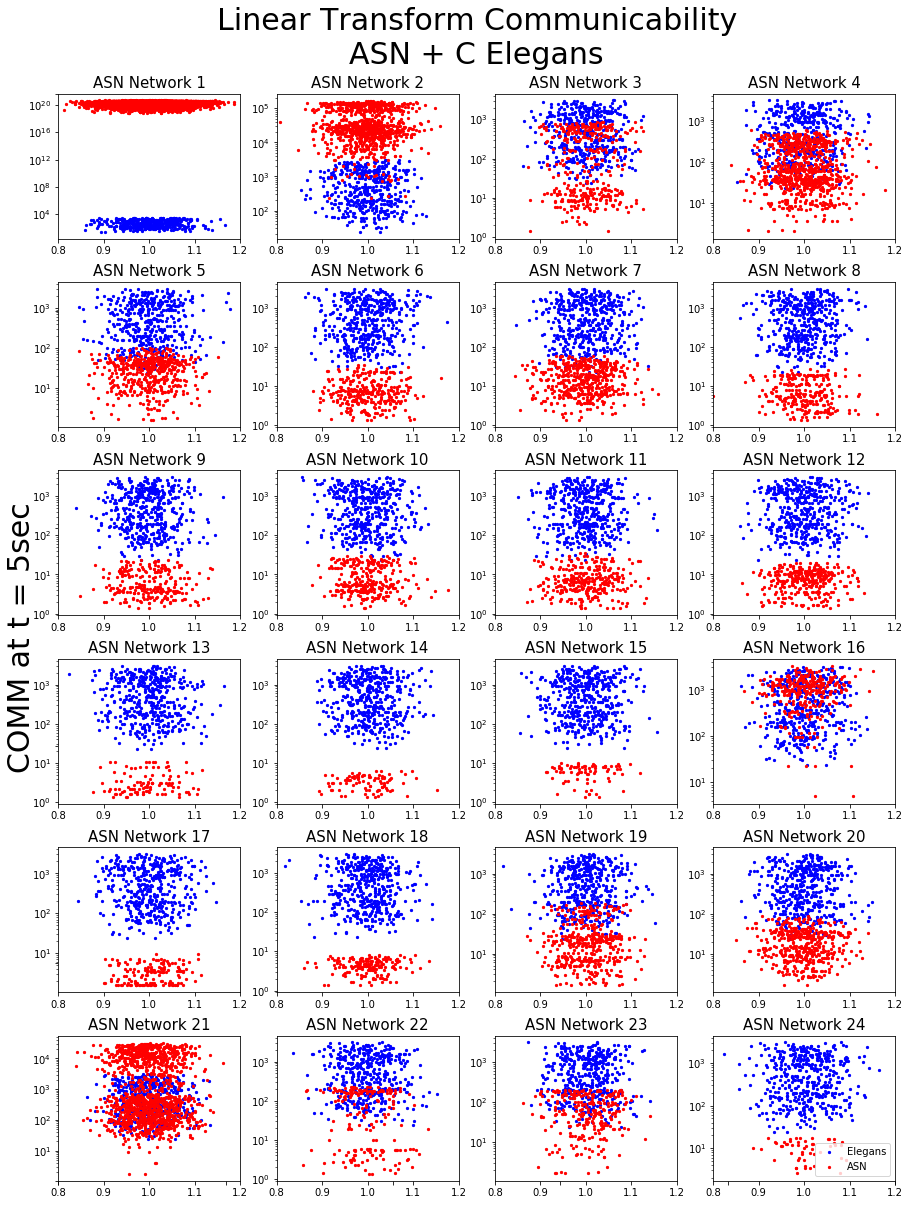

In [329]:
fig1=plt.figure(figsize=(15,20))

ax=[None]*(len(ASN300))
axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('Linear Transform Communicability\nASN + C Elegans',fontsize=30,pad=30)
plt.ylabel('COMM at t = 5sec',fontsize=30,labelpad=15)
# plt.ylabel('MZ',fontsize=30,labelpad=15)
for i in range(len(ax)):
    ax[i]=fig1.add_subplot((numNetworks)/4, (numNetworks)/6, i+1)
    fig1.subplots_adjust(hspace=.3)
#     if i == len(ax)-1:
        
   
#     else:
    #Elegans
    randSizeElegans = commuMatElegans_LT[-1][currMatElegans_LT[-1]!=0].size 
    xrandElegans = np.random.normal(1, 0.05, randSizeElegans)
    plt.scatter(xrandElegans, commuMatElegans_LT[-1][currMatElegans_LT[-1]!=0], color = 'b',s=5,label='Elegans')    
    ax[i].set_title('C Elegans ',fontsize=15)
    ElegansText=[None]*len(Elegans['Accuracy']['Mackey Glass']['Accuracy Value'])
    for j in range(len(Elegans['Accuracy']['Mackey Glass']['Accuracy Value'])):
        if Elegans['Accuracy']['Mackey Glass']['Accuracy Value'][j]<0:
            Elegans['Accuracy']['Mackey Glass']['Accuracy Value'][j]=0
        else:
            if j == 0:
                ElegansText[j]='Elegans MG: ' +"{0:.2f}".format(Elegans['Accuracy']['Mackey Glass']['Accuracy Value'][j])
            else:
                ElegansText[j]="{0:.2f}".format(Elegans['Accuracy']['Mackey Glass']['Accuracy Value'][j])
#     plt.text(0.81,30e6, ElegansText,fontsize=8)
    plt.yscale("log")
    plt.xlim(0.8,1.2)
#     plt.ylim(0,10e8)    
    
    #ASN
    ax[i].set_title('ASN Network ' + str(i+1),fontsize=15)
    randSizeASN = commuMatASN_LT[i][-1][currMatASN_LT[i][-1]!=0].size 
    xrandASN = np.random.normal(1, 0.05, randSizeASN)
    plt.scatter(xrandASN, commuMatASN_LT[i][-1][currMatASN_LT[i][-1]!=0], color = 'r',s=5,label='ASN')    
    plt.yscale("log")
    plt.xlim(0.8,1.2)
#     plt.ylim(0,10e8)     
#     plt.yticks(np.arange(0,10e10,step=10e2))
    ASNText=[None]*len(ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'])
    for j in range(len(ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'])):
        if ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j]<0:
            ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j]=0
        else:
            if j == 0:
                ASNText[j]='ASN MG: ' +"{0:.2f}".format(ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j])
            else:
                ASNText[j]="{0:.2f}".format(ASN300[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j])
    if i == len(ax)-1:            
        plt.legend()
#     plt.text(0.81,10e7, ASNText,fontsize=8)

#     plt.text(0.7,-3.7,'SW:'+"{0:.2f}".format(smallworld[i]))
#     ax[i].set_ylim(-4,4)
#     ax[i].set_xlim(0,1)


# for j in range(len(WS_Random)):
#     randSizeRandom = commuMatRandom[j][currMatRandom[j]!=0].size    
#     xrandRandom = np.random.normal(2, 0.05, randSizeRandom)
#     plt.scatter(xrandRandom, commuMatRandom[j][currMatRandom[j]!=0], color = '#FF1212',s=1)

# for j in range(len(ASN300)):
#     randSizeASN = commuMatASN[j][currMatASN[j]!=0].size    
#     xrandASN = np.random.normal(3, 0.05, randSizeASN)
#     plt.scatter(xrandASN, commuMatASN[j][currMatASN[j]!=0], color = '#FF5233',s=1)


# for i in range(len(Elegans)):
#     randSizeElegans = commuMatElegans[i][currMatElegans[i]!=0].size    
#     xrandElegans = np.random.normal(4, 0.05, randSizeElegans)
#     plt.scatter(xrandElegans, commuMatElegans[i][currMatElegans[i]!=0], color = '#FFBE33',s=10)

# plt.yscale("log")
# plt.ylim(1)
# plt.xticks([1,2,3,4],[r"Grid Networks","Random Networks","ASN Networks", r"$\it{C. Elegans}$"],rotation='45')
# plt.ylabel("log(Communicability)")

plt.savefig(r'C:\Users\aloe8475\Documents\PhD\GitHub\CODE\Data\Figures\Functional Connectivity\'COMM ASN vs C Elegans.jpg')

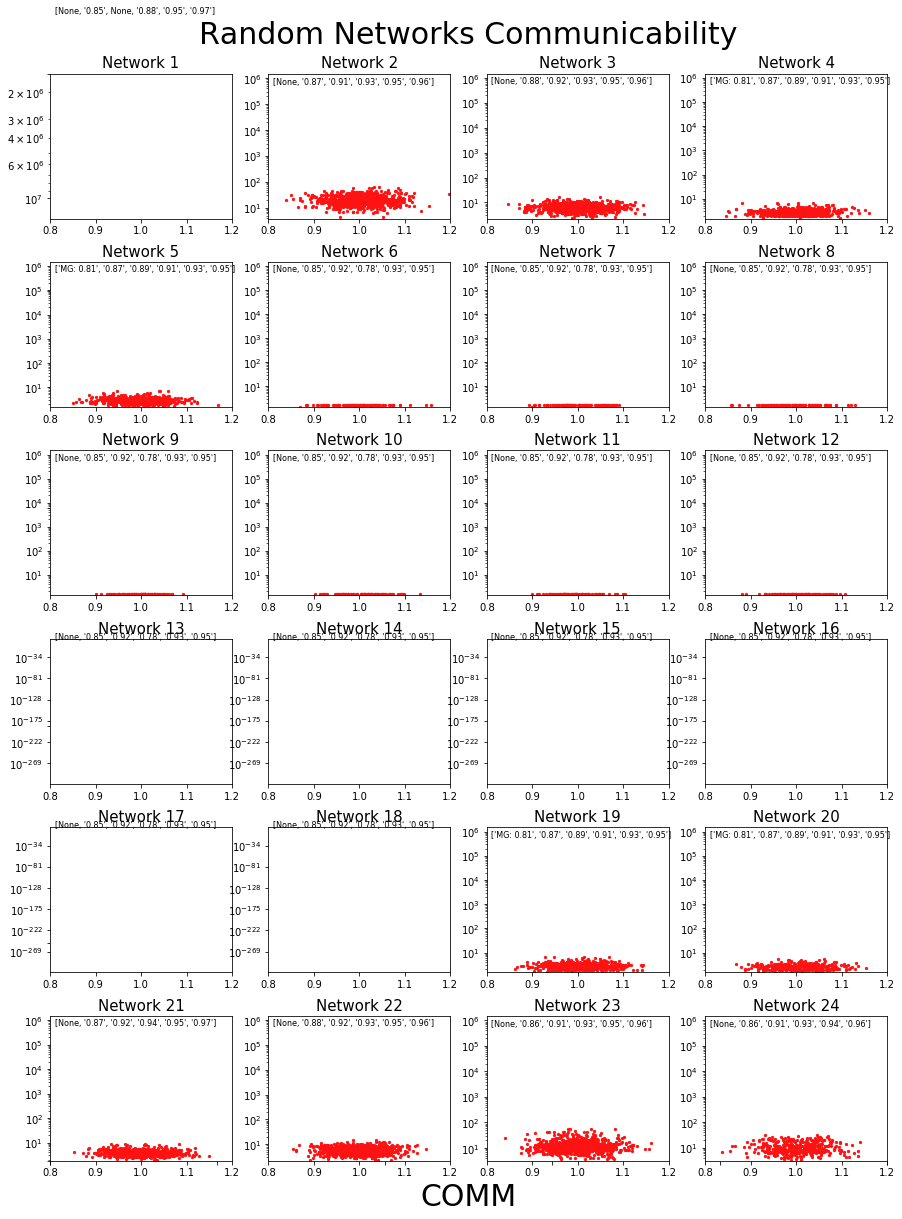

In [135]:
fig1=plt.figure(figsize=(15,20))

ax=[None]*len(WS_Grid)
axBig = fig1.add_subplot(111)
axBig.set_yticklabels([])
axBig.set_xticklabels([])
axBig.set_frame_on(False)
plt.title('Random Networks Communicability',fontsize=30,pad=30)
plt.xlabel('COMM',fontsize=30,labelpad=15)
# plt.ylabel('MZ',fontsize=30,labelpad=15)
for i in range(len(ax)):
    randSizeRandom = commuMatRandom[i][currMatRandom[i]!=0].size 
    xrandRandom = np.random.normal(1, 0.05, randSizeRandom)
    ax[i]=fig1.add_subplot(numNetworks/4, numNetworks/6, i+1)
    fig1.subplots_adjust(hspace=.3)
    ax[i].set_title('Network ' + str(i+1),fontsize=15)
    plt.scatter(xrandRandom, commuMatRandom[i][currMatRandom[i]!=0], color = '#FF1212',s=5)    
    plt.yscale("log")
    plt.ylim(0, 10e5+500000)
    plt.xlim(0.8,1.2)
    randText=[None]*len(WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'])
    for j in range(len(WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'])):
        if WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j]<0:
            WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j]=0
        else:
            if j == 0:
                randText[j]='MG: ' +"{0:.2f}".format(WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j])
            else:
                randText[j]="{0:.2f}".format(WS_Random[i]['Accuracy']['Mackey Glass']['Accuracy Value'][j])
    plt.text(0.81,10e5-400000, randText,fontsize=8)

(1, 10000)

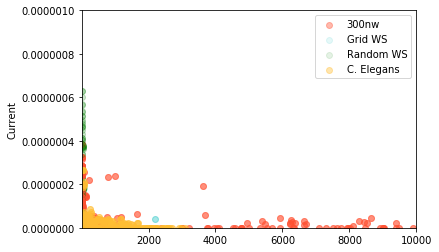

In [140]:
plt.figure()
a=[];b=[];c=[];d=[]
# for i in range(len(commuMat4)):
#         plt.scatter(commuMat4[i][currMat4[i]!=0], abs(currMat4[i][currMat4[i]!=0]), color='#FFBE33',alpha=0.4)
for i in #range(len(commuMatASN)):
    a=plt.scatter(commuMatASN[i][currMatASN[i]!=0], abs(currMatASN[i][currMatASN[i]!=0]), c='#FF5233',alpha=0.4)
    # for i in range(len(commuMat2)):
    #     plt.scatter(commuMat2[i][currMat2[i]!=0], abs(currMat2[i][currMat2[i]!=0]), c='#FF1212',alpha=0.4)

    # for i in range(len(commuMat)):
    #     if i <10:
    b=plt.scatter(commuMatGrid[i][currMatGrid[i]!=0], abs(currMatGrid[i][currMatGrid[i]!=0]), color = 'c',alpha=0.1) #Grid
    #     elif i <20:
    #         plt.scatter(commuMat[i][currMat[i]!=0], abs(currMat[i][currMat[i]!=0]), color = 'm',alpha=0.9)
    #     else:
    c=plt.scatter(commuMatRandom[i][currMatRandom[i]!=0], abs(currMatRandom[i][currMatRandom[i]!=0]), color = 'g',alpha=0.1) #Random

d=plt.scatter(commuMatElegans[currMatElegans!=0], abs(currMatElegans[currMatElegans!=0]), c='#FFBE33',alpha=0.4)
plt.ylabel('Current')
# plt.xlabel('Communicability')
plt.legend((a,b,c,d),('300nw','Grid WS','Random WS','C. Elegans'))
# plt.xscale("log")
plt.ylim(0,0.000001)
plt.xlim(1,10000)